In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners = [
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,21],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,21],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,21],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    #herding_behavior_mean = 0.7,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
#    spreading_rate = normal_ci(0.5, 1.5, 20)
    restaurant_count_per_work_district = 40 #100
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)

Save these seeds if you want to rerun a scenario
[4869, 8648, 4087, 8191, 3125, 7958, 9169, 5038, 9253, 5076, 9262, 6924, 4865, 2995, 5475, 6602, 5828, 2408, 8253, 456]
log initialized
Average similarity between family members is 0.9705375179958408 at temperature -1
Average similarity between family and home is 0.9998537940477161 at temperature -1
Average similarity between students and their classroom is 0.7481536682927423 at temperature -1
Average classroom occupancy is 4.3125 and number classrooms is 64
Average similarity between workers is 0.9701621145334466 at temperature -1
Average office occupancy is 3.5291005291005293 and number offices is 189
Average friend similarity for adults: 0.8552276982174474 for kids: 0.7194764740557058
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 6 allocated units with a total of 9 people.
Total of 9 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
Homog

avg restaurant similarity 0.670248605242639
avg restaurant similarity 0.6448853352173071
avg restaurant similarity 0.6752807672727705
avg restaurant similarity 0.5985150210314536
avg restaurant similarity 0.6636775279268482
avg restaurant similarity 0.6286207016689034
avg restaurant similarity 0.6636634060281995
avg restaurant similarity 0.6358388919192607
avg restaurant similarity 0.6639835997440751
avg restaurant similarity 0.6796548487577739
avg restaurant similarity 0.6639171304591941
avg restaurant similarity 0.6881336724946371
avg restaurant similarity 0.6670945021185143
avg restaurant similarity 0.7154803165441513
avg restaurant similarity 0.6677667344615492
avg restaurant similarity 0.6532353833791753
avg restaurant similarity 0.658291619027081
avg restaurant similarity 0.6531644010243478
avg restaurant similarity 0.6070044682513558
avg restaurant similarity 0.6345830018367989
avg restaurant similarity 0.6496432728374514
avg restaurant similarity 0.6216524852618468
avg restaura

avg restaurant similarity 0.6975083373235529
avg restaurant similarity 0.7055604324007593
avg restaurant similarity 0.6480496697520509
avg restaurant similarity 0.6547383159721933
avg restaurant similarity 0.60002663249188
avg restaurant similarity 0.700794266816502
avg restaurant similarity 0.7018837769911053
avg restaurant similarity 0.6546649572926833
avg restaurant similarity 0.6112415655591705
avg restaurant similarity 0.6150747304033581
avg restaurant similarity 0.6120993264097797
avg restaurant similarity 0.6662092294620605
avg restaurant similarity 0.6276273948311542
avg restaurant similarity 0.6379105580670292
avg restaurant similarity 0.7132364543465091
avg restaurant similarity 0.6324413963815677
avg restaurant similarity 0.6789103517549463
avg restaurant similarity 0.5927579446977075
avg restaurant similarity 0.6794849956024109
avg restaurant similarity 0.6658085154141047
avg restaurant similarity 0.6521572388889154
avg restaurant similarity 0.6679074065022382
avg restauran

avg restaurant similarity 0.6264380182464936
avg restaurant similarity 0.6561289678384384
avg restaurant similarity 0.6507811520904675
avg restaurant similarity 0.6901699814276966
avg restaurant similarity 0.6456701108164564
avg restaurant similarity 0.6689242503328303
avg restaurant similarity 0.7011981545039678
avg restaurant similarity 0.6679040877982916
avg restaurant similarity 0.7050879889584296
avg restaurant similarity 0.6599538046435314
avg restaurant similarity 0.6768794314126605
avg restaurant similarity 0.6581544845042337
avg restaurant similarity 0.7034748396173929
avg restaurant similarity 0.674195286799404
avg restaurant similarity 0.6685316095888417
avg restaurant similarity 0.683933327121688
avg restaurant similarity 0.707966103124832
avg restaurant similarity 0.6597318989894071
avg restaurant similarity 0.7137654642835499
avg restaurant similarity 0.6963818319150394
avg restaurant similarity 0.6700452572690764
avg restaurant similarity 0.6621736128758714
avg restauran

avg restaurant similarity 0.6623651080047065
avg restaurant similarity 0.62846654786216
avg restaurant similarity 0.635682316276598
avg restaurant similarity 0.6976091296453709
avg restaurant similarity 0.684107748307037
avg restaurant similarity 0.6619196378209591
avg restaurant similarity 0.6485845604669142
avg restaurant similarity 0.6636078858561244
avg restaurant similarity 0.6780520088272225
avg restaurant similarity 0.6962566512995687
avg restaurant similarity 0.636893758323348
avg restaurant similarity 0.6570770419079324
avg restaurant similarity 0.6635017675174847
avg restaurant similarity 0.6687135524871127
avg restaurant similarity 0.701553734206736
avg restaurant similarity 0.6893211905691574
avg restaurant similarity 0.6416744675530712
avg restaurant similarity 0.6820906982474778
avg restaurant similarity 0.7119649261969273
avg restaurant similarity 0.6753297693904378
avg restaurant similarity 0.6823262121348689
avg restaurant similarity 0.6779676007984845
avg restaurant s

avg restaurant similarity 0.6615251601556741
avg restaurant similarity 0.6646412082031358
avg restaurant similarity 0.6604564685313319
avg restaurant similarity 0.6627645515807332
avg restaurant similarity 0.6768000348458169
avg restaurant similarity 0.6721490897130957
avg restaurant similarity 0.6731944704940784
avg restaurant similarity 0.6515939157565928
avg restaurant similarity 0.6793580478452262
avg restaurant similarity 0.6610315069483945
avg restaurant similarity 0.6603956011157881
avg restaurant similarity 0.6437309870005833
avg restaurant similarity 0.6533862959675464
avg restaurant similarity 0.6794129778280554
avg restaurant similarity 0.6793106043382986
avg restaurant similarity 0.6630221370244891
avg restaurant similarity 0.6720468760427929
avg restaurant similarity 0.6817993213418461
avg restaurant similarity 0.6980217409181765
avg restaurant similarity 0.6961581752287704
avg restaurant similarity 0.6703091808803433
avg restaurant similarity 0.6464976908405913
avg restau

avg restaurant similarity 0.6578352973716273
avg restaurant similarity 0.6414202417496576
avg restaurant similarity 0.6460133651029522
avg restaurant similarity 0.6217577106893563
avg restaurant similarity 0.6518831532917864
avg restaurant similarity 0.6833143943266341
avg restaurant similarity 0.6645381632427123
avg restaurant similarity 0.6693655731788966
avg restaurant similarity 0.6578325683296538
avg restaurant similarity 0.7046568371984352
avg restaurant similarity 0.6536648465667287
avg restaurant similarity 0.648742605349885
avg restaurant similarity 0.6856528840516707
avg restaurant similarity 0.6651871037870897
avg restaurant similarity 0.6391222705603941
avg restaurant similarity 0.6706878785720055
avg restaurant similarity 0.6701882703578933
avg restaurant similarity 0.6549069127234551
avg restaurant similarity 0.670002423377569
avg restaurant similarity 0.6581825419934961
avg restaurant similarity 0.6933961251187302
avg restaurant similarity 0.707771322280422
avg restauran

avg restaurant similarity 0.6583963145337332
avg restaurant similarity 0.6713892889605972
avg restaurant similarity 0.6331603735272882
avg restaurant similarity 0.6692909359570186
avg restaurant similarity 0.6555981610366455
avg restaurant similarity 0.6640189285084721
avg restaurant similarity 0.6572067623128787
avg restaurant similarity 0.6432166939416747
avg restaurant similarity 0.6522986079469805
avg restaurant similarity 0.631685665931105
avg restaurant similarity 0.6085947480704424
avg restaurant similarity 0.6736776700457308
avg restaurant similarity 0.6295214305255874
avg restaurant similarity 0.626940736840428
avg restaurant similarity 0.6316823458844595
avg restaurant similarity 0.6768793382107972
avg restaurant similarity 0.6082807385869707
avg restaurant similarity 0.6145296595669537
avg restaurant similarity 0.6524932604237816
avg restaurant similarity 0.6400136825205283
avg restaurant similarity 0.6185355507010774
avg restaurant similarity 0.6453097492948455
avg restaura

avg restaurant similarity 0.6215182855505731
avg restaurant similarity 0.672599845828024
avg restaurant similarity 0.6777188146491597
avg restaurant similarity 0.657561847557018
avg restaurant similarity 0.670105026747492
avg restaurant similarity 0.6249223168467382
avg restaurant similarity 0.654372588043005
avg restaurant similarity 0.640036613921254
avg restaurant similarity 0.6425697469765127
avg restaurant similarity 0.6066233041203088
avg restaurant similarity 0.6325099606810621
avg restaurant similarity 0.6857486771946959
avg restaurant similarity 0.6571721020539297
avg restaurant similarity 0.6373030705189556
avg restaurant similarity 0.6623154929356297
avg restaurant similarity 0.6318969401273588
avg restaurant similarity 0.6258299922673305
avg restaurant similarity 0.6771354428902746
avg restaurant similarity 0.628560066923984
avg restaurant similarity 0.6498816177023603
avg restaurant similarity 0.6949295713113246
avg restaurant similarity 0.6399149828541496
avg restaurant s

avg restaurant similarity 0.6730328887560466
avg restaurant similarity 0.7012368142613943
avg restaurant similarity 0.6817900660506027
avg restaurant similarity 0.6582448842752133
avg restaurant similarity 0.6956685193108105
avg restaurant similarity 0.7069864103522486
avg restaurant similarity 0.6733489144054188
avg restaurant similarity 0.7494622466380029
avg restaurant similarity 0.6950942283929472
avg restaurant similarity 0.6622497348060598
avg restaurant similarity 0.6731049458911137
avg restaurant similarity 0.6882491424034619
avg restaurant similarity 0.6502226348422108
avg restaurant similarity 0.6931708528792052
avg restaurant similarity 0.7346705194185205
avg restaurant similarity 0.6907513211482986
avg restaurant similarity 0.6979533372126067
avg restaurant similarity 0.7433558340533527
avg restaurant similarity 0.6981485097239315
avg restaurant similarity 0.6520087758216752
avg restaurant similarity 0.7146807884844405
avg restaurant similarity 0.7197924244168855
avg restau

avg restaurant similarity 0.7180620750663232
avg restaurant similarity 0.6955334811614807
avg restaurant similarity 0.6807741362350493
avg restaurant similarity 0.6521513742089996
avg restaurant similarity 0.6783924977193189
avg restaurant similarity 0.6815258847494124
avg restaurant similarity 0.6704648205541472
avg restaurant similarity 0.6563058082018776
avg restaurant similarity 0.7222504532264289
avg restaurant similarity 0.7051444756277365
avg restaurant similarity 0.6997313502048053
avg restaurant similarity 0.725987245464865
avg restaurant similarity 0.7284076315882793
avg restaurant similarity 0.6714818383868699
avg restaurant similarity 0.7172924861904414
avg restaurant similarity 0.6320458234966732
avg restaurant similarity 0.731338827649012
avg restaurant similarity 0.6814068347243728
avg restaurant similarity 0.7110479425657517
avg restaurant similarity 0.6614894285200894
avg restaurant similarity 0.6563482070543353
avg restaurant similarity 0.6978864982181483
avg restaura

avg restaurant similarity 0.6401837742205968
avg restaurant similarity 0.737702700993662
avg restaurant similarity 0.6874161890172328
avg restaurant similarity 0.700045980837077
avg restaurant similarity 0.7122347004130186
avg restaurant similarity 0.7120071109856161
avg restaurant similarity 0.6893435656044465
avg restaurant similarity 0.6568835639761974
avg restaurant similarity 0.6549228256279318
avg restaurant similarity 0.685390733768982
avg restaurant similarity 0.6240351973422977
avg restaurant similarity 0.6956579339525232
avg restaurant similarity 0.6849764370364969
avg restaurant similarity 0.7056593964149818
avg restaurant similarity 0.6783473634424643
avg restaurant similarity 0.6863645461145729
avg restaurant similarity 0.6947639371711826
avg restaurant similarity 0.6563214779893959
avg restaurant similarity 0.647928672585972
avg restaurant similarity 0.6652421684876654
avg restaurant similarity 0.6878251706550418
avg restaurant similarity 0.6745087834695285
avg restaurant

avg restaurant similarity 0.6776813494365261
avg restaurant similarity 0.6569868551686272
avg restaurant similarity 0.7319983970418154
avg restaurant similarity 0.6957796261278
avg restaurant similarity 0.6974344280809445
avg restaurant similarity 0.6480715093315426
avg restaurant similarity 0.667815072020854
avg restaurant similarity 0.7308640318626309
avg restaurant similarity 0.7096642255946942
avg restaurant similarity 0.6784817917421633
avg restaurant similarity 0.7063466506628282
avg restaurant similarity 0.654683937032019
avg restaurant similarity 0.7039403317452559
avg restaurant similarity 0.7076216450477477
avg restaurant similarity 0.682247950471987
avg restaurant similarity 0.7236692359270746
avg restaurant similarity 0.7141665421192505
avg restaurant similarity 0.6445063553564229
avg restaurant similarity 0.6956185328785242
avg restaurant similarity 0.6825747182554792
avg restaurant similarity 0.6745693631744875
avg restaurant similarity 0.7042386447659132
avg restaurant s

avg restaurant similarity 0.6690290303317554
avg restaurant similarity 0.6528537687279111
avg restaurant similarity 0.6770236731385744
avg restaurant similarity 0.6771498810823484
avg restaurant similarity 0.639221620367413
avg restaurant similarity 0.6204930330108419
avg restaurant similarity 0.6613918101636499
avg restaurant similarity 0.7121651724125609
avg restaurant similarity 0.6560612283730508
avg restaurant similarity 0.6016727140646494
avg restaurant similarity 0.6789553266018918
avg restaurant similarity 0.6848644250209955
avg restaurant similarity 0.7014831742145059
avg restaurant similarity 0.6224338405117572
avg restaurant similarity 0.6508063384855108
avg restaurant similarity 0.6603441218999762
avg restaurant similarity 0.6571923541235271
avg restaurant similarity 0.63346947132003
avg restaurant similarity 0.6206236026989238
avg restaurant similarity 0.6469021386566288
avg restaurant similarity 0.5995840261540112
avg restaurant similarity 0.694527971762177
avg restaurant

avg restaurant similarity 0.6350084122206188
avg restaurant similarity 0.6228718761080532
avg restaurant similarity 0.6356875918850731
avg restaurant similarity 0.6357585223487308
avg restaurant similarity 0.6557049042750996
avg restaurant similarity 0.6565356881317705
avg restaurant similarity 0.6760613726375226
avg restaurant similarity 0.6602130286650298
avg restaurant similarity 0.6730631649662272
avg restaurant similarity 0.6699150105037405
avg restaurant similarity 0.5849445782384471
avg restaurant similarity 0.6413105767921384
avg restaurant similarity 0.6055826552746904
avg restaurant similarity 0.5825760980958659
avg restaurant similarity 0.6293798211758114
avg restaurant similarity 0.6737752979953874
avg restaurant similarity 0.5940383067275042
avg restaurant similarity 0.6388176633547878
avg restaurant similarity 0.6123547979138523
avg restaurant similarity 0.6299886338045557
avg restaurant similarity 0.6282498223408985
avg restaurant similarity 0.6163687570343431
avg restau

avg restaurant similarity 0.6776168729781628
avg restaurant similarity 0.6774033779259045
avg restaurant similarity 0.6488200320840002
avg restaurant similarity 0.6635459245745595
avg restaurant similarity 0.6763962746121349
avg restaurant similarity 0.6471268930573026
avg restaurant similarity 0.6585009031664184
avg restaurant similarity 0.6695564193331679
avg restaurant similarity 0.6829167707111684
avg restaurant similarity 0.6710974691487763
avg restaurant similarity 0.6645346754089941
avg restaurant similarity 0.6570628343825654
avg restaurant similarity 0.6738303964202106
avg restaurant similarity 0.645509466317813
avg restaurant similarity 0.6779155893326779
avg restaurant similarity 0.663166970538449
avg restaurant similarity 0.6676322700373619
avg restaurant similarity 0.712355733116317
avg restaurant similarity 0.7148630717076218
avg restaurant similarity 0.7244258760345034
avg restaurant similarity 0.6708414462639454
avg restaurant similarity 0.6352874795251415
avg restauran

avg restaurant similarity 0.6942669982117367
avg restaurant similarity 0.7246177260517079
avg restaurant similarity 0.691952267016542
avg restaurant similarity 0.7123601958397707
avg restaurant similarity 0.6955477920699847
avg restaurant similarity 0.6671151925417007
avg restaurant similarity 0.6535141635314061
avg restaurant similarity 0.6842307810950192
avg restaurant similarity 0.6457751525520976
avg restaurant similarity 0.6806459394555503
avg restaurant similarity 0.6904666142144951
avg restaurant similarity 0.6618433686933375
avg restaurant similarity 0.7205860886548474
avg restaurant similarity 0.6620433889088312
avg restaurant similarity 0.6288120666907789
avg restaurant similarity 0.6879772165974533
avg restaurant similarity 0.7034625291933159
avg restaurant similarity 0.7288316838019012
avg restaurant similarity 0.6759175767549247
avg restaurant similarity 0.7013717147232178
avg restaurant similarity 0.7086537657153209
avg restaurant similarity 0.7100723069317452
avg restaur

avg restaurant similarity 0.6505300619944149
avg restaurant similarity 0.710962057275832
avg restaurant similarity 0.6725549227592482
avg restaurant similarity 0.6513850206354203
avg restaurant similarity 0.6838896420680176
avg restaurant similarity 0.6077702918002823
avg restaurant similarity 0.6499449428272192
avg restaurant similarity 0.6693862185927553
avg restaurant similarity 0.6616124942950864
avg restaurant similarity 0.6116601845845305
avg restaurant similarity 0.6335877771782826
avg restaurant similarity 0.6641948367463338
avg restaurant similarity 0.643517472687722
avg restaurant similarity 0.6492322899660994
avg restaurant similarity 0.6939234709929897
avg restaurant similarity 0.6845739375283689
avg restaurant similarity 0.6117298133700705
avg restaurant similarity 0.6650295587729966
avg restaurant similarity 0.6732484433303476
avg restaurant similarity 0.6677977881520083
avg restaurant similarity 0.6851782595463223
avg restaurant similarity 0.6390111905117736
avg restaura

avg restaurant similarity 0.645838452601424
avg restaurant similarity 0.644528926850153
avg restaurant similarity 0.6544795310781996
avg restaurant similarity 0.6465853801478167
avg restaurant similarity 0.6690952272525214
avg restaurant similarity 0.6557406699218271
avg restaurant similarity 0.6303358262613417
avg restaurant similarity 0.6690616150442471
avg restaurant similarity 0.6498899218184315
avg restaurant similarity 0.645617351686867
avg restaurant similarity 0.6755476915647356
avg restaurant similarity 0.6526910714052417
avg restaurant similarity 0.6609120860868334
avg restaurant similarity 0.6564952888873601
avg restaurant similarity 0.6669384621830314
avg restaurant similarity 0.6288146867949783
avg restaurant similarity 0.6437683485421493
avg restaurant similarity 0.6954521931031148
avg restaurant similarity 0.6777314703458621
avg restaurant similarity 0.6236341676158899
avg restaurant similarity 0.6923570778408003
avg restaurant similarity 0.599767349903823
avg restaurant

avg restaurant similarity 0.6766909117941947
avg restaurant similarity 0.6885029184423395
avg restaurant similarity 0.6729127082635888
avg restaurant similarity 0.6569227017128657
avg restaurant similarity 0.6477614421244422
avg restaurant similarity 0.6267551707480234
avg restaurant similarity 0.6843745778073679
avg restaurant similarity 0.7346571662052139
avg restaurant similarity 0.7000134351756067
avg restaurant similarity 0.6930687621251058
avg restaurant similarity 0.6568409072190237
avg restaurant similarity 0.7077837686327324
avg restaurant similarity 0.6629002344191446
avg restaurant similarity 0.6659385948186447
avg restaurant similarity 0.6777332006153872
avg restaurant similarity 0.6624124239341882
avg restaurant similarity 0.687957873258076
avg restaurant similarity 0.6595730588202857
avg restaurant similarity 0.6822941252978459
avg restaurant similarity 0.6517488837201624
avg restaurant similarity 0.6732977556817241
avg restaurant similarity 0.6956850915228029
avg restaur

avg restaurant similarity 0.6733297367309314
avg restaurant similarity 0.7276736278675384
avg restaurant similarity 0.6731863959950468
avg restaurant similarity 0.701699532236528
avg restaurant similarity 0.6993448161932571
avg restaurant similarity 0.6810283273409579
avg restaurant similarity 0.6764676903923912
avg restaurant similarity 0.7253131392212566
avg restaurant similarity 0.7215108551732186
avg restaurant similarity 0.6746736231523639
avg restaurant similarity 0.7165134897088641
avg restaurant similarity 0.7023355959191002
avg restaurant similarity 0.6423994556228052
avg restaurant similarity 0.6883042328864297
avg restaurant similarity 0.6666668272284982
avg restaurant similarity 0.6620028186073706
avg restaurant similarity 0.6933695320900932
avg restaurant similarity 0.699290837999776
avg restaurant similarity 0.6667421905495626
avg restaurant similarity 0.7109636536320784
avg restaurant similarity 0.6866538113582252
avg restaurant similarity 0.7165218867611137
avg restaura

avg restaurant similarity 0.7086955426918351
avg restaurant similarity 0.6838909361562046
avg restaurant similarity 0.6703737809328916
avg restaurant similarity 0.7397637969244987
avg restaurant similarity 0.6722406744097222
avg restaurant similarity 0.6869273404228794
avg restaurant similarity 0.6334029667593148
avg restaurant similarity 0.7152838723897392
avg restaurant similarity 0.6613396268196831
avg restaurant similarity 0.7013200489127663
avg restaurant similarity 0.7299470480069622
avg restaurant similarity 0.6993407726763042
avg restaurant similarity 0.7023554462327934
avg restaurant similarity 0.687934574479438
avg restaurant similarity 0.6481958706511219
avg restaurant similarity 0.6969628420197853
avg restaurant similarity 0.7298374549261889
avg restaurant similarity 0.6979767256980478
avg restaurant similarity 0.7702112650165206
avg restaurant similarity 0.7339275129335928
avg restaurant similarity 0.6520085469943058
avg restaurant similarity 0.7095701574681691
avg restaur

avg restaurant similarity 0.7117932441428543
avg restaurant similarity 0.672737383941859
avg restaurant similarity 0.6407634685364505
avg restaurant similarity 0.7173323894298339
avg restaurant similarity 0.7265837074820126
avg restaurant similarity 0.730847926365113
avg restaurant similarity 0.7251773512353761
avg restaurant similarity 0.7281027031949387
avg restaurant similarity 0.699565288665135
avg restaurant similarity 0.6305552503095412
avg restaurant similarity 0.6915165271315281
avg restaurant similarity 0.6867221754430017
avg restaurant similarity 0.7276743157661746
avg restaurant similarity 0.6882307432855629
avg restaurant similarity 0.653495385424614
avg restaurant similarity 0.6985300053877314
avg restaurant similarity 0.6592710568275723
avg restaurant similarity 0.734210677671926
avg restaurant similarity 0.6687112869568476
avg restaurant similarity 0.7396924508310122
avg restaurant similarity 0.6917541216698964
avg restaurant similarity 0.6847812223428302
avg restaurant 

avg restaurant similarity 0.6251079307479703
avg restaurant similarity 0.657061135880323
avg restaurant similarity 0.6943039536396862
avg restaurant similarity 0.679330903028583
avg restaurant similarity 0.6600822081095307
avg restaurant similarity 0.6024792495574474
avg restaurant similarity 0.6227482423087319
avg restaurant similarity 0.6524849073037212
avg restaurant similarity 0.6637138341560391
avg restaurant similarity 0.6006498043007774
avg restaurant similarity 0.6806424156029605
avg restaurant similarity 0.6391293969128111
avg restaurant similarity 0.6471773648942009
avg restaurant similarity 0.665495020355923
avg restaurant similarity 0.6716504126305225
avg restaurant similarity 0.6922668578998474
avg restaurant similarity 0.6985024266964069
avg restaurant similarity 0.7020114752677955
avg restaurant similarity 0.6875210154655519
avg restaurant similarity 0.6715970884677408
avg restaurant similarity 0.6926499755819462
avg restaurant similarity 0.6151852284165447
avg restauran

avg restaurant similarity 0.6433484461372626
avg restaurant similarity 0.6492761128190203
avg restaurant similarity 0.6408914259796107
avg restaurant similarity 0.6839806634408698
avg restaurant similarity 0.7183450378326712
avg restaurant similarity 0.6161736914154647
avg restaurant similarity 0.6684695455600842
avg restaurant similarity 0.6868812371111828
avg restaurant similarity 0.6905714975176667
avg restaurant similarity 0.6510178982229294
avg restaurant similarity 0.6907929478390485
avg restaurant similarity 0.67012120481849
avg restaurant similarity 0.5557052107618841
avg restaurant similarity 0.6809457043155588
avg restaurant similarity 0.6305067732359269
avg restaurant similarity 0.6658844638476218
avg restaurant similarity 0.6428663953062597
avg restaurant similarity 0.6320632855170778
avg restaurant similarity 0.6336402463542191
avg restaurant similarity 0.6821149389953608
avg restaurant similarity 0.7050756910982001
avg restaurant similarity 0.5967877894448708
avg restaura

avg restaurant similarity 0.7028919354622659
avg restaurant similarity 0.7017315767036797
avg restaurant similarity 0.6356922965181662
avg restaurant similarity 0.6444800664031759
avg restaurant similarity 0.6586901002063124
avg restaurant similarity 0.6519668636896324
avg restaurant similarity 0.6556164543755962
avg restaurant similarity 0.6397564862002567
avg restaurant similarity 0.6666842176076722
avg restaurant similarity 0.685315668990709
avg restaurant similarity 0.621409926583628
avg restaurant similarity 0.6412464236154252
avg restaurant similarity 0.6118263145126493
avg restaurant similarity 0.69309057024444
avg restaurant similarity 0.6743217465941665
avg restaurant similarity 0.6730796699880799
avg restaurant similarity 0.6291501055411893
avg restaurant similarity 0.694778377697338
avg restaurant similarity 0.653934024374977
avg restaurant similarity 0.6554778511164907
avg restaurant similarity 0.6881451403268628
avg restaurant similarity 0.6615450164108185
avg restaurant s

avg restaurant similarity 0.7065759590254463
avg restaurant similarity 0.6711460518749308
avg restaurant similarity 0.6735881278000596
avg restaurant similarity 0.6928832780694262
avg restaurant similarity 0.6354697515319967
avg restaurant similarity 0.7210382996066854
avg restaurant similarity 0.7202445443344886
avg restaurant similarity 0.6887754307697281
avg restaurant similarity 0.6859097528556973
avg restaurant similarity 0.6496033778499706
avg restaurant similarity 0.6771403801408814
avg restaurant similarity 0.6792024549768783
avg restaurant similarity 0.7105010038623433
avg restaurant similarity 0.7237068361367036
avg restaurant similarity 0.689527826723665
avg restaurant similarity 0.6764971851854753
avg restaurant similarity 0.6768154992081461
avg restaurant similarity 0.6859616059906354
avg restaurant similarity 0.6867030578090577
avg restaurant similarity 0.691765773150117
avg restaurant similarity 0.7001476237329536
avg restaurant similarity 0.6419945247431688
avg restaura

avg restaurant similarity 0.6528176708462401
avg restaurant similarity 0.678583723413732
avg restaurant similarity 0.6617169801667481
avg restaurant similarity 0.69922269347254
avg restaurant similarity 0.6983321681402463
avg restaurant similarity 0.6280778169855635
avg restaurant similarity 0.6467458085710905
avg restaurant similarity 0.6656690953936057
avg restaurant similarity 0.6585936899422105
avg restaurant similarity 0.6441051672988832
avg restaurant similarity 0.6938540822463535
avg restaurant similarity 0.7375393637566589
avg restaurant similarity 0.6270387007465141
avg restaurant similarity 0.6514358493303162
avg restaurant similarity 0.6690114352867523
avg restaurant similarity 0.6914429989473371
avg restaurant similarity 0.6743618202733188
avg restaurant similarity 0.6158260768509628
avg restaurant similarity 0.7196998380028454
avg restaurant similarity 0.6973421308781914
avg restaurant similarity 0.6594702396238306
avg restaurant similarity 0.6709799104489027
avg restauran

avg restaurant similarity 0.6701697490890919
avg restaurant similarity 0.6847044128658987
avg restaurant similarity 0.649170221328204
avg restaurant similarity 0.6814012249713609
avg restaurant similarity 0.6533088367284541
avg restaurant similarity 0.6946108573934403
avg restaurant similarity 0.6467995800847868
avg restaurant similarity 0.6822343703518825
avg restaurant similarity 0.6806335861864535
avg restaurant similarity 0.7043594401010077
avg restaurant similarity 0.6388476091084713
avg restaurant similarity 0.6783099088197326
avg restaurant similarity 0.6863147068113272
avg restaurant similarity 0.6596355868373146
avg restaurant similarity 0.6535938365705299
avg restaurant similarity 0.6578527244991774
avg restaurant similarity 0.7198640258171299
avg restaurant similarity 0.6716263301656112
avg restaurant similarity 0.6852179578817269
avg restaurant similarity 0.6871442980725058
avg restaurant similarity 0.6707898048191583
avg restaurant similarity 0.6592182848551926
avg restaur

avg restaurant similarity 0.6638809994470802
avg restaurant similarity 0.6633056688156761
avg restaurant similarity 0.6863112404988783
avg restaurant similarity 0.6430016436415871
avg restaurant similarity 0.6493587322369948
avg restaurant similarity 0.6630755693198075
avg restaurant similarity 0.687430069692283
avg restaurant similarity 0.659724035714576
avg restaurant similarity 0.6362583327949672
avg restaurant similarity 0.6351119489900083
avg restaurant similarity 0.6307208859019353
avg restaurant similarity 0.610373419102892
avg restaurant similarity 0.5914017935848938
avg restaurant similarity 0.6552542248296727
avg restaurant similarity 0.611984396360185
avg restaurant similarity 0.6768450723401158
avg restaurant similarity 0.6709817090110439
avg restaurant similarity 0.6737613914722088
avg restaurant similarity 0.6926295226276875
avg restaurant similarity 0.5814987647869582
avg restaurant similarity 0.6183022223637282
avg restaurant similarity 0.630492137102564
avg restaurant 

avg restaurant similarity 0.6455602326492821
avg restaurant similarity 0.6096199202486987
avg restaurant similarity 0.713621779331007
avg restaurant similarity 0.6669786398739568
avg restaurant similarity 0.6509497193297972
avg restaurant similarity 0.6650667216661249
avg restaurant similarity 0.6472186149166005
avg restaurant similarity 0.6813772860609858
avg restaurant similarity 0.6891580970122805
avg restaurant similarity 0.6501212950299259
avg restaurant similarity 0.6199278100785455
avg restaurant similarity 0.6110128066856949
avg restaurant similarity 0.6525943188851021
avg restaurant similarity 0.6586059018315626
avg restaurant similarity 0.651307072206359
avg restaurant similarity 0.6291649408186456
avg restaurant similarity 0.6025798237203333
avg restaurant similarity 0.6760625159347532
avg restaurant similarity 0.6619938078330928
avg restaurant similarity 0.6637289409186169
avg restaurant similarity 0.7184144836609857
avg restaurant similarity 0.6085083791360303
avg restaura

avg restaurant similarity 0.677233983769485
avg restaurant similarity 0.7170988355389627
avg restaurant similarity 0.698760083976428
avg restaurant similarity 0.7059800531236622
avg restaurant similarity 0.7379542465002737
avg restaurant similarity 0.6573567923264292
avg restaurant similarity 0.677130719349717
avg restaurant similarity 0.6971148335365499
avg restaurant similarity 0.7109333215082726
avg restaurant similarity 0.6668322796482277
avg restaurant similarity 0.6569055382194007
avg restaurant similarity 0.7071290738007878
avg restaurant similarity 0.6690166150898246
avg restaurant similarity 0.6746039614117172
avg restaurant similarity 0.6873032379128636
avg restaurant similarity 0.7122135855330807
avg restaurant similarity 0.6777570078798618
avg restaurant similarity 0.6274711799364954
avg restaurant similarity 0.6292823352260489
avg restaurant similarity 0.7071741705145652
avg restaurant similarity 0.6679490093586933
avg restaurant similarity 0.6678702426075892
avg restauran

avg restaurant similarity 0.6913098620782141
avg restaurant similarity 0.6869877931914082
avg restaurant similarity 0.6747490876768016
avg restaurant similarity 0.718345468197692
avg restaurant similarity 0.6408713855364844
avg restaurant similarity 0.689916564296902
avg restaurant similarity 0.6574141941667951
avg restaurant similarity 0.7170625098803539
avg restaurant similarity 0.6676969646069496
avg restaurant similarity 0.6740314678169085
avg restaurant similarity 0.6532150025511494
avg restaurant similarity 0.6849720246834485
avg restaurant similarity 0.6664008264535499
avg restaurant similarity 0.6677658880229637
avg restaurant similarity 0.7094933571251728
avg restaurant similarity 0.7150564483603397
avg restaurant similarity 0.6923258523043115
avg restaurant similarity 0.6623894618223355
avg restaurant similarity 0.6746979722809802
avg restaurant similarity 0.6873917733598733
avg restaurant similarity 0.6798764407489916
avg restaurant similarity 0.6925062551651827
avg restaura

avg restaurant similarity 0.7430764325342751
avg restaurant similarity 0.6884033356125976
avg restaurant similarity 0.6940287779832248
avg restaurant similarity 0.7663270037057692
avg restaurant similarity 0.7384722923075434
avg restaurant similarity 0.7110661588382587
avg restaurant similarity 0.7159138163399714
avg restaurant similarity 0.7541759621535592
avg restaurant similarity 0.6871258629172526
avg restaurant similarity 0.7148272964347533
avg restaurant similarity 0.7156050876827157
avg restaurant similarity 0.7342790129423908
avg restaurant similarity 0.7317644271745902
avg restaurant similarity 0.7042950058407311
avg restaurant similarity 0.7174356818431233
avg restaurant similarity 0.7280943871103389
avg restaurant similarity 0.7229900589863074
avg restaurant similarity 0.7352908149741173
avg restaurant similarity 0.7439792686105109
avg restaurant similarity 0.7260198946095333
avg restaurant similarity 0.7629155459125817
avg restaurant similarity 0.6794755369441157
avg restau

avg restaurant similarity 0.7089487274330891
avg restaurant similarity 0.7221163742000115
avg restaurant similarity 0.7034067598872433
avg restaurant similarity 0.720696114770038
avg restaurant similarity 0.6995519083178088
avg restaurant similarity 0.6954659956222237
avg restaurant similarity 0.7371287033436595
avg restaurant similarity 0.7060804000441822
avg restaurant similarity 0.70905165759502
avg restaurant similarity 0.7142964497493838
avg restaurant similarity 0.7241413098031106
avg restaurant similarity 0.6937595063728443
avg restaurant similarity 0.7143957178243588
avg restaurant similarity 0.7089467798329192
avg restaurant similarity 0.717909486633438
avg restaurant similarity 0.734849570063997
avg restaurant similarity 0.6673012571290806
avg restaurant similarity 0.7451147033852235
avg restaurant similarity 0.7318511329541844
avg restaurant similarity 0.7299399838472619
avg restaurant similarity 0.7130342281252909
avg restaurant similarity 0.7350046042757726
avg restaurant 

avg restaurant similarity 0.5929019237115378
avg restaurant similarity 0.6259094651645706
avg restaurant similarity 0.6224655225724769
avg restaurant similarity 0.6391132675521533
avg restaurant similarity 0.6553943116108348
avg restaurant similarity 0.6108964998835213
avg restaurant similarity 0.6597507119849109
avg restaurant similarity 0.672158048286389
avg restaurant similarity 0.6667825965102508
avg restaurant similarity 0.6350010487140854
avg restaurant similarity 0.6154398835369768
avg restaurant similarity 0.6662596693409149
avg restaurant similarity 0.6269404514893258
avg restaurant similarity 0.6141026463774011
avg restaurant similarity 0.6252523376500717
avg restaurant similarity 0.6772139394901238
avg restaurant similarity 0.6619757995445724
avg restaurant similarity 0.6509209936112048
avg restaurant similarity 0.6465109976744775
avg restaurant similarity 0.6515113265403181
avg restaurant similarity 0.6349312759280984
avg restaurant similarity 0.6545691815654493
avg restaur

avg restaurant similarity 0.6466495568833347
avg restaurant similarity 0.6488713413163216
avg restaurant similarity 0.6546889457227054
avg restaurant similarity 0.6341755556597137
avg restaurant similarity 0.6569543204080095
avg restaurant similarity 0.6263988365776698
avg restaurant similarity 0.6263679789559223
avg restaurant similarity 0.6586426438306624
avg restaurant similarity 0.6769024694555681
avg restaurant similarity 0.6743899853818298
avg restaurant similarity 0.6665679110937791
avg restaurant similarity 0.6453626975474558
avg restaurant similarity 0.6848870405539247
avg restaurant similarity 0.6348967118559231
avg restaurant similarity 0.6757626636556625
avg restaurant similarity 0.612143398173751
avg restaurant similarity 0.6341085291061271
avg restaurant similarity 0.6661376269675564
avg restaurant similarity 0.599498762811716
avg restaurant similarity 0.6444184544955287
avg restaurant similarity 0.6346109587267541
avg restaurant similarity 0.670416094591995
avg restauran

avg restaurant similarity 0.6209424934434258
avg restaurant similarity 0.6222632737208776
avg restaurant similarity 0.6566662976565935
avg restaurant similarity 0.6504337326558184
avg restaurant similarity 0.6588622320162534
avg restaurant similarity 0.6878271148874652
avg restaurant similarity 0.6312161509856932
avg restaurant similarity 0.6190320222088723
avg restaurant similarity 0.6525578953658334
avg restaurant similarity 0.6322508397182496
avg restaurant similarity 0.640183926339101
avg restaurant similarity 0.664127626955323
avg restaurant similarity 0.5994763893772326
avg restaurant similarity 0.71401063913202
avg restaurant similarity 0.6734537853725179
avg restaurant similarity 0.6959594400112342
avg restaurant similarity 0.7048463225693975
avg restaurant similarity 0.7057495856447035
avg restaurant similarity 0.6441107537132166
avg restaurant similarity 0.6943608763988705
avg restaurant similarity 0.6474218747560225
avg restaurant similarity 0.6823255610680692
avg restaurant

avg restaurant similarity 0.6494271257207888
avg restaurant similarity 0.6361972081949302
avg restaurant similarity 0.6366306377351072
avg restaurant similarity 0.7202481276514541
avg restaurant similarity 0.6601134366360035
avg restaurant similarity 0.6103189043461993
avg restaurant similarity 0.6459283866518324
avg restaurant similarity 0.6505586113079969
avg restaurant similarity 0.6448825065899368
avg restaurant similarity 0.7072806377941185
avg restaurant similarity 0.6055644202478956
avg restaurant similarity 0.5669556618998525
avg restaurant similarity 0.6311720505816734
avg restaurant similarity 0.6143139440487059
avg restaurant similarity 0.6083093326029992
avg restaurant similarity 0.6630926066896454
avg restaurant similarity 0.686885104580079
avg restaurant similarity 0.6210984133727742
avg restaurant similarity 0.669080793764145
avg restaurant similarity 0.6353081179782833
avg restaurant similarity 0.6091126595536234
avg restaurant similarity 0.6422476847490192
avg restaura

avg restaurant similarity 0.6645181214444201
avg restaurant similarity 0.6638564063290949
avg restaurant similarity 0.6683409419848149
avg restaurant similarity 0.6930240157454621
avg restaurant similarity 0.6645076719564321
avg restaurant similarity 0.7051383419299974
avg restaurant similarity 0.6612489670077261
avg restaurant similarity 0.6747054628352089
avg restaurant similarity 0.6718143881361534
avg restaurant similarity 0.6836329291637219
avg restaurant similarity 0.6869032587491919
avg restaurant similarity 0.7132901460603306
avg restaurant similarity 0.6758912230449623
avg restaurant similarity 0.6649231353012102
avg restaurant similarity 0.6879131769749302
avg restaurant similarity 0.6909732419194637
avg restaurant similarity 0.6540558592288875
avg restaurant similarity 0.6999576844093212
avg restaurant similarity 0.702265009171631
avg restaurant similarity 0.660979823598828
avg restaurant similarity 0.6633091576967902
avg restaurant similarity 0.7110601794163685
avg restaura

avg restaurant similarity 0.6673869176485474
avg restaurant similarity 0.7302392418555473
avg restaurant similarity 0.705998089654519
avg restaurant similarity 0.6753104620430456
avg restaurant similarity 0.7296743191592001
avg restaurant similarity 0.6799377652056848
avg restaurant similarity 0.6996884577722392
avg restaurant similarity 0.6901273839155685
avg restaurant similarity 0.7330095606851968
avg restaurant similarity 0.6689693957659273
avg restaurant similarity 0.6670067187554124
avg restaurant similarity 0.6711751473296914
avg restaurant similarity 0.6650239354472189
avg restaurant similarity 0.7170715302185994
avg restaurant similarity 0.6864011166400589
avg restaurant similarity 0.6864809072945213
avg restaurant similarity 0.6946542547760997
avg restaurant similarity 0.6674944672386679
avg restaurant similarity 0.6430581934250149
avg restaurant similarity 0.6772727522091493
avg restaurant similarity 0.6676711474188456
avg restaurant similarity 0.7049627279707773
avg restaur

(<function dict.items>, <function dict.items>, <function dict.items>)

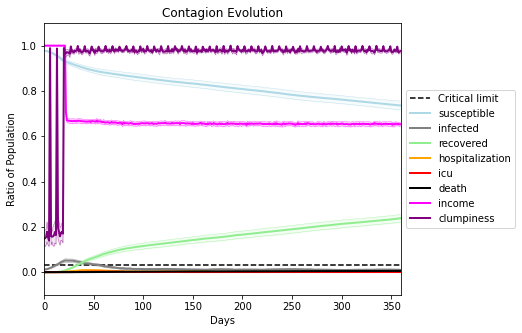

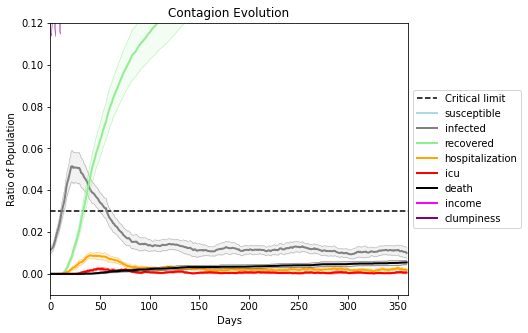

In [4]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
params.params['num_communities'] = 100
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 20,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 10, home_grid_width = 10, school_home_list = 
              [
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0)],
[(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9)],
[(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5)],
[(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
], work_home_list = [
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9),
(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5),
(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
], listeners = listeners)

Save these seeds if you want to rerun a scenario
[770, 8286, 5785, 4419, 8394, 508, 9233, 7469, 4712, 7805, 411, 8809, 5791, 6073, 6619, 6826, 1524, 9892, 6722, 8477]
Average similarity between family members is 0.9343290413201636 at temperature -0.999
Average similarity between family and home is 0.999862178870151 at temperature -1
Average similarity between students and their classroom is 0.5986107186969393 at temperature -0.999
Average classroom occupancy is 3.9857142857142858 and number classrooms is 70
Average similarity between workers is 0.8890477295301344 at temperature -0.999
Average office occupancy is 3.33 and number offices is 200
Average friend similarity for adults: 0.857719996799926 for kids: 0.6728877375325765
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 5 allocated units with a total of 14 people.
Total of 14 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBu

avg restaurant similarity 0.5873013445862753
avg restaurant similarity 0.6449791283217359
avg restaurant similarity 0.51050370661176
avg restaurant similarity 0.567005837741191
avg restaurant similarity 0.5778239237608384
avg restaurant similarity 0.5382813211045384
avg restaurant similarity 0.608287237998208
avg restaurant similarity 0.5883958828541364
avg restaurant similarity 0.5844701784719204
avg restaurant similarity 0.5743528239155399
avg restaurant similarity 0.5666271596227279
avg restaurant similarity 0.5778676662563262
avg restaurant similarity 0.536311489887203
avg restaurant similarity 0.5362235303220946
avg restaurant similarity 0.5808447987138522
avg restaurant similarity 0.5757576309702795
avg restaurant similarity 0.5986600011252038
avg restaurant similarity 0.5759815442232948
avg restaurant similarity 0.5272975929141431
avg restaurant similarity 0.5526974755902857
avg restaurant similarity 0.5634502632773501
avg restaurant similarity 0.62710909062382
avg restaurant si

avg restaurant similarity 0.5364171896254701
avg restaurant similarity 0.5597631718724209
avg restaurant similarity 0.5806086543593946
avg restaurant similarity 0.5585354008646919
avg restaurant similarity 0.5144537646607891
avg restaurant similarity 0.5478762946982398
avg restaurant similarity 0.5978695076271221
avg restaurant similarity 0.6375680341079568
avg restaurant similarity 0.5627107199543343
avg restaurant similarity 0.578721603490737
avg restaurant similarity 0.5749510805779282
avg restaurant similarity 0.551596234907163
avg restaurant similarity 0.5733652947427009
avg restaurant similarity 0.5617646485989188
avg restaurant similarity 0.5339283286648617
avg restaurant similarity 0.5858628728938488
avg restaurant similarity 0.5396939828382313
avg restaurant similarity 0.5769475308177353
avg restaurant similarity 0.5713727301133387
avg restaurant similarity 0.5281966003019203
avg restaurant similarity 0.5193733187923839
avg restaurant similarity 0.5956100164110434
avg restaura

avg restaurant similarity 0.6227855195572244
avg restaurant similarity 0.6323544126401076
avg restaurant similarity 0.6800367203561598
avg restaurant similarity 0.6361588405146954
avg restaurant similarity 0.6078389403968858
avg restaurant similarity 0.6446087469113909
avg restaurant similarity 0.6437901254179356
avg restaurant similarity 0.679635043920464
avg restaurant similarity 0.666975460685003
avg restaurant similarity 0.616550113706565
avg restaurant similarity 0.6972170418282941
avg restaurant similarity 0.6451258964210751
avg restaurant similarity 0.6813162500678089
avg restaurant similarity 0.6153028157400351
avg restaurant similarity 0.6430314804659364
avg restaurant similarity 0.706290225262539
avg restaurant similarity 0.6053733437484631
avg restaurant similarity 0.6691387284833814
avg restaurant similarity 0.6554555112989738
avg restaurant similarity 0.6666908845043328
avg restaurant similarity 0.6562024827180205
avg restaurant similarity 0.6523399083147803
avg restaurant

avg restaurant similarity 0.6210784079554681
avg restaurant similarity 0.6650287897919819
avg restaurant similarity 0.6034770538725185
avg restaurant similarity 0.6003830591832058
avg restaurant similarity 0.626749177664049
avg restaurant similarity 0.6423501153099974
avg restaurant similarity 0.6028826540650097
avg restaurant similarity 0.6146221234292252
avg restaurant similarity 0.6406981484852922
avg restaurant similarity 0.628291062421552
avg restaurant similarity 0.6540789387114552
avg restaurant similarity 0.6719346157930515
avg restaurant similarity 0.6751219612497237
avg restaurant similarity 0.5958584713941445
avg restaurant similarity 0.6575739098752982
avg restaurant similarity 0.5881957058752398
avg restaurant similarity 0.6185764513157057
avg restaurant similarity 0.6211455263320542
avg restaurant similarity 0.6049642162031224
avg restaurant similarity 0.6449815221285904
avg restaurant similarity 0.6516301216400567
avg restaurant similarity 0.6760759360445139
avg restaura

avg restaurant similarity 0.6570383746384235
avg restaurant similarity 0.597797158576871
avg restaurant similarity 0.5931280988901805
avg restaurant similarity 0.6629208210246592
avg restaurant similarity 0.590473654305083
avg restaurant similarity 0.6368890413769691
avg restaurant similarity 0.6020333734471984
avg restaurant similarity 0.6382039001199442
avg restaurant similarity 0.5440504476397793
avg restaurant similarity 0.5945959675901598
avg restaurant similarity 0.6115531292206909
avg restaurant similarity 0.6320630032549198
avg restaurant similarity 0.6328918708174537
avg restaurant similarity 0.6573588193647277
avg restaurant similarity 0.6179840917356556
avg restaurant similarity 0.6213251922201287
avg restaurant similarity 0.6261402924251919
avg restaurant similarity 0.577728799696921
avg restaurant similarity 0.6454443905494454
avg restaurant similarity 0.6209421803349762
avg restaurant similarity 0.6365850163440211
avg restaurant similarity 0.5737230660441534
avg restauran

avg restaurant similarity 0.6492043612705012
avg restaurant similarity 0.640668594124901
avg restaurant similarity 0.6141970762373851
avg restaurant similarity 0.6330591698973058
avg restaurant similarity 0.6321483978475135
avg restaurant similarity 0.5956952011053961
avg restaurant similarity 0.6454391938235848
avg restaurant similarity 0.6007461417609131
avg restaurant similarity 0.6136565133470749
avg restaurant similarity 0.6028729833309363
avg restaurant similarity 0.6389703117870595
avg restaurant similarity 0.6219111824247769
avg restaurant similarity 0.5654117828654908
avg restaurant similarity 0.6517596201174104
avg restaurant similarity 0.5973325640075654
avg restaurant similarity 0.6311570527973838
avg restaurant similarity 0.6578768229657462
avg restaurant similarity 0.6260848749678655
avg restaurant similarity 0.5974479139491999
avg restaurant similarity 0.6153821724952264
avg restaurant similarity 0.6657227444504684
avg restaurant similarity 0.6427112194942551
avg restaur

avg restaurant similarity 0.5717808631496529
avg restaurant similarity 0.6015217437650234
avg restaurant similarity 0.6010503793335165
avg restaurant similarity 0.6612966079874345
avg restaurant similarity 0.6043854010883586
avg restaurant similarity 0.657425845832953
avg restaurant similarity 0.6150847261179634
avg restaurant similarity 0.6457037938003216
avg restaurant similarity 0.65458854207569
avg restaurant similarity 0.627172681589575
avg restaurant similarity 0.6535786081861922
avg restaurant similarity 0.6369883335424268
avg restaurant similarity 0.6136493833783101
avg restaurant similarity 0.6397413673959896
avg restaurant similarity 0.6541000639372659
avg restaurant similarity 0.6650640852476032
avg restaurant similarity 0.6291746393393861
avg restaurant similarity 0.6690774126088062
avg restaurant similarity 0.630504466923412
avg restaurant similarity 0.6005518412177979
avg restaurant similarity 0.6315670218522004
avg restaurant similarity 0.6295530862753631
avg restaurant 

avg restaurant similarity 0.6525505228418025
avg restaurant similarity 0.6582875995043904
avg restaurant similarity 0.6266320672571349
avg restaurant similarity 0.6440163520525453
avg restaurant similarity 0.6320023854537142
avg restaurant similarity 0.5950873719243738
avg restaurant similarity 0.6333273989546064
avg restaurant similarity 0.6379277067556534
avg restaurant similarity 0.6604707482543316
avg restaurant similarity 0.6356372624521974
avg restaurant similarity 0.6317558894596872
avg restaurant similarity 0.611509582226073
avg restaurant similarity 0.6301375903239159
avg restaurant similarity 0.6533673466229066
avg restaurant similarity 0.6134445140553447
avg restaurant similarity 0.6301666388868252
avg restaurant similarity 0.646694352537673
avg restaurant similarity 0.6010366643513639
avg restaurant similarity 0.6693569764754305
avg restaurant similarity 0.6342367847972723
avg restaurant similarity 0.6539150878389921
avg restaurant similarity 0.6359397967114102
avg restaura

avg restaurant similarity 0.5980781737820445
avg restaurant similarity 0.6269666082935025
avg restaurant similarity 0.5874288677760288
avg restaurant similarity 0.5736906339468675
avg restaurant similarity 0.5941909842605133
avg restaurant similarity 0.5813232288959339
avg restaurant similarity 0.6427809601211766
avg restaurant similarity 0.5945448615727659
avg restaurant similarity 0.5923353363652284
avg restaurant similarity 0.6289463259770327
avg restaurant similarity 0.6141555479329845
avg restaurant similarity 0.6565486361605458
avg restaurant similarity 0.5846454167778489
avg restaurant similarity 0.5869204223513247
avg restaurant similarity 0.5984113841065885
avg restaurant similarity 0.5900935941432204
avg restaurant similarity 0.5851846592996869
avg restaurant similarity 0.5914192258010734
avg restaurant similarity 0.5602244353426842
avg restaurant similarity 0.6026526279655946
avg restaurant similarity 0.6307703802537521
avg restaurant similarity 0.6199733477879337
avg restau

avg restaurant similarity 0.6239024897505427
avg restaurant similarity 0.6041233812342341
avg restaurant similarity 0.6319587919431071
avg restaurant similarity 0.567024487824654
avg restaurant similarity 0.6333387455281195
avg restaurant similarity 0.6229499756757986
avg restaurant similarity 0.5708566311038661
avg restaurant similarity 0.6003334153055826
avg restaurant similarity 0.5513746252260744
avg restaurant similarity 0.6469474369130862
avg restaurant similarity 0.6110566025003887
avg restaurant similarity 0.5735177296895622
avg restaurant similarity 0.5965579034852878
avg restaurant similarity 0.5568708023541995
avg restaurant similarity 0.6167753122911316
avg restaurant similarity 0.6090663477333061
avg restaurant similarity 0.575601724460285
avg restaurant similarity 0.5611413814749221
avg restaurant similarity 0.6338239130612845
avg restaurant similarity 0.6231469962863926
avg restaurant similarity 0.5953675381271032
avg restaurant similarity 0.6340787261438845
avg restaura

avg restaurant similarity 0.5850981380880445
avg restaurant similarity 0.6192172208329403
avg restaurant similarity 0.5700636632443988
avg restaurant similarity 0.5739100486684616
avg restaurant similarity 0.599787879415086
avg restaurant similarity 0.5664291222993107
avg restaurant similarity 0.633450643977925
avg restaurant similarity 0.5940999063317808
avg restaurant similarity 0.6725936014355449
avg restaurant similarity 0.6753660962442162
avg restaurant similarity 0.6187262610393565
avg restaurant similarity 0.61144280055994
avg restaurant similarity 0.5654515005421132
avg restaurant similarity 0.5794367607669662
avg restaurant similarity 0.6187243641781959
avg restaurant similarity 0.619349310231934
avg restaurant similarity 0.6494848709807068
avg restaurant similarity 0.6061450885128568
avg restaurant similarity 0.6264372439834208
avg restaurant similarity 0.6231331776961552
avg restaurant similarity 0.645372070602134
avg restaurant similarity 0.5724782718629235
avg restaurant s

avg restaurant similarity 0.6290660433503976
avg restaurant similarity 0.6473881769494502
avg restaurant similarity 0.6516832422714952
avg restaurant similarity 0.6342096626961471
avg restaurant similarity 0.6001197212803909
avg restaurant similarity 0.587628164998367
avg restaurant similarity 0.6576901835525307
avg restaurant similarity 0.6536152422819334
avg restaurant similarity 0.610119877294734
avg restaurant similarity 0.6287756383548687
avg restaurant similarity 0.6123572049193508
avg restaurant similarity 0.6069128156191733
avg restaurant similarity 0.6039947054541773
avg restaurant similarity 0.5902704911357733
avg restaurant similarity 0.6267795998923336
avg restaurant similarity 0.667555607443273
avg restaurant similarity 0.646633912337226
avg restaurant similarity 0.5725439026264273
avg restaurant similarity 0.5980807272057705
avg restaurant similarity 0.6533750131883085
avg restaurant similarity 0.6115091518065381
avg restaurant similarity 0.5751916058281316
avg restaurant

avg restaurant similarity 0.5755985994011107
avg restaurant similarity 0.5917145992043369
avg restaurant similarity 0.6222820334153321
avg restaurant similarity 0.6352374039421743
avg restaurant similarity 0.6137931523037973
avg restaurant similarity 0.6440343291076746
avg restaurant similarity 0.6287733242443261
avg restaurant similarity 0.6068446681374896
avg restaurant similarity 0.6424642214320425
avg restaurant similarity 0.6282481210758227
avg restaurant similarity 0.6972615383913716
avg restaurant similarity 0.5821404071689475
avg restaurant similarity 0.6182969324382981
avg restaurant similarity 0.6790980216126586
avg restaurant similarity 0.615526922696492
avg restaurant similarity 0.6729654831534999
avg restaurant similarity 0.6253498788436785
avg restaurant similarity 0.6976144246313851
avg restaurant similarity 0.7202481641947152
avg restaurant similarity 0.6598122489877059
avg restaurant similarity 0.6443242431028686
avg restaurant similarity 0.6445811725670745
avg restaur

avg restaurant similarity 0.649571319532057
avg restaurant similarity 0.5838776259867203
avg restaurant similarity 0.6522663587760178
avg restaurant similarity 0.6008538454619817
avg restaurant similarity 0.5967468766865075
avg restaurant similarity 0.636176721351951
avg restaurant similarity 0.607060245297509
avg restaurant similarity 0.614648459946728
avg restaurant similarity 0.6137031656673075
avg restaurant similarity 0.6871978864654947
avg restaurant similarity 0.6460368577478652
avg restaurant similarity 0.6498369652843726
avg restaurant similarity 0.6471220066923165
avg restaurant similarity 0.671655175423372
avg restaurant similarity 0.5854726886962256
avg restaurant similarity 0.637811173735431
avg restaurant similarity 0.6181694759754147
avg restaurant similarity 0.6549640831552718
avg restaurant similarity 0.6512376136685644
avg restaurant similarity 0.6964645699675921
avg restaurant similarity 0.6504000899749643
avg restaurant similarity 0.6313561558136699
avg restaurant s

avg restaurant similarity 0.5520076927151348
avg restaurant similarity 0.6108807326559347
avg restaurant similarity 0.6063696512303474
avg restaurant similarity 0.6466842219352623
avg restaurant similarity 0.5369013165461476
avg restaurant similarity 0.5981430753614936
avg restaurant similarity 0.6142402731606496
avg restaurant similarity 0.6618185810522708
avg restaurant similarity 0.556323180949064
avg restaurant similarity 0.6250119279442518
avg restaurant similarity 0.6105148179729709
avg restaurant similarity 0.6017510423440317
avg restaurant similarity 0.632113925554378
avg restaurant similarity 0.6190260606461818
avg restaurant similarity 0.582258639289433
avg restaurant similarity 0.6160588758491227
avg restaurant similarity 0.630800800789235
avg restaurant similarity 0.6049453958715963
avg restaurant similarity 0.6301695964698134
avg restaurant similarity 0.6487654615324251
avg restaurant similarity 0.5822106968737181
avg restaurant similarity 0.5681175863950574
avg restaurant

avg restaurant similarity 0.611709592454619
avg restaurant similarity 0.5781815622727615
avg restaurant similarity 0.5842951599874115
avg restaurant similarity 0.6107039491320561
avg restaurant similarity 0.6265399931510994
avg restaurant similarity 0.6024287957992639
avg restaurant similarity 0.5587010401086464
avg restaurant similarity 0.591502306273646
avg restaurant similarity 0.625075130880048
avg restaurant similarity 0.6033310664646652
avg restaurant similarity 0.6395417010300208
avg restaurant similarity 0.6226494678389923
avg restaurant similarity 0.6039679256767826
avg restaurant similarity 0.64345142679643
avg restaurant similarity 0.6011217288874808
avg restaurant similarity 0.6070444718612547
avg restaurant similarity 0.6514905559562433
avg restaurant similarity 0.5883809385227128
avg restaurant similarity 0.6314567066243603
avg restaurant similarity 0.5844142333771791
avg restaurant similarity 0.6150198439187432
avg restaurant similarity 0.5998825657456057
avg restaurant 

avg restaurant similarity 0.6229665539911127
avg restaurant similarity 0.6404565125662213
avg restaurant similarity 0.6689491889153114
avg restaurant similarity 0.645913290428234
avg restaurant similarity 0.6465932589499035
avg restaurant similarity 0.6632604849458119
avg restaurant similarity 0.6820526458059866
avg restaurant similarity 0.6223836891636113
avg restaurant similarity 0.6533268832294787
avg restaurant similarity 0.6666267621057907
avg restaurant similarity 0.6618412808699727
avg restaurant similarity 0.674297617884633
avg restaurant similarity 0.6306435616027867
avg restaurant similarity 0.621948041365573
avg restaurant similarity 0.6766434360682139
avg restaurant similarity 0.6559942761140387
avg restaurant similarity 0.6385679677858126
avg restaurant similarity 0.6355653937879563
avg restaurant similarity 0.633838615437523
avg restaurant similarity 0.7162008740330855
avg restaurant similarity 0.6987232229401285
avg restaurant similarity 0.6709366183508848
avg restaurant

avg restaurant similarity 0.6813609132886362
avg restaurant similarity 0.6885573315344354
avg restaurant similarity 0.6847203534943842
avg restaurant similarity 0.6365950338732502
avg restaurant similarity 0.6373209376020604
avg restaurant similarity 0.6480738062655806
avg restaurant similarity 0.6589446624335006
avg restaurant similarity 0.6622461434129084
avg restaurant similarity 0.648382879966659
avg restaurant similarity 0.6732256346383179
avg restaurant similarity 0.6076455492648266
avg restaurant similarity 0.6145349470923027
avg restaurant similarity 0.5946018757929118
avg restaurant similarity 0.6396882884126837
avg restaurant similarity 0.6604984352429074
avg restaurant similarity 0.6600489260620205
avg restaurant similarity 0.626580260755632
avg restaurant similarity 0.6853137470409874
avg restaurant similarity 0.6706104655646765
avg restaurant similarity 0.668730735887941
avg restaurant similarity 0.6625457385513172
avg restaurant similarity 0.6383792222320628
avg restauran

avg restaurant similarity 0.6711726508928662
avg restaurant similarity 0.608801799248039
avg restaurant similarity 0.6781667938086989
avg restaurant similarity 0.6599468515906562
avg restaurant similarity 0.6485289273820982
avg restaurant similarity 0.6233803106678221
avg restaurant similarity 0.6041926525385263
avg restaurant similarity 0.6368814211808059
avg restaurant similarity 0.6457362402350877
avg restaurant similarity 0.6675857756636282
avg restaurant similarity 0.6228376008030848
avg restaurant similarity 0.6277684658394725
avg restaurant similarity 0.6158021588842054
avg restaurant similarity 0.7373773281848273
avg restaurant similarity 0.6496902942735545
avg restaurant similarity 0.6625336280685046
avg restaurant similarity 0.6406581933673045
avg restaurant similarity 0.6764205010251522
avg restaurant similarity 0.6821542474874267
avg restaurant similarity 0.6237858121874889
avg restaurant similarity 0.614399626583116
avg restaurant similarity 0.640954107124494
avg restauran

avg restaurant similarity 0.646036342084049
avg restaurant similarity 0.6164647883355402
avg restaurant similarity 0.6769908075387314
avg restaurant similarity 0.673520487204224
avg restaurant similarity 0.6155625943577109
avg restaurant similarity 0.6372856231247371
avg restaurant similarity 0.6686002160845197
avg restaurant similarity 0.6073356383756144
avg restaurant similarity 0.6198562580516916
avg restaurant similarity 0.6756956774300927
avg restaurant similarity 0.6539530308345141
avg restaurant similarity 0.6702078105470656
avg restaurant similarity 0.6425227965957776
avg restaurant similarity 0.6775670804401182
avg restaurant similarity 0.6616895976091888
avg restaurant similarity 0.688838624525627
avg restaurant similarity 0.6876183710669661
avg restaurant similarity 0.6784715929050328
avg restaurant similarity 0.6289930573970167
avg restaurant similarity 0.6586297944298029
avg restaurant similarity 0.6665546888795063
avg restaurant similarity 0.6892010807671978
avg restauran

avg restaurant similarity 0.6325983185143337
avg restaurant similarity 0.6010115799230759
avg restaurant similarity 0.6125797206343929
avg restaurant similarity 0.6758290742849928
avg restaurant similarity 0.6353786817094177
avg restaurant similarity 0.6172138034678072
avg restaurant similarity 0.6206930710869091
avg restaurant similarity 0.6619440314105839
avg restaurant similarity 0.5510755386141534
avg restaurant similarity 0.611797050527848
avg restaurant similarity 0.6346976173111097
avg restaurant similarity 0.6124939552222939
avg restaurant similarity 0.6074186623761071
avg restaurant similarity 0.6075579855750182
avg restaurant similarity 0.5870432701313955
avg restaurant similarity 0.6342682300137165
avg restaurant similarity 0.6004920777395345
avg restaurant similarity 0.6003848445685448
avg restaurant similarity 0.599443620836629
avg restaurant similarity 0.5904497121466636
avg restaurant similarity 0.6228144115021458
avg restaurant similarity 0.5724632625357388
avg restaura

avg restaurant similarity 0.5989279551810183
avg restaurant similarity 0.6174719329527564
avg restaurant similarity 0.6512392425709315
avg restaurant similarity 0.5835051614273389
avg restaurant similarity 0.6540809455793759
avg restaurant similarity 0.6235041088882369
avg restaurant similarity 0.6006150744102153
avg restaurant similarity 0.6096157321390774
avg restaurant similarity 0.5961090750964788
avg restaurant similarity 0.6123871692200962
avg restaurant similarity 0.5850902838766364
avg restaurant similarity 0.5891192869798272
avg restaurant similarity 0.5954695258408073
avg restaurant similarity 0.5575656691647835
avg restaurant similarity 0.6339471343428384
avg restaurant similarity 0.6014411660117899
avg restaurant similarity 0.6381174141858154
avg restaurant similarity 0.5982705713403917
avg restaurant similarity 0.6010763749232865
avg restaurant similarity 0.6188350647993003
avg restaurant similarity 0.6383038837236559
avg restaurant similarity 0.6558274363585799
avg restau

avg restaurant similarity 0.6539455040503269
avg restaurant similarity 0.6387227957800847
avg restaurant similarity 0.6379817555958285
avg restaurant similarity 0.5617126401821223
avg restaurant similarity 0.5487791507735429
avg restaurant similarity 0.5618703361576014
avg restaurant similarity 0.6096320972446464
avg restaurant similarity 0.5965631891198375
avg restaurant similarity 0.6334393924610724
avg restaurant similarity 0.6569335969923367
avg restaurant similarity 0.6497478760161657
avg restaurant similarity 0.5811264511611929
avg restaurant similarity 0.6171465521637554
avg restaurant similarity 0.5982031971275097
avg restaurant similarity 0.6112492454204121
avg restaurant similarity 0.5707739527167703
avg restaurant similarity 0.6079263758575616
avg restaurant similarity 0.571608215908052
avg restaurant similarity 0.6044263590733941
avg restaurant similarity 0.6058484820787734
avg restaurant similarity 0.6238741113257513
avg restaurant similarity 0.616254021668748
avg restaura

avg restaurant similarity 0.6455364127159147
avg restaurant similarity 0.6224343959752202
avg restaurant similarity 0.6219225954398616
avg restaurant similarity 0.6403096884581809
avg restaurant similarity 0.5714841992561215
avg restaurant similarity 0.5972663597070713
avg restaurant similarity 0.6536529462824836
avg restaurant similarity 0.622406357158832
avg restaurant similarity 0.6135839257449587
avg restaurant similarity 0.6405604097014272
avg restaurant similarity 0.5997092804790064
avg restaurant similarity 0.6343593004069966
avg restaurant similarity 0.6014240782558973
avg restaurant similarity 0.5973311285019665
avg restaurant similarity 0.6090774151138053
avg restaurant similarity 0.611656411234305
avg restaurant similarity 0.608718977469095
avg restaurant similarity 0.6069744512863993
avg restaurant similarity 0.6022153522698114
avg restaurant similarity 0.624582279486027
avg restaurant similarity 0.6169778808548341
avg restaurant similarity 0.6895161720550043
avg restaurant

avg restaurant similarity 0.5496930728645603
avg restaurant similarity 0.5922523889224461
avg restaurant similarity 0.5945778973909857
avg restaurant similarity 0.5614505792652432
avg restaurant similarity 0.5247193267656328
avg restaurant similarity 0.591814247507964
avg restaurant similarity 0.5350251592053897
avg restaurant similarity 0.571290775504823
avg restaurant similarity 0.5589990771168163
avg restaurant similarity 0.5661987828525527
avg restaurant similarity 0.5097250716308545
avg restaurant similarity 0.5561786651985263
avg restaurant similarity 0.5378183958838674
avg restaurant similarity 0.5463908196095617
avg restaurant similarity 0.5385540657804606
avg restaurant similarity 0.5742884508665229
avg restaurant similarity 0.5748896357248197
avg restaurant similarity 0.5311609010503413
avg restaurant similarity 0.5512229145481534
avg restaurant similarity 0.5279691625989762
avg restaurant similarity 0.5321777569257803
avg restaurant similarity 0.551767876931384
avg restauran

avg restaurant similarity 0.5540003008345955
avg restaurant similarity 0.5816399584798181
avg restaurant similarity 0.5810196775934798
avg restaurant similarity 0.5543012202130296
avg restaurant similarity 0.552936041541786
avg restaurant similarity 0.5579277330546439
avg restaurant similarity 0.5908780329787618
avg restaurant similarity 0.5153376880837275
avg restaurant similarity 0.588927075624503
avg restaurant similarity 0.5905176801978184
avg restaurant similarity 0.5584310157469914
avg restaurant similarity 0.5790257006731276
avg restaurant similarity 0.5618487664609596
avg restaurant similarity 0.5747175562496248
avg restaurant similarity 0.5440802253813471
avg restaurant similarity 0.5930673759011184
avg restaurant similarity 0.5270709612329354
avg restaurant similarity 0.5677112797533769
avg restaurant similarity 0.5714072032251687
avg restaurant similarity 0.5357054697396733
avg restaurant similarity 0.6028529738776887
avg restaurant similarity 0.5901732745924094
avg restaura

avg restaurant similarity 0.6294846996345228
avg restaurant similarity 0.6225523757230601
avg restaurant similarity 0.6291020761717305
avg restaurant similarity 0.6643900752396477
avg restaurant similarity 0.5886566615662114
avg restaurant similarity 0.585900695438412
avg restaurant similarity 0.6434906794187752
avg restaurant similarity 0.6132315186538196
avg restaurant similarity 0.6155734898569671
avg restaurant similarity 0.609223522550197
avg restaurant similarity 0.5860824007027887
avg restaurant similarity 0.6413005385739439
avg restaurant similarity 0.6895037101413823
avg restaurant similarity 0.6455145942080888
avg restaurant similarity 0.6423596072397963
avg restaurant similarity 0.6796225194003139
avg restaurant similarity 0.616875039528562
avg restaurant similarity 0.6016488295200355
avg restaurant similarity 0.6228443403424303
avg restaurant similarity 0.6707500418220057
avg restaurant similarity 0.6624931654856913
avg restaurant similarity 0.6237515716940706
avg restauran

avg restaurant similarity 0.6551694496335747
avg restaurant similarity 0.6455885448940767
avg restaurant similarity 0.6590210965949211
avg restaurant similarity 0.6889750654211865
avg restaurant similarity 0.6445239358990542
avg restaurant similarity 0.6394323777518709
avg restaurant similarity 0.6667676751188203
avg restaurant similarity 0.6529555790422573
avg restaurant similarity 0.6661765714938536
avg restaurant similarity 0.6216977822300033
avg restaurant similarity 0.5958736605095702
avg restaurant similarity 0.6342320173184703
avg restaurant similarity 0.649185142645387
avg restaurant similarity 0.5847625240532095
avg restaurant similarity 0.590642550440135
avg restaurant similarity 0.6658468895151782
avg restaurant similarity 0.6393659322242877
avg restaurant similarity 0.6268610123114291
avg restaurant similarity 0.6351253971484637
avg restaurant similarity 0.652893486667356
avg restaurant similarity 0.640828467285995
avg restaurant similarity 0.5977268394185867
avg restaurant

avg restaurant similarity 0.611469862960701
avg restaurant similarity 0.5740195284151194
avg restaurant similarity 0.5824920329228815
avg restaurant similarity 0.6321489806216584
avg restaurant similarity 0.6050267620245323
avg restaurant similarity 0.606446871282367
avg restaurant similarity 0.5651978388978873
avg restaurant similarity 0.6101493246492988
avg restaurant similarity 0.6143194247573226
avg restaurant similarity 0.6101609373948703
avg restaurant similarity 0.5719030800316831
avg restaurant similarity 0.6387623488745692
avg restaurant similarity 0.6102540496124731
avg restaurant similarity 0.6118060603068589
avg restaurant similarity 0.6212549592800263
avg restaurant similarity 0.5896826874171288
avg restaurant similarity 0.5834835751169279
avg restaurant similarity 0.5966747445065165
avg restaurant similarity 0.6032298653660297
avg restaurant similarity 0.5958228865140427
avg restaurant similarity 0.625763693196679
avg restaurant similarity 0.6134007457167404
avg restauran

avg restaurant similarity 0.6118607121643187
avg restaurant similarity 0.5985175716514606
avg restaurant similarity 0.6038209952177369
avg restaurant similarity 0.6032103501906871
avg restaurant similarity 0.5924347415150666
avg restaurant similarity 0.6060804069204867
avg restaurant similarity 0.5903837655466713
avg restaurant similarity 0.6342714166849199
avg restaurant similarity 0.6279832355095571
avg restaurant similarity 0.6394037919447138
avg restaurant similarity 0.611586964721819
avg restaurant similarity 0.6718313741970723
avg restaurant similarity 0.6196705744199923
avg restaurant similarity 0.6944413998445196
avg restaurant similarity 0.6418389362256595
avg restaurant similarity 0.6062503033797076
avg restaurant similarity 0.6888922288227171
avg restaurant similarity 0.6466707385378672
avg restaurant similarity 0.5734771866072043
avg restaurant similarity 0.5975978092822432
avg restaurant similarity 0.5761144653218594
avg restaurant similarity 0.6135904988922096
avg restaur

avg restaurant similarity 0.6439160784786224
avg restaurant similarity 0.6237007744945781
avg restaurant similarity 0.6118610397928197
avg restaurant similarity 0.5741042788448981
avg restaurant similarity 0.6160618445458365
avg restaurant similarity 0.6453927870677579
avg restaurant similarity 0.654706278978068
avg restaurant similarity 0.5988896657006506
avg restaurant similarity 0.6229579470118104
avg restaurant similarity 0.6272363450633557
avg restaurant similarity 0.6154101940699261
avg restaurant similarity 0.5890116915875311
avg restaurant similarity 0.6156304870856728
avg restaurant similarity 0.6843225799251794
avg restaurant similarity 0.6017700967120247
avg restaurant similarity 0.6478190839662462
avg restaurant similarity 0.6118318950019715
avg restaurant similarity 0.6161573344426665
avg restaurant similarity 0.6427302250847008
avg restaurant similarity 0.5590040236246394
avg restaurant similarity 0.5681186344814603
avg restaurant similarity 0.6922849293864635
avg restaur

avg restaurant similarity 0.6302594847199475
avg restaurant similarity 0.5783908698902649
avg restaurant similarity 0.6054010707528593
avg restaurant similarity 0.6159254501477508
avg restaurant similarity 0.6519443641411539
avg restaurant similarity 0.6560763538550882
avg restaurant similarity 0.6656295866369817
avg restaurant similarity 0.6806733102831554
avg restaurant similarity 0.6787631711928035
avg restaurant similarity 0.5894096351424608
avg restaurant similarity 0.5928142170836262
avg restaurant similarity 0.6518162333872323
avg restaurant similarity 0.7008780610316606
avg restaurant similarity 0.6397064572941897
avg restaurant similarity 0.6092528816015965
avg restaurant similarity 0.6633211176409749
avg restaurant similarity 0.6549608884552606
avg restaurant similarity 0.6084858290793017
avg restaurant similarity 0.65295574805079
avg restaurant similarity 0.625746308313685
avg restaurant similarity 0.5904676813841584
avg restaurant similarity 0.6538750172069334
avg restauran

avg restaurant similarity 0.5985007053537705
avg restaurant similarity 0.5910707599892775
avg restaurant similarity 0.6356353797142485
avg restaurant similarity 0.5733945074966468
avg restaurant similarity 0.6532527305842131
avg restaurant similarity 0.5875092669150772
avg restaurant similarity 0.590456445751586
avg restaurant similarity 0.598729500299664
avg restaurant similarity 0.5683113046161067
avg restaurant similarity 0.6132171070790781
avg restaurant similarity 0.5523485631863961
avg restaurant similarity 0.6084332223249668
avg restaurant similarity 0.6280240802702511
avg restaurant similarity 0.6156366475387601
avg restaurant similarity 0.6187769828408239
avg restaurant similarity 0.6294787821672949
avg restaurant similarity 0.5759108459368559
avg restaurant similarity 0.6400177207506305
avg restaurant similarity 0.6410450427670479
avg restaurant similarity 0.6551997083534857
avg restaurant similarity 0.5921373261722526
avg restaurant similarity 0.6319463676833563
avg restaura

avg restaurant similarity 0.5997383547666715
avg restaurant similarity 0.5716826362253381
avg restaurant similarity 0.5544419314198039
avg restaurant similarity 0.5480239460100399
avg restaurant similarity 0.5614384918861585
avg restaurant similarity 0.6149007880253006
avg restaurant similarity 0.5651968955541042
avg restaurant similarity 0.6378057317830392
avg restaurant similarity 0.6058909783673267
avg restaurant similarity 0.5953655440061153
avg restaurant similarity 0.5761546061099379
avg restaurant similarity 0.6168850909288913
avg restaurant similarity 0.6362051012007797
avg restaurant similarity 0.6655254093653675
avg restaurant similarity 0.640456801869376
avg restaurant similarity 0.6085499026449096
avg restaurant similarity 0.6189771538802799
avg restaurant similarity 0.635018699838081
avg restaurant similarity 0.6502105859257699
avg restaurant similarity 0.6234940410022134
avg restaurant similarity 0.6351565164632947
avg restaurant similarity 0.5893502350184239
avg restaura

avg restaurant similarity 0.6094242732829068
avg restaurant similarity 0.6301665565688986
avg restaurant similarity 0.6055389765224646
avg restaurant similarity 0.5416834726304637
avg restaurant similarity 0.565176727560229
avg restaurant similarity 0.6235619944090414
avg restaurant similarity 0.5324544085975744
avg restaurant similarity 0.6122625513059988
avg restaurant similarity 0.6272832487935819
avg restaurant similarity 0.6141234183447484
avg restaurant similarity 0.6720566168149832
avg restaurant similarity 0.573401483294797
avg restaurant similarity 0.588154460343518
avg restaurant similarity 0.6002190540170264
avg restaurant similarity 0.5697338714629152
avg restaurant similarity 0.6337614311750679
avg restaurant similarity 0.6196528625074612
avg restaurant similarity 0.6617316194519709
avg restaurant similarity 0.6570727521382357
avg restaurant similarity 0.6427567903662662
avg restaurant similarity 0.6149442891139385
avg restaurant similarity 0.6311074362777657
avg restauran

avg restaurant similarity 0.6333840481436268
avg restaurant similarity 0.6546330788739108
avg restaurant similarity 0.6297702178700758
avg restaurant similarity 0.6315933928361034
avg restaurant similarity 0.6059123340931527
avg restaurant similarity 0.5820905117130932
avg restaurant similarity 0.5938361663909986
avg restaurant similarity 0.6378502093933486
avg restaurant similarity 0.6746005289809758
avg restaurant similarity 0.6558974764374144
avg restaurant similarity 0.674032599911392
avg restaurant similarity 0.6528076468818087
avg restaurant similarity 0.5661813630008264
avg restaurant similarity 0.577352306015381
avg restaurant similarity 0.6362374827789641
avg restaurant similarity 0.6403538789352388
avg restaurant similarity 0.5829836405481852
avg restaurant similarity 0.6208044005928103
avg restaurant similarity 0.6427900614376912
avg restaurant similarity 0.6555081398029198
avg restaurant similarity 0.6085406462352069
avg restaurant similarity 0.6545635073295798
avg restaura

avg restaurant similarity 0.6113819377727199
avg restaurant similarity 0.5618351772096966
avg restaurant similarity 0.610952734806056
avg restaurant similarity 0.5745989423494846
avg restaurant similarity 0.589004904072465
avg restaurant similarity 0.6257069965911162
avg restaurant similarity 0.6270853636919012
avg restaurant similarity 0.5659963781968408
avg restaurant similarity 0.6117832844115034
avg restaurant similarity 0.5888677682512886
avg restaurant similarity 0.6152687288208984
avg restaurant similarity 0.5865975855514844
avg restaurant similarity 0.6020891770330264
avg restaurant similarity 0.594683999692531
avg restaurant similarity 0.602341760073686
avg restaurant similarity 0.598720216756712
avg restaurant similarity 0.5870730660189382
avg restaurant similarity 0.562703176169977
avg restaurant similarity 0.5624146956811091
avg restaurant similarity 0.5737106097660613
avg restaurant similarity 0.6272905563196648
avg restaurant similarity 0.6058779207669118
avg restaurant s

avg restaurant similarity 0.5704285606742082
avg restaurant similarity 0.5683816615543258
avg restaurant similarity 0.6469819036471969
avg restaurant similarity 0.63248711454676
avg restaurant similarity 0.6143941745217335
avg restaurant similarity 0.62848507643161
avg restaurant similarity 0.6207060054335531
avg restaurant similarity 0.6266815597219871
avg restaurant similarity 0.6085019470270618
avg restaurant similarity 0.6400876172498869
avg restaurant similarity 0.6035804963849601
avg restaurant similarity 0.6559389055449151
avg restaurant similarity 0.6509480560086875
avg restaurant similarity 0.6361361898735902
avg restaurant similarity 0.6131354185394275
avg restaurant similarity 0.5963822137690068
avg restaurant similarity 0.5782814763714441
avg restaurant similarity 0.609061038865136
avg restaurant similarity 0.600108747040643
avg restaurant similarity 0.5602890651588837
avg restaurant similarity 0.607587839392124
avg restaurant similarity 0.6139244029398695
avg restaurant si

avg restaurant similarity 0.6294696532239301
avg restaurant similarity 0.5984281802555863
avg restaurant similarity 0.6292712820116912
avg restaurant similarity 0.6020227704273844
avg restaurant similarity 0.5960170639732568
avg restaurant similarity 0.59552854337763
avg restaurant similarity 0.609490499968418
avg restaurant similarity 0.6153195536187237
avg restaurant similarity 0.6064596208614386
avg restaurant similarity 0.6136857822500313
avg restaurant similarity 0.6026683477756559
avg restaurant similarity 0.5599182929241002
avg restaurant similarity 0.623012841177518
avg restaurant similarity 0.6043159033043168
avg restaurant similarity 0.637359164520139
avg restaurant similarity 0.6817743786577378
avg restaurant similarity 0.5790305677941263
avg restaurant similarity 0.5322384619472353
avg restaurant similarity 0.5853228173936063
avg restaurant similarity 0.5929889305079947
avg restaurant similarity 0.6255082047064684
avg restaurant similarity 0.5589967259791281
avg restaurant 

avg restaurant similarity 0.5863452665924368
avg restaurant similarity 0.6217456245432844
avg restaurant similarity 0.6634315295757169
avg restaurant similarity 0.5863511834337923
avg restaurant similarity 0.628161732198377
avg restaurant similarity 0.6343125842530102
avg restaurant similarity 0.6052802592287296
avg restaurant similarity 0.5929724914751815
avg restaurant similarity 0.6156663492980389
avg restaurant similarity 0.6164602432661265
avg restaurant similarity 0.5815765966809013
avg restaurant similarity 0.644182134445901
avg restaurant similarity 0.6334295848982456
avg restaurant similarity 0.6329403394139971
avg restaurant similarity 0.6222957089402958
avg restaurant similarity 0.5949586670226509
avg restaurant similarity 0.6261143710185015
avg restaurant similarity 0.58640375002852
avg restaurant similarity 0.5700869643019361
avg restaurant similarity 0.6445170575432347
avg restaurant similarity 0.6240504429533412
avg restaurant similarity 0.6564983464913776
avg restaurant

(<function dict.items>, <function dict.items>, <function dict.items>)

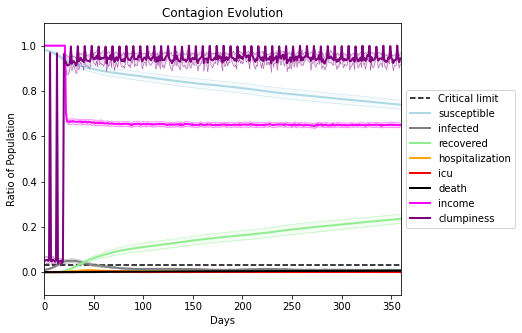

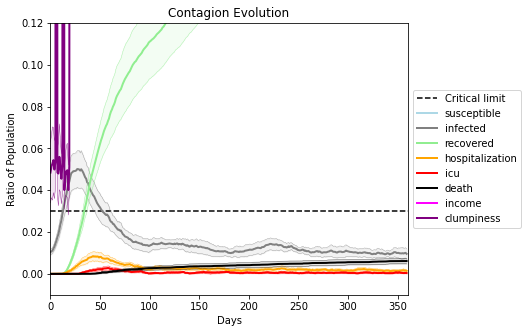

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
params.params['num_communities'] = 100
seeds = [2252]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=20,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 10, home_grid_width = 10, school_home_list = 
             [
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0)],
[(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9)],
[(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5)],
[(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
],
              work_home_list = 
            
[
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9),
(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5),
(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
],listeners = listeners)

Save these seeds if you want to rerun a scenario
[9930, 5563, 2766, 9054, 8868, 4490, 6384, 3083, 5215, 9767, 935, 4998, 4513, 7479, 8029, 9164, 3756, 8093, 6253, 3445]
Average similarity between family members is 0.010174028956841233 at temperature 1
Average similarity between family and home is 0.9998649761426979 at temperature -1
Average similarity between students and their classroom is 0.015601043117489057 at temperature 1
Average classroom occupancy is 4.357142857142857 and number classrooms is 70
Average similarity between workers is 0.006367270936663355 at temperature 1
Average office occupancy is 3.0970873786407767 and number offices is 206
Average friend similarity for adults: 0.08023415275612471 for kids: 0.07601293164065542
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 5 allocated units with a total of 14 people.
Total of 14 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
Hom

avg restaurant similarity 0.027898678049107777
avg restaurant similarity 0.01897962679041916
avg restaurant similarity -0.004430383289865032
avg restaurant similarity 0.03808278097941932
avg restaurant similarity 0.04608320728629095
avg restaurant similarity 0.007790225409833198
avg restaurant similarity -0.01723145510259281
avg restaurant similarity 0.009033745291966338
avg restaurant similarity 0.06014150411921646
avg restaurant similarity 0.045614065264203175
avg restaurant similarity 0.01601015154219566
avg restaurant similarity 0.013872980230147618
avg restaurant similarity 0.0010748682904703501
avg restaurant similarity 0.02084245985358556
avg restaurant similarity 0.02510905801200464
avg restaurant similarity -0.006064958731371936
avg restaurant similarity 0.009174051082040642
avg restaurant similarity -0.03179297973123626
avg restaurant similarity -0.005008013919797566
avg restaurant similarity 0.008507851840125596
avg restaurant similarity -0.019425930473548708
avg restaurant 

avg restaurant similarity 0.08155743067154671
avg restaurant similarity 0.048050868194380536
avg restaurant similarity -0.011287044535135286
avg restaurant similarity -0.01717337875896527
avg restaurant similarity -0.02483013176211617
avg restaurant similarity -0.014157914867294823
avg restaurant similarity 0.045382173463513496
avg restaurant similarity -0.015407405518155854
avg restaurant similarity 0.03621598836422911
avg restaurant similarity -0.030716911173088557
avg restaurant similarity -0.019763359275670647
avg restaurant similarity 0.003940487384555243
avg restaurant similarity 0.004460081334008013
avg restaurant similarity 0.03587411901341921
avg restaurant similarity 0.03836106564373437
avg restaurant similarity 0.026243523643228222
avg restaurant similarity -0.012333793564465132
avg restaurant similarity -0.0026088793020882985
avg restaurant similarity 0.01635006396655651
avg restaurant similarity 0.02859745036214441
avg restaurant similarity -0.04893041850039952
avg restaur

avg restaurant similarity 0.005896334404622967
avg restaurant similarity -0.03264806398311368
avg restaurant similarity -0.00039612997923002075
avg restaurant similarity -0.004915117282592496
avg restaurant similarity 0.06239168104833828
avg restaurant similarity -0.004009227511037895
avg restaurant similarity 0.025178094575812143
avg restaurant similarity 0.005586900326844751
avg restaurant similarity -0.009684089921227686
avg restaurant similarity -0.014193243952104263
avg restaurant similarity 0.04308307408136582
avg restaurant similarity 0.017918240141108224
avg restaurant similarity 0.02583123105137198
avg restaurant similarity 0.03010001388618677
avg restaurant similarity -0.015580229085339866
avg restaurant similarity 0.02494208102856438
avg restaurant similarity 0.0023073918144138564
avg restaurant similarity 0.013420658806992567
avg restaurant similarity -0.02563079896583096
avg restaurant similarity -0.01972538696343803
avg restaurant similarity 0.032027354057662494
avg resta

avg restaurant similarity 0.003982134475360418
avg restaurant similarity 0.0019233269983024
avg restaurant similarity 0.02763097228609754
avg restaurant similarity 0.03202668064360398
avg restaurant similarity 0.03609667763613581
avg restaurant similarity 0.027006523745728685
avg restaurant similarity 0.0037663635095627366
avg restaurant similarity 0.0299392963298611
avg restaurant similarity 0.0343505525070496
avg restaurant similarity -0.006492163800792025
avg restaurant similarity -0.013947864368725825
avg restaurant similarity 0.037716888710792644
avg restaurant similarity 0.01760917726765826
avg restaurant similarity -0.004432162295070602
avg restaurant similarity 0.03431944209187203
avg restaurant similarity 0.016633380566149495
avg restaurant similarity -0.016656365581063946
avg restaurant similarity 0.0053537659577067714
avg restaurant similarity -0.01020511543956124
avg restaurant similarity 0.03556794533228557
avg restaurant similarity 0.017630611577927825
avg restaurant simi

avg restaurant similarity 0.014844149919968483
avg restaurant similarity -0.0059995091882080725
avg restaurant similarity -0.014045248419465394
avg restaurant similarity -0.0005906023090471691
avg restaurant similarity 0.0005701830793702596
avg restaurant similarity -0.004240813719416868
avg restaurant similarity -0.018559862380679797
avg restaurant similarity 0.05225620301741273
avg restaurant similarity 0.015229312752801158
avg restaurant similarity -0.008671582631636568
avg restaurant similarity -0.01067651748343188
avg restaurant similarity -0.07356263175015611
avg restaurant similarity 0.016496863304712412
avg restaurant similarity -0.0019304332286643265
avg restaurant similarity 0.05808515018019112
avg restaurant similarity 0.0025645210495376125
avg restaurant similarity -0.04341435923813623
avg restaurant similarity 0.046465661089828574
avg restaurant similarity -0.00969045088390837
avg restaurant similarity -0.023626744184483177
avg restaurant similarity 0.033407652359209415
av

avg restaurant similarity 0.01214783261940406
avg restaurant similarity 0.0031488335270223313
avg restaurant similarity 0.049415372348055576
avg restaurant similarity 0.00946906811393506
avg restaurant similarity 0.00676941471556592
avg restaurant similarity 0.048188393785513775
avg restaurant similarity 0.025730869727124087
avg restaurant similarity 0.05103395655887472
avg restaurant similarity -0.028591050665479394
avg restaurant similarity -0.02122475698055729
avg restaurant similarity -0.012419004378520436
avg restaurant similarity -0.009622789369196529
avg restaurant similarity -0.019579936430748825
avg restaurant similarity 0.028609830701442338
avg restaurant similarity 0.020460597595091504
avg restaurant similarity 0.04281623978802439
avg restaurant similarity 0.0340831822208499
avg restaurant similarity -0.04898688818299478
avg restaurant similarity 0.016537278494403316
avg restaurant similarity 0.04304503943501005
avg restaurant similarity 0.019265873124343927
avg restaurant s

avg restaurant similarity 0.03046526688282588
avg restaurant similarity 0.017081310072248602
avg restaurant similarity -0.026454013984146728
avg restaurant similarity 0.018117538139409032
avg restaurant similarity 0.03311033568465479
avg restaurant similarity 0.0008196374225720667
avg restaurant similarity -0.00765055625327115
avg restaurant similarity 0.05320424113380169
avg restaurant similarity 0.006245608209332492
avg restaurant similarity -0.004129548495716018
avg restaurant similarity 0.0146704807310263
avg restaurant similarity 0.03874200555398117
avg restaurant similarity 0.0032772189511259655
avg restaurant similarity -0.019895146274968308
avg restaurant similarity 0.031788369130574555
avg restaurant similarity -0.021666417996120395
avg restaurant similarity 0.02263689869123649
avg restaurant similarity -0.013944807675944417
avg restaurant similarity 0.00040856494859801187
avg restaurant similarity 0.0038716561752373405
avg restaurant similarity -0.004459226272514994
avg resta

avg restaurant similarity -0.00980102331499995
avg restaurant similarity -0.005167253444160852
avg restaurant similarity 0.008986799453733358
avg restaurant similarity 0.03525116052209547
avg restaurant similarity 0.01619740477538465
avg restaurant similarity 0.01686394295666162
avg restaurant similarity -0.003152279042688191
avg restaurant similarity 0.0420253867388899
avg restaurant similarity 0.039368010294931206
avg restaurant similarity 0.020907744308059518
avg restaurant similarity -0.0033584710624749263
avg restaurant similarity -0.006350903173950887
avg restaurant similarity -0.0010564938322127034
avg restaurant similarity 0.030055115942763534
avg restaurant similarity 0.05040555116890302
avg restaurant similarity -0.010564637302810266
avg restaurant similarity 0.0017207701634905654
avg restaurant similarity -0.020017119193799865
avg restaurant similarity 0.044516740467960364
avg restaurant similarity 0.009804876096779682
avg restaurant similarity -0.017633163772484584
avg rest

avg restaurant similarity 0.052146634265331636
avg restaurant similarity -0.0019485655094602559
avg restaurant similarity -0.02057134713231364
avg restaurant similarity -0.0008209744505497367
avg restaurant similarity 0.0038996860038719174
avg restaurant similarity -0.018262678537113948
avg restaurant similarity 0.06373444314657202
avg restaurant similarity 0.004727157030671565
avg restaurant similarity 0.05791303836389034
avg restaurant similarity 0.06613899069318496
avg restaurant similarity 0.03569392187789492
avg restaurant similarity 0.017257244564824414
avg restaurant similarity -0.0015115675113430095
avg restaurant similarity 0.031086108812440758
avg restaurant similarity 0.0250153760667844
avg restaurant similarity 0.026863350426297852
avg restaurant similarity 0.03240956013770709
avg restaurant similarity 0.017658314505910048
avg restaurant similarity -0.00969453636241263
avg restaurant similarity 0.007288008971981326
avg restaurant similarity -0.02535930941803618
avg restaura

avg restaurant similarity 0.039267030173709985
avg restaurant similarity 0.048677438276195244
avg restaurant similarity 0.022109705923258036
avg restaurant similarity 0.031389780756822666
avg restaurant similarity 0.004578616954316921
avg restaurant similarity 0.007511168769793915
avg restaurant similarity 0.03589451372256492
avg restaurant similarity 0.04381743215889093
avg restaurant similarity 0.05357040537961996
avg restaurant similarity 0.03692058047562187
avg restaurant similarity -0.004063944959621014
avg restaurant similarity 0.032377271296193263
avg restaurant similarity 0.024249841526990258
avg restaurant similarity 0.011666347005655867
avg restaurant similarity 0.046101880102309103
avg restaurant similarity -0.04072624915765094
avg restaurant similarity 0.04156952297436846
avg restaurant similarity 0.005043050928655435
avg restaurant similarity 0.039279775710578765
avg restaurant similarity 0.038718483148417734
avg restaurant similarity 0.04125003163241056
avg restaurant sim

avg restaurant similarity 0.00860266493788459
avg restaurant similarity -0.010812711954456782
avg restaurant similarity 0.007944930188176621
avg restaurant similarity 0.014539028627134205
avg restaurant similarity 0.00016529865847591876
avg restaurant similarity -0.002612882787486128
avg restaurant similarity -0.030077184042006853
avg restaurant similarity -0.005642313767760178
avg restaurant similarity 0.002943585169449299
avg restaurant similarity 0.012658037984900863
avg restaurant similarity 0.048795773526152254
avg restaurant similarity 0.035993492426778906
avg restaurant similarity 0.014345034368052007
avg restaurant similarity 0.01118494521493039
avg restaurant similarity 0.018449188166696856
avg restaurant similarity -0.008230279305113653
avg restaurant similarity 0.02082243772994266
avg restaurant similarity 0.004598471486781701
avg restaurant similarity 0.04138730642923836
avg restaurant similarity 0.040437841772237075
avg restaurant similarity -0.019774452616219105
avg resta

avg restaurant similarity 0.05656888063481586
avg restaurant similarity 0.031815839000725175
avg restaurant similarity 0.027920350757778448
avg restaurant similarity 0.05870601649451121
avg restaurant similarity -0.0075839071932401695
avg restaurant similarity -0.008564030443623962
avg restaurant similarity 0.025544056759491222
avg restaurant similarity -0.01997304494263937
avg restaurant similarity 0.0353210690459867
avg restaurant similarity -0.008204560194079367
avg restaurant similarity -0.02245750177454154
avg restaurant similarity 0.006566752086376136
avg restaurant similarity 0.04246333992563524
avg restaurant similarity 0.029758286321709484
avg restaurant similarity 0.006522659037844235
avg restaurant similarity 0.03446928283707246
avg restaurant similarity 0.01069761895710237
avg restaurant similarity 0.039475447820991064
avg restaurant similarity 0.02491178873938652
avg restaurant similarity 0.046758058133518396
avg restaurant similarity 0.02417819439104825
avg restaurant sim

avg restaurant similarity 0.012128593492471194
avg restaurant similarity 0.004061897358089764
avg restaurant similarity 0.022297222471109164
avg restaurant similarity -0.0011145248273589851
avg restaurant similarity 0.0005371146830205824
avg restaurant similarity 0.01259209503108991
avg restaurant similarity 0.027584843171563053
avg restaurant similarity 0.039173728522109215
avg restaurant similarity 0.04668654385861976
avg restaurant similarity 0.015466101215872266
avg restaurant similarity -0.00022666628735398158
avg restaurant similarity 0.025313216709604153
avg restaurant similarity 0.01837667855612821
avg restaurant similarity -0.02227991431579603
avg restaurant similarity 0.002794949088867496
avg restaurant similarity -0.008302262985271192
avg restaurant similarity -0.005662102563887475
avg restaurant similarity 0.007386321693348915
avg restaurant similarity -0.012969272867759223
avg restaurant similarity 0.01608752687380746
avg restaurant similarity 0.02169641081448213
avg resta

avg restaurant similarity 0.032823210358275866
avg restaurant similarity 0.018411782861643126
avg restaurant similarity -0.0013905702576057872
avg restaurant similarity -0.008401031002382492
avg restaurant similarity -0.0016997098328404368
avg restaurant similarity -0.01887427357892382
avg restaurant similarity -0.0058112627005923205
avg restaurant similarity -0.0038899292675402724
avg restaurant similarity 0.05128502931826141
avg restaurant similarity -0.0138884148318346
avg restaurant similarity -0.004392849923650186
avg restaurant similarity 0.009095798368935704
avg restaurant similarity 0.004963430865043449
avg restaurant similarity 0.037033954863672176
avg restaurant similarity 0.0075780590831001585
avg restaurant similarity -0.007106971232356596
avg restaurant similarity 0.009071151789634385
avg restaurant similarity -0.01464571361024383
avg restaurant similarity 0.003545629383466293
avg restaurant similarity -0.009025063679486063
avg restaurant similarity 0.02006909961981134
avg

avg restaurant similarity 0.01586153113788472
avg restaurant similarity 0.021321303033895733
avg restaurant similarity -0.007098295401633323
avg restaurant similarity -0.005427381463951999
avg restaurant similarity -0.00010714391244663633
avg restaurant similarity -0.001504630142654545
avg restaurant similarity 0.01674185989866701
avg restaurant similarity -0.029693437575972734
avg restaurant similarity 0.06921094320164507
avg restaurant similarity 0.042843797285916974
avg restaurant similarity 0.009269341513081059
avg restaurant similarity 0.009370691518884589
avg restaurant similarity -0.007818268285286601
avg restaurant similarity -0.021448817325066913
avg restaurant similarity 0.03148417250232345
avg restaurant similarity 0.06784512711749975
avg restaurant similarity -0.01647618126623788
avg restaurant similarity -0.011268886730318093
avg restaurant similarity 0.019181488530539987
avg restaurant similarity 0.016132345036491774
avg restaurant similarity 0.008140879366834558
avg rest

avg restaurant similarity -0.0176547970259629
avg restaurant similarity 0.03385370098952166
avg restaurant similarity 0.027636737172916502
avg restaurant similarity -0.012568863374959518
avg restaurant similarity 0.02277721702565363
avg restaurant similarity 0.07201732685584648
avg restaurant similarity 0.012217189033750601
avg restaurant similarity 0.009501365671130288
avg restaurant similarity 0.03271874384009167
avg restaurant similarity 0.023147735393847877
avg restaurant similarity -0.04298422280295676
avg restaurant similarity 0.019599919341527237
avg restaurant similarity 0.01947128871184402
avg restaurant similarity 0.01440818708269711
avg restaurant similarity -0.010236451483474015
avg restaurant similarity -0.03533923865709217
avg restaurant similarity 0.0034553288214449053
avg restaurant similarity 0.0019034912675010304
avg restaurant similarity 0.0501388295739669
avg restaurant similarity 0.06542007177469672
avg restaurant similarity 0.0485696879759866
avg restaurant simila

avg restaurant similarity 0.04070039745516192
avg restaurant similarity -0.0032418724727764905
avg restaurant similarity -0.011325110182844208
avg restaurant similarity 0.0070503780703805
avg restaurant similarity 0.0033111290411405865
avg restaurant similarity 0.03205022896223229
avg restaurant similarity 0.02218212790709926
avg restaurant similarity 0.01107296962890767
avg restaurant similarity 0.027345085267889282
avg restaurant similarity 0.03342869176615872
avg restaurant similarity 0.016987542004900227
avg restaurant similarity 0.017391147466573442
avg restaurant similarity -0.011789117774684952
avg restaurant similarity -0.023484784931789328
avg restaurant similarity 0.02935062863804066
avg restaurant similarity 0.02477198770397822
avg restaurant similarity 0.002259783534769875
avg restaurant similarity 0.048498823669817115
avg restaurant similarity 0.013235470894201748
avg restaurant similarity 0.019607832432809724
avg restaurant similarity 0.005874961744928235
avg restaurant s

avg restaurant similarity 0.04709164930198576
avg restaurant similarity 0.004569552662940466
avg restaurant similarity 0.005091062743229674
avg restaurant similarity 0.01553379104602163
avg restaurant similarity -0.012325185698665694
avg restaurant similarity -0.009580144106201866
avg restaurant similarity 0.01135305400068886
avg restaurant similarity 0.01173860435425213
avg restaurant similarity -0.031566026336093435
avg restaurant similarity 0.04374055996167613
avg restaurant similarity 0.023263923177852006
avg restaurant similarity 0.027038216906759747
avg restaurant similarity 0.03817023533251418
avg restaurant similarity 0.024692744211086776
avg restaurant similarity 0.0263321189952902
avg restaurant similarity 0.006426132731420298
avg restaurant similarity 0.002371040392475059
avg restaurant similarity -0.004201884644555489
avg restaurant similarity 0.00894002174145826
avg restaurant similarity 0.050801584663108204
avg restaurant similarity 0.017053664541795546
avg restaurant sim

avg restaurant similarity 0.0036163361951753108
avg restaurant similarity -0.0008214797975946587
avg restaurant similarity 0.02820008837263155
avg restaurant similarity -0.001124694681832325
avg restaurant similarity -0.0007114983051271519
avg restaurant similarity 0.016796395137928
avg restaurant similarity 0.05203481737414152
avg restaurant similarity 0.04021547377609795
avg restaurant similarity 0.022788307922992593
avg restaurant similarity -0.009340006324344771
avg restaurant similarity 0.02009013200136003
avg restaurant similarity 0.04321797876481797
avg restaurant similarity 0.016055270127572154
avg restaurant similarity -0.027882373956241664
avg restaurant similarity 0.01641463401201276
avg restaurant similarity -0.0020970901932847864
avg restaurant similarity 0.02928740819480345
avg restaurant similarity -0.026489558376285898
avg restaurant similarity 0.007487417436150294
avg restaurant similarity 0.022606580970152463
avg restaurant similarity -0.006419828106971706
avg restaur

avg restaurant similarity -0.052136737222073404
avg restaurant similarity 0.037573812621623355
avg restaurant similarity 0.047112960540532406
avg restaurant similarity 0.027842845287265435
avg restaurant similarity 0.03341895195784353
avg restaurant similarity -0.005797690719530277
avg restaurant similarity 0.03373420908400842
avg restaurant similarity 0.02015252765972662
avg restaurant similarity 0.05701488194568296
avg restaurant similarity 0.0041034759111940895
avg restaurant similarity 0.00989701619254054
avg restaurant similarity 0.03882291212994378
avg restaurant similarity -0.0006073306566663923
avg restaurant similarity 0.027592223113376828
avg restaurant similarity 0.022341092831444663
avg restaurant similarity 0.030871317051725442
avg restaurant similarity 0.017824165235297305
avg restaurant similarity 0.004235464427069698
avg restaurant similarity 0.036798691173249166
avg restaurant similarity -0.012222239100550316
avg restaurant similarity 0.028725430203408724
avg restauran

avg restaurant similarity -0.009548414270266724
avg restaurant similarity 0.0025714394403170875
avg restaurant similarity -0.020498408469958204
avg restaurant similarity -0.03415175546579855
avg restaurant similarity 0.009891119338108238
avg restaurant similarity -0.02225505327510984
avg restaurant similarity -0.03696272304102095
avg restaurant similarity -0.0007755027072520695
avg restaurant similarity -0.0675574781430144
avg restaurant similarity 0.0424367763630872
avg restaurant similarity 0.0021784526622240378
avg restaurant similarity -0.03537315568200362
avg restaurant similarity 0.004530161717133729
avg restaurant similarity -0.04230689705044149
avg restaurant similarity 0.004448099263583291
avg restaurant similarity -0.04076341318443371
avg restaurant similarity -0.009675983456411465
avg restaurant similarity 0.02846623593348405
avg restaurant similarity 0.0039046483049450654
avg restaurant similarity -0.038538877253023844
avg restaurant similarity -0.025591035198905467
avg res

avg restaurant similarity -0.00413936132287631
avg restaurant similarity -0.035212943502030365
avg restaurant similarity 0.0057283043322337
avg restaurant similarity -0.030734041079519395
avg restaurant similarity -0.031234204060750094
avg restaurant similarity -0.0198506598726398
avg restaurant similarity -0.008575923484708625
avg restaurant similarity 0.003233047431665888
avg restaurant similarity 0.027546714180254683
avg restaurant similarity 0.037547338055288336
avg restaurant similarity 0.019801268303342265
avg restaurant similarity -0.005759516848830364
avg restaurant similarity -0.0811905713180689
avg restaurant similarity -0.007449563284826867
avg restaurant similarity -0.037640805846169655
avg restaurant similarity -0.05111737718064666
avg restaurant similarity 0.00293847246763335
avg restaurant similarity -0.048318565469928465
avg restaurant similarity -0.04255793582007008
avg restaurant similarity 0.019802525227013996
avg restaurant similarity -0.03918078354327553
avg restau

avg restaurant similarity -0.014715566056986873
avg restaurant similarity 0.02468267281716416
avg restaurant similarity 0.0149218112159001
avg restaurant similarity 0.000967336070344415
avg restaurant similarity 0.03595569006883184
avg restaurant similarity -0.004193464753123118
avg restaurant similarity 0.028310746270769873
avg restaurant similarity 0.008759180145529821
avg restaurant similarity 0.0164984740405518
avg restaurant similarity 0.03484645284966282
avg restaurant similarity 8.604727244602796e-06
avg restaurant similarity 0.0317615162968491
avg restaurant similarity 0.016492491851337613
avg restaurant similarity -0.005054335196307014
avg restaurant similarity 0.03897354811547578
avg restaurant similarity 0.011619272642805956
avg restaurant similarity 0.027950531844753043
avg restaurant similarity 0.0016686624274643421
avg restaurant similarity -0.02457669009384335
avg restaurant similarity 0.07514514854878315
avg restaurant similarity 0.051790992088739135
avg restaurant simi

avg restaurant similarity 0.022062382204461235
avg restaurant similarity 0.027422477378136745
avg restaurant similarity 0.010426854468795948
avg restaurant similarity 0.009627567683522536
avg restaurant similarity 0.01538778089020827
avg restaurant similarity -0.0040863778792987505
avg restaurant similarity -0.002318887315974235
avg restaurant similarity 0.033493073242825876
avg restaurant similarity 0.017760086706649053
avg restaurant similarity 0.002128172220552512
avg restaurant similarity 0.00360895802775828
avg restaurant similarity 0.019128602449022432
avg restaurant similarity 0.06669953053790081
avg restaurant similarity 0.004630799022280842
avg restaurant similarity -0.010566912594723823
avg restaurant similarity -0.029572635287436366
avg restaurant similarity 0.00018378764590726784
avg restaurant similarity 0.026798032083385503
avg restaurant similarity 0.014493322722709324
avg restaurant similarity 0.00771206201224692
avg restaurant similarity 0.04857648796949555
avg restaur

avg restaurant similarity 0.0544464445082325
avg restaurant similarity -0.015425694887404477
avg restaurant similarity 0.025462755642326553
avg restaurant similarity 0.040039926058011585
avg restaurant similarity 0.018894768256594464
avg restaurant similarity -0.0010917776115830303
avg restaurant similarity 0.058256681681438126
avg restaurant similarity 0.030985449156510986
avg restaurant similarity 0.02932058273259161
avg restaurant similarity 0.04671317533219539
avg restaurant similarity -0.00449916678298776
avg restaurant similarity 0.0631356164175273
avg restaurant similarity 0.02786453586789542
avg restaurant similarity 0.02741385495380162
avg restaurant similarity -0.053538808362291475
avg restaurant similarity 0.021110035357765504
avg restaurant similarity 0.014417848008425093
avg restaurant similarity 0.044136180673934995
avg restaurant similarity 0.0348155499822851
avg restaurant similarity -0.0050404955557133
avg restaurant similarity 0.04523814422218789
avg restaurant simila

avg restaurant similarity 0.030270412314087673
avg restaurant similarity 0.01544453423132836
avg restaurant similarity 0.012054696845433458
avg restaurant similarity 0.04240477387463802
avg restaurant similarity -0.03518918147908495
avg restaurant similarity -0.0008757894902353742
avg restaurant similarity 0.045759629921664484
avg restaurant similarity 0.044842224683768694
avg restaurant similarity 0.024264890803004105
avg restaurant similarity 0.031411671729713
avg restaurant similarity 0.050045901705052534
avg restaurant similarity 0.031091068143300146
avg restaurant similarity 0.029547459848199
avg restaurant similarity 0.013509990533048591
avg restaurant similarity 0.01868829262946123
avg restaurant similarity -0.022988883288600336
avg restaurant similarity 0.05503552709365343
avg restaurant similarity 0.02959879941922326
avg restaurant similarity 0.05723247406866971
avg restaurant similarity 0.01468506998644135
avg restaurant similarity 0.013222022229708133
avg restaurant similari

avg restaurant similarity 0.009254460376099033
avg restaurant similarity 0.029590767465720282
avg restaurant similarity 0.029856477233266336
avg restaurant similarity -0.020093949189522186
avg restaurant similarity 0.03364144004381288
avg restaurant similarity 0.03166947421558785
avg restaurant similarity 0.052789169705168115
avg restaurant similarity 0.016482910294056
avg restaurant similarity 0.03367783438035883
avg restaurant similarity -0.024272730939336847
avg restaurant similarity 0.023277723541134193
avg restaurant similarity -0.014761512127982265
avg restaurant similarity 0.031507810247796496
avg restaurant similarity 0.017470462211431035
avg restaurant similarity -0.0075640451705521385
avg restaurant similarity 0.012162146056182368
avg restaurant similarity 0.014338890249246063
avg restaurant similarity 0.018919632955198197
avg restaurant similarity -0.006164988313696974
avg restaurant similarity 0.006672001106736233
avg restaurant similarity -0.0014463952064325406
avg restaur

avg restaurant similarity 0.01949577727050066
avg restaurant similarity 0.05598215641320911
avg restaurant similarity 0.014831545727128031
avg restaurant similarity 0.03806639507720466
avg restaurant similarity 0.05142906370085417
avg restaurant similarity 0.03985986384823237
avg restaurant similarity 0.004755908012774753
avg restaurant similarity 0.07267091696548036
avg restaurant similarity -0.00017196903309859448
avg restaurant similarity 0.040715289808237
avg restaurant similarity 0.05513481103857584
avg restaurant similarity 0.024379399637798074
avg restaurant similarity 0.031536573558237586
avg restaurant similarity 0.01721063962469738
avg restaurant similarity 0.04372749685210805
avg restaurant similarity -0.0009084532567710875
avg restaurant similarity -0.005870017474894963
avg restaurant similarity 0.06035110193480334
avg restaurant similarity 0.023943719231578488
avg restaurant similarity 0.013392660158566534
avg restaurant similarity -0.023596982476779736
avg restaurant simi

avg restaurant similarity 0.020425395637688786
avg restaurant similarity 0.05053681193881256
avg restaurant similarity 0.00143289321874039
avg restaurant similarity 0.0049996674233680535
avg restaurant similarity -0.016733638650178538
avg restaurant similarity 0.039761911939316004
avg restaurant similarity 0.025264700289078342
avg restaurant similarity 0.00831820941634064
avg restaurant similarity 0.004789672880782537
avg restaurant similarity -0.024669316260934313
avg restaurant similarity -0.03250572672932258
avg restaurant similarity 0.03814013749147236
avg restaurant similarity 0.02766994957798654
avg restaurant similarity -0.015562408512098709
avg restaurant similarity 0.013710681596766154
avg restaurant similarity -0.002439704959365719
avg restaurant similarity -0.04372037114676009
avg restaurant similarity -0.011416667589405165
avg restaurant similarity 0.014720976338015479
avg restaurant similarity -0.011232950106980083
avg restaurant similarity 0.003113904604935329
avg restaur

avg restaurant similarity -0.008863178698671466
avg restaurant similarity 0.025599670471898366
avg restaurant similarity 0.025720850774228855
avg restaurant similarity 0.012301664714538923
avg restaurant similarity -0.033510076102122276
avg restaurant similarity 0.005269484043439383
avg restaurant similarity -0.025527170599983218
avg restaurant similarity -0.023167536244221784
avg restaurant similarity 0.0162004740898537
avg restaurant similarity -0.02421351800738677
avg restaurant similarity -0.028281940352505176
avg restaurant similarity 0.01641402296311897
avg restaurant similarity -0.004031351000612574
avg restaurant similarity 0.040400917483013284
avg restaurant similarity -0.03069790331348783
avg restaurant similarity 0.014706109102586597
avg restaurant similarity 0.004465165974845028
avg restaurant similarity -0.010869196693258304
avg restaurant similarity -0.004706247543251839
avg restaurant similarity -0.036502059930537435
avg restaurant similarity 0.004963426163424379
avg res

avg restaurant similarity 0.04953877745168724
avg restaurant similarity 0.027278000952145227
avg restaurant similarity 0.04440564361338913
avg restaurant similarity 0.015140451001588182
avg restaurant similarity -0.0009407147560309501
avg restaurant similarity 0.05303633607657636
avg restaurant similarity 0.07836202977940745
avg restaurant similarity 0.0026650107459011527
avg restaurant similarity 0.01353996963147964
avg restaurant similarity 0.01037752184151392
avg restaurant similarity 0.06972560263310447
avg restaurant similarity 0.011377543189737794
avg restaurant similarity -0.0008837147578660187
avg restaurant similarity 0.02056212370921238
avg restaurant similarity -0.01449143403813695
avg restaurant similarity 0.040754882930709814
avg restaurant similarity 0.0637384447902425
avg restaurant similarity 0.04186776548446983
avg restaurant similarity 0.043756765449692155
avg restaurant similarity 0.040718151150004704
avg restaurant similarity -0.01130171794345753
avg restaurant simi

avg restaurant similarity 0.006763671192921577
avg restaurant similarity 0.029341036265262948
avg restaurant similarity 0.01639583880362772
avg restaurant similarity 0.02237218663461948
avg restaurant similarity 0.0111277346599169
avg restaurant similarity 0.0053137763776080794
avg restaurant similarity 0.03145746058021403
avg restaurant similarity -0.024997867672049152
avg restaurant similarity 0.015963764908954504
avg restaurant similarity 0.00933488311706176
avg restaurant similarity 0.009879296462545676
avg restaurant similarity 0.022911425230566714
avg restaurant similarity 0.013567454230486692
avg restaurant similarity -0.013375806874131358
avg restaurant similarity 0.05576722453403184
avg restaurant similarity 0.022661926668037197
avg restaurant similarity 0.039667379140585456
avg restaurant similarity 0.05326302154071403
avg restaurant similarity 0.03407703961054044
avg restaurant similarity 0.010386535618690303
avg restaurant similarity 0.024182136579233907
avg restaurant simi

avg restaurant similarity 0.012240876588537614
avg restaurant similarity 0.029316385503584574
avg restaurant similarity 0.04349638037116665
avg restaurant similarity 0.045841181870077866
avg restaurant similarity 0.05951468429739764
avg restaurant similarity -0.008051203747253984
avg restaurant similarity 0.02202550381117379
avg restaurant similarity 0.01123633643811924
avg restaurant similarity 0.017554096923729758
avg restaurant similarity 0.020977590199487018
avg restaurant similarity -0.004388300716732497
avg restaurant similarity 0.004104463982367611
avg restaurant similarity 0.0119719622974082
avg restaurant similarity -0.005290421569362884
avg restaurant similarity 0.03334063850064492
avg restaurant similarity -0.00688316521232725
avg restaurant similarity 0.04089303562907479
avg restaurant similarity 0.053258223466460086
avg restaurant similarity 0.013661424141575831
avg restaurant similarity 0.031469066422663894
avg restaurant similarity 0.038566377640949015
avg restaurant sim

avg restaurant similarity -0.0003348231914420911
avg restaurant similarity 0.01002198911682158
avg restaurant similarity -0.006339001556604261
avg restaurant similarity -0.01793663524669678
avg restaurant similarity 0.022309490371640175
avg restaurant similarity 0.012037985557630103
avg restaurant similarity 0.05087408374144104
avg restaurant similarity 0.0016582858683302781
avg restaurant similarity -0.0015830487470714074
avg restaurant similarity 0.06682901605431904
avg restaurant similarity -0.01439088757486645
avg restaurant similarity 0.023695072420607862
avg restaurant similarity 0.010309085179188004
avg restaurant similarity 0.026801242684218213
avg restaurant similarity -0.01810855541040445
avg restaurant similarity 0.0054276044143139555
avg restaurant similarity 0.007473673538891595
avg restaurant similarity 0.0017184211798233694
avg restaurant similarity 0.053573657119939
avg restaurant similarity 0.045503745232722576
avg restaurant similarity 0.027200918328185494
avg restaur

avg restaurant similarity -0.06492631815151902
avg restaurant similarity -0.011050675364661356
avg restaurant similarity -0.029012258253642273
avg restaurant similarity -0.01732833266233464
avg restaurant similarity -0.02989077143143177
avg restaurant similarity -0.02078231059720396
avg restaurant similarity -0.01259093651774473
avg restaurant similarity 0.03661037618051889
avg restaurant similarity 0.01303755018218283
avg restaurant similarity -0.020051719561192134
avg restaurant similarity -0.03470268126472033
avg restaurant similarity -0.05777693157083422
avg restaurant similarity 0.020799988113013406
avg restaurant similarity 0.004962091035236887
avg restaurant similarity 0.03687360029014687
avg restaurant similarity 0.01213699792113843
avg restaurant similarity -0.06069747108898781
avg restaurant similarity 0.0169729617083921
avg restaurant similarity 0.02828825635657009
avg restaurant similarity 0.04274104327506977
avg restaurant similarity -0.007539144832796022
avg restaurant si

avg restaurant similarity -0.03486109767168861
avg restaurant similarity 0.059057692466241325
avg restaurant similarity -0.03940208737864317
avg restaurant similarity -0.04292667513418405
avg restaurant similarity -0.0025400547778032835
avg restaurant similarity -0.023021782508073206
avg restaurant similarity 0.003780851550915037
avg restaurant similarity -0.020740694810119902
avg restaurant similarity -0.02244420680243693
avg restaurant similarity -0.018307192694427977
avg restaurant similarity 0.02815604143094019
avg restaurant similarity -0.04846539050614705
avg restaurant similarity 0.07748779496922108
avg restaurant similarity -0.03160176853692943
avg restaurant similarity -0.05691432870913834
avg restaurant similarity 0.06558415866438251
avg restaurant similarity 0.0020337513370400455
avg restaurant similarity -0.05366043186837428
avg restaurant similarity -0.028660282732280207
avg restaurant similarity -0.05333156796751713
avg restaurant similarity -0.01132656406333915
avg resta

avg restaurant similarity -0.009938495819298884
avg restaurant similarity -0.0075924089570577075
avg restaurant similarity -0.021205625915873112
avg restaurant similarity 0.004609412163129616
avg restaurant similarity 0.007059820137385814
avg restaurant similarity 0.038247218056998405
avg restaurant similarity 0.007660218050507665
avg restaurant similarity -0.03511136810864045
avg restaurant similarity -0.011713346789198529
avg restaurant similarity -0.027253622489576135
avg restaurant similarity -0.003919813229671991
avg restaurant similarity 0.011852624232739941
avg restaurant similarity 0.04727155962011564
avg restaurant similarity -0.020056688596639338
avg restaurant similarity -0.027711603686734823
avg restaurant similarity 0.03163149911104066
avg restaurant similarity 0.041732256499715216
avg restaurant similarity 0.03825976733722232
avg restaurant similarity 0.0047439505754127845
avg restaurant similarity 0.05711771058221847
avg restaurant similarity -0.0222203885505571
avg rest

avg restaurant similarity 0.016453287730266015
avg restaurant similarity 0.020448185827721916
avg restaurant similarity -0.03098956997973268
avg restaurant similarity -0.011897142378640122
avg restaurant similarity 0.012611126904794916
avg restaurant similarity 0.006424388990609846
avg restaurant similarity 0.037550530955952156
avg restaurant similarity 0.02056237499308199
avg restaurant similarity 0.014666749611864073
avg restaurant similarity -0.029843289655741
avg restaurant similarity -0.049289690104580286
avg restaurant similarity 0.0032544781931753922
avg restaurant similarity 0.031783059999195895
avg restaurant similarity -0.01608676010375017
avg restaurant similarity 0.04635207630435306
avg restaurant similarity 0.04238365574505934
avg restaurant similarity 0.027113395699475386
avg restaurant similarity -0.004943478507843532
avg restaurant similarity 0.03813435405000587
avg restaurant similarity -0.03672026307416006
avg restaurant similarity -0.010473655718488397
avg restaurant

avg restaurant similarity 0.02212842235170197
avg restaurant similarity 0.007212235010914038
avg restaurant similarity 0.030693518260955628
avg restaurant similarity 0.03063212114874413
avg restaurant similarity 0.019250453094559902
avg restaurant similarity 0.054377390888353964
avg restaurant similarity 0.014567233729173507
avg restaurant similarity 0.00849509027245253
avg restaurant similarity 0.013925704701850655
avg restaurant similarity 0.01383011915490748
avg restaurant similarity -0.0072856262049608884
avg restaurant similarity -0.01882774335256534
avg restaurant similarity -0.007144497985086827
avg restaurant similarity 0.02064163611650449
avg restaurant similarity 0.017153013859720064
avg restaurant similarity 0.016893085960910614
avg restaurant similarity 0.005888274953438702
avg restaurant similarity 0.03935777148437179
avg restaurant similarity -0.012080480126612128
avg restaurant similarity -0.028636995104475555
avg restaurant similarity -0.014599080498384912
avg restauran

avg restaurant similarity 0.00012942222608431335
avg restaurant similarity -0.014845597899658048
avg restaurant similarity 0.05464784789515122
avg restaurant similarity 0.015955291959466412
avg restaurant similarity -0.0016826232943501934
avg restaurant similarity -0.026629082066876638
avg restaurant similarity -0.028174681618241458
avg restaurant similarity 0.03416470483550098
avg restaurant similarity 0.004125564369862006
avg restaurant similarity -0.01579659051976768
avg restaurant similarity -0.02541430353392674
avg restaurant similarity -0.00036449266042665396
avg restaurant similarity -0.03251712249356506
avg restaurant similarity -0.020810353113026463
avg restaurant similarity 0.03386418398087007
avg restaurant similarity -0.012262799879551025
avg restaurant similarity 0.013924264750260552
avg restaurant similarity -0.03958365348609011
avg restaurant similarity -0.01276557891259375
avg restaurant similarity 0.00671932861198978
avg restaurant similarity -0.010200847180410129
avg 

(<function dict.items>, <function dict.items>, <function dict.items>)

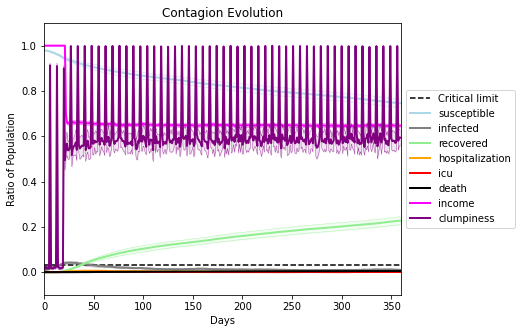

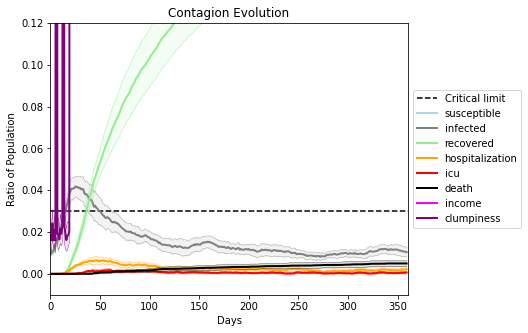

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 100
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 20,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 10, home_grid_width = 10, school_home_list = 
             [
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0)],
[(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9)],
[(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5)],
[(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
],work_home_list = 
             
[
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9),
(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5),
(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
], listeners = listeners)

Save these seeds if you want to rerun a scenario
[9931, 3610, 3161, 1295, 3748, 5239, 7181, 2642, 9076, 5932, 8384, 6869, 7050, 3027, 7919, 1635, 6398, 4963, 6535, 9661]
Average similarity between family members is 0.13797827844803445 at temperature 0
Average similarity between family and home is 0.9998618804803562 at temperature -1
Average similarity between students and their classroom is 0.18092734010102338 at temperature 0
Average classroom occupancy is 3.9130434782608696 and number classrooms is 69
Average similarity between workers is 0.1428769847892361 at temperature 0
Average office occupancy is 3.3251231527093594 and number offices is 203
Average friend similarity for adults: 0.2132994429701036 for kids: 0.2012536915215325
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 7 people.
Total of 7 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
Homogeneo

avg restaurant similarity 0.06404652351587817
avg restaurant similarity 0.08813350541183171
avg restaurant similarity 0.05498814028695073
avg restaurant similarity 0.045880237138905364
avg restaurant similarity 0.05282941855426469
avg restaurant similarity 0.034678563149107326
avg restaurant similarity 0.04719060545356083
avg restaurant similarity 0.07043067047850758
avg restaurant similarity 0.09562398017665015
avg restaurant similarity 0.07155325222845683
avg restaurant similarity 0.07745337978140975
avg restaurant similarity 0.1307146975866553
avg restaurant similarity 0.08842245948423556
avg restaurant similarity 0.05009068504090784
avg restaurant similarity 0.08475368698428987
avg restaurant similarity 0.055571811130601154
avg restaurant similarity 0.07830773600474775
avg restaurant similarity 0.044503466193369146
avg restaurant similarity 0.027732913636261215
avg restaurant similarity 0.0362043349225349
avg restaurant similarity 0.060637213026537365
avg restaurant similarity 0.06

avg restaurant similarity 0.0728675650240202
avg restaurant similarity 0.04042786112213225
avg restaurant similarity 0.08183045537798876
avg restaurant similarity 0.06082777583219986
avg restaurant similarity 0.13731643971201327
avg restaurant similarity 0.04931721321548279
avg restaurant similarity 0.03567177297265319
avg restaurant similarity 0.07476451344996561
avg restaurant similarity 0.07001233814810572
avg restaurant similarity 0.027369491810652416
avg restaurant similarity 0.06447178512372544
avg restaurant similarity 0.042521780683001824
avg restaurant similarity 0.06777892745978199
avg restaurant similarity 0.07960101245492453
avg restaurant similarity 0.058360175118050465
avg restaurant similarity 0.09525343898894456
avg restaurant similarity 0.06216745545935676
avg restaurant similarity 0.016725804368598864
avg restaurant similarity 0.07892847591213718
avg restaurant similarity 0.059285164545800226
avg restaurant similarity 0.08086674189520554
avg restaurant similarity 0.10

avg restaurant similarity 0.12005417476213792
avg restaurant similarity 0.01973876933280248
avg restaurant similarity 0.008863117451080482
avg restaurant similarity 0.08708587157628467
avg restaurant similarity 0.06880360945288441
avg restaurant similarity 0.050393079929331015
avg restaurant similarity 0.047141196110115906
avg restaurant similarity 0.0015998730980221075
avg restaurant similarity 0.030831642876033225
avg restaurant similarity 0.05809689621606386
avg restaurant similarity 0.07084507672388005
avg restaurant similarity 0.07539951881016049
avg restaurant similarity 0.09804646996745409
avg restaurant similarity 0.0452310074100886
avg restaurant similarity 0.05874617669617172
avg restaurant similarity 0.06431360233938144
avg restaurant similarity 0.01865515404958322
avg restaurant similarity 0.11803887500326986
avg restaurant similarity 0.008516125765500464
avg restaurant similarity 0.04681456097697138
avg restaurant similarity 0.03897773718768159
avg restaurant similarity 0.

avg restaurant similarity 0.06736836746647852
avg restaurant similarity 0.025202940971975757
avg restaurant similarity 0.04743124643784164
avg restaurant similarity 0.04280668004448707
avg restaurant similarity -0.017944845269409607
avg restaurant similarity 0.023276143243866076
avg restaurant similarity 0.09543752752104324
avg restaurant similarity -0.0025571189326604846
avg restaurant similarity 0.08235211272434792
avg restaurant similarity 0.059834942511692885
avg restaurant similarity 0.049823351378461625
avg restaurant similarity 0.07650092612853851
avg restaurant similarity 0.04049711087907734
avg restaurant similarity 0.029117732323915364
avg restaurant similarity 0.042107539688190726
avg restaurant similarity 0.029919048978733452
avg restaurant similarity 0.04216636792151511
avg restaurant similarity 0.03653046285000632
avg restaurant similarity 0.040389423681170065
avg restaurant similarity 0.06290636752333105
avg restaurant similarity 0.025369520501535847
avg restaurant simil

avg restaurant similarity 0.07760237774769092
avg restaurant similarity 0.04796722876892238
avg restaurant similarity 0.03809613260656882
avg restaurant similarity 0.06434798476346017
avg restaurant similarity 0.11976906084557785
avg restaurant similarity 0.046368866365578514
avg restaurant similarity -0.00425849589145537
avg restaurant similarity 0.07895937732585556
avg restaurant similarity 0.08381149764175878
avg restaurant similarity 0.07807753505933827
avg restaurant similarity 0.06925481000094298
avg restaurant similarity 0.08820188389925371
avg restaurant similarity 0.061696422975656216
avg restaurant similarity 0.05603295436828671
avg restaurant similarity 0.05260261153023736
avg restaurant similarity 0.025437569775609365
avg restaurant similarity 0.036007916549510556
avg restaurant similarity 0.04867180169319198
avg restaurant similarity 0.09936922523750959
avg restaurant similarity 0.056830145968406805
avg restaurant similarity 0.0415414349195451
avg restaurant similarity 0.0

avg restaurant similarity 0.043536585205977224
avg restaurant similarity 0.028635367672442773
avg restaurant similarity 0.08099827356359618
avg restaurant similarity 0.09637090884051254
avg restaurant similarity 0.0036728827036134302
avg restaurant similarity 0.0651744434979393
avg restaurant similarity 0.04153969570464533
avg restaurant similarity 0.06505788559785104
avg restaurant similarity 0.02552689966355968
avg restaurant similarity 0.06318084662857207
avg restaurant similarity 0.005173236531813472
avg restaurant similarity 0.09695219512789698
avg restaurant similarity 0.06161268572704092
avg restaurant similarity 0.014687092514634953
avg restaurant similarity 0.08605945684103114
avg restaurant similarity 0.0981278221808114
avg restaurant similarity 0.08387540255072247
avg restaurant similarity 0.09983857555086602
avg restaurant similarity 0.07375343102857865
avg restaurant similarity 0.029102599210828885
avg restaurant similarity 0.09401178912852765
avg restaurant similarity 0.1

avg restaurant similarity 0.05248473541811407
avg restaurant similarity 0.008236522739295298
avg restaurant similarity 0.0427910547921697
avg restaurant similarity 0.0803303636356831
avg restaurant similarity -0.014690823320912682
avg restaurant similarity 0.07824021445095501
avg restaurant similarity 0.06560945381115445
avg restaurant similarity 0.07361417221466503
avg restaurant similarity 0.02603611487180091
avg restaurant similarity 0.04896933794208869
avg restaurant similarity 0.035577583812411884
avg restaurant similarity 0.03424141100461574
avg restaurant similarity 0.03705860685221597
avg restaurant similarity 0.07180739934575943
avg restaurant similarity 0.03363979753590632
avg restaurant similarity 0.04552209509319744
avg restaurant similarity 0.03239428917341975
avg restaurant similarity 0.08024949564298607
avg restaurant similarity 0.0029472194207390114
avg restaurant similarity 0.0790615121593139
avg restaurant similarity 0.003258909582719375
avg restaurant similarity 0.03

avg restaurant similarity 0.027815694425061373
avg restaurant similarity 0.046203225577744145
avg restaurant similarity 0.005301980050859742
avg restaurant similarity 0.0302784037847819
avg restaurant similarity 0.005560648099892725
avg restaurant similarity 0.021475241511045715
avg restaurant similarity 0.055695349647356104
avg restaurant similarity 0.02672744575605078
avg restaurant similarity 0.011315174069596366
avg restaurant similarity 0.03509957565595795
avg restaurant similarity 0.022753480494827946
avg restaurant similarity 0.04808139808127983
avg restaurant similarity 0.05092862232420608
avg restaurant similarity -0.007616580425847057
avg restaurant similarity 0.028808549573651948
avg restaurant similarity 0.03141167342782164
avg restaurant similarity 0.022844858501130275
avg restaurant similarity -0.009642982498056715
avg restaurant similarity 0.031062066298050802
avg restaurant similarity 0.05528104564092228
avg restaurant similarity 0.05218795307277747
avg restaurant simil

avg restaurant similarity 0.13988638227102426
avg restaurant similarity 0.09406812533838563
avg restaurant similarity 0.07367150893255542
avg restaurant similarity 0.06381427678477768
avg restaurant similarity 0.057124014983962086
avg restaurant similarity 0.020657466233436943
avg restaurant similarity 0.06977452170740996
avg restaurant similarity 0.0743659504374502
avg restaurant similarity 0.07702485212456418
avg restaurant similarity 0.09294792479957217
avg restaurant similarity 0.07479170237157652
avg restaurant similarity 0.0706044434476203
avg restaurant similarity 0.06852560888961765
avg restaurant similarity 0.09794966572306016
avg restaurant similarity 0.06834615935207414
avg restaurant similarity 0.06474210275309245
avg restaurant similarity 0.056836745595385874
avg restaurant similarity 0.04375042587315008
avg restaurant similarity 0.08925343664345176
avg restaurant similarity 0.09013836671832418
avg restaurant similarity 0.06260532677810092
avg restaurant similarity 0.10499

avg restaurant similarity 0.07768044651145868
avg restaurant similarity 0.050573020765870565
avg restaurant similarity 0.0829631229756494
avg restaurant similarity 0.0962076848141841
avg restaurant similarity 0.058093413994371894
avg restaurant similarity 0.05470002890096654
avg restaurant similarity 0.09374504056269137
avg restaurant similarity 0.08407841961153052
avg restaurant similarity 0.09781646673228667
avg restaurant similarity 0.06914262742184041
avg restaurant similarity 0.05755531461750426
avg restaurant similarity 0.08749488926991725
avg restaurant similarity 0.1442077885070462
avg restaurant similarity 0.08197005349615617
avg restaurant similarity 0.09057139424669158
avg restaurant similarity 0.11114659561700123
avg restaurant similarity 0.07064329268665123
avg restaurant similarity 0.09141269466166302
avg restaurant similarity 0.10330031739678834
avg restaurant similarity 0.05875431961436523
avg restaurant similarity 0.10336252809542917
avg restaurant similarity 0.0884061

avg restaurant similarity 0.057418964794192326
avg restaurant similarity 0.06089315853797501
avg restaurant similarity 0.04293130604325061
avg restaurant similarity 0.06729449296610894
avg restaurant similarity 0.009720559744619746
avg restaurant similarity 0.02985020861498678
avg restaurant similarity 0.04591278236314783
avg restaurant similarity 0.055129083730576844
avg restaurant similarity 0.047877027615500216
avg restaurant similarity 0.04316300533284868
avg restaurant similarity 0.04640351149879839
avg restaurant similarity 0.04768052702525
avg restaurant similarity 0.05585543728838186
avg restaurant similarity 0.09082933166612518
avg restaurant similarity 0.02708565331240073
avg restaurant similarity -0.009582241751300891
avg restaurant similarity 0.05084755320869775
avg restaurant similarity 0.043732746500834314
avg restaurant similarity 0.08153087449113737
avg restaurant similarity 0.0770686013756663
avg restaurant similarity 0.022905738451826037
avg restaurant similarity 0.08

avg restaurant similarity 0.04355479433769272
avg restaurant similarity 0.047978252455675004
avg restaurant similarity 0.03342893374796966
avg restaurant similarity 0.019512578368453447
avg restaurant similarity 0.08829527923555212
avg restaurant similarity 0.06473732851407843
avg restaurant similarity 0.07973602972127468
avg restaurant similarity 0.01863911740715083
avg restaurant similarity 0.05875642805725263
avg restaurant similarity 0.022136066001425245
avg restaurant similarity 0.046240687128111566
avg restaurant similarity 0.06397671933005641
avg restaurant similarity 0.07639416241568885
avg restaurant similarity 0.0279814697785198
avg restaurant similarity 0.10306085430594249
avg restaurant similarity 0.05661246883427157
avg restaurant similarity 0.06668691106337928
avg restaurant similarity 0.051263064441679926
avg restaurant similarity 0.033452892487266274
avg restaurant similarity 0.03133661064942063
avg restaurant similarity 0.06065928928143091
avg restaurant similarity 0.0

avg restaurant similarity 0.062358158325315244
avg restaurant similarity 0.05785953078485074
avg restaurant similarity 0.04404799723579802
avg restaurant similarity 0.01702015643134243
avg restaurant similarity 0.06013474581442105
avg restaurant similarity 0.03519680517893272
avg restaurant similarity 0.013842643118395278
avg restaurant similarity 0.05466216774100076
avg restaurant similarity 0.04089859634586555
avg restaurant similarity 0.030208130344657646
avg restaurant similarity 0.027107652973135662
avg restaurant similarity 0.054020336311156034
avg restaurant similarity 0.029560860652550792
avg restaurant similarity 0.028177636703580068
avg restaurant similarity 0.015711650937767486
avg restaurant similarity 0.04161909925105352
avg restaurant similarity 0.07130028197680433
avg restaurant similarity 0.016240011880151974
avg restaurant similarity 0.007449426186643018
avg restaurant similarity 0.03288316519096693
avg restaurant similarity 0.012219844524318122
avg restaurant similari

avg restaurant similarity 0.022507331253828675
avg restaurant similarity 0.04244607775035116
avg restaurant similarity 0.052849751871905874
avg restaurant similarity -0.0047498982954664315
avg restaurant similarity 0.04370914225735125
avg restaurant similarity 0.020750365409369295
avg restaurant similarity 0.025564034756616383
avg restaurant similarity 0.0444515769333007
avg restaurant similarity 0.0502814579195724
avg restaurant similarity 0.051731900241836895
avg restaurant similarity 0.05602278352149617
avg restaurant similarity 0.08555038265725895
avg restaurant similarity 0.0604640244484722
avg restaurant similarity 0.039897610872245644
avg restaurant similarity 0.026319464083437907
avg restaurant similarity 0.052874610271142146
avg restaurant similarity 0.0460930155909509
avg restaurant similarity 0.008521403828604682
avg restaurant similarity 0.02255129649114979
avg restaurant similarity 0.05081166616146221
avg restaurant similarity 0.031161579712329118
avg restaurant similarity

avg restaurant similarity 0.03704198442130693
avg restaurant similarity 0.025642121656753683
avg restaurant similarity 0.04039554156510101
avg restaurant similarity 0.016331944537105823
avg restaurant similarity 0.0871630897657023
avg restaurant similarity 0.07009276615884671
avg restaurant similarity 0.03035820791072943
avg restaurant similarity 0.06438083611559141
avg restaurant similarity 0.028172991253218073
avg restaurant similarity 0.06355226158077774
avg restaurant similarity 0.01486435372089017
avg restaurant similarity 0.07126704122353132
avg restaurant similarity 0.04189548224222601
avg restaurant similarity 0.019955099502531458
avg restaurant similarity 0.0289037861993769
avg restaurant similarity 0.048108490936532064
avg restaurant similarity 0.05287790318425157
avg restaurant similarity 0.09782474296197485
avg restaurant similarity 0.0545435692235156
avg restaurant similarity 0.03602560436614269
avg restaurant similarity 0.04026274583423765
avg restaurant similarity 0.0410

avg restaurant similarity 0.04488932800998331
avg restaurant similarity 0.055559605630144906
avg restaurant similarity 0.059514829253247574
avg restaurant similarity 0.04588889911644829
avg restaurant similarity 0.02101071780217657
avg restaurant similarity 0.07362486286026577
avg restaurant similarity 0.07517891938585111
avg restaurant similarity 0.06063705765171438
avg restaurant similarity 0.042548757862843366
avg restaurant similarity 0.09463740168390784
avg restaurant similarity 0.05986547455828993
avg restaurant similarity 0.0613588105734506
avg restaurant similarity 0.04058771609524825
avg restaurant similarity 0.07550640401504718
avg restaurant similarity 0.06784639914448222
avg restaurant similarity 0.062392271683717394
avg restaurant similarity 0.03795999778125558
avg restaurant similarity 0.041933928990094745
avg restaurant similarity 0.044279347975770204
avg restaurant similarity 0.06344807813550088
avg restaurant similarity 0.027230948529873896
avg restaurant similarity 0.

avg restaurant similarity 0.05040897625896677
avg restaurant similarity 0.06927355814841935
avg restaurant similarity 0.09660815936414907
avg restaurant similarity 0.08276499416373523
avg restaurant similarity 0.0702084548694092
avg restaurant similarity 0.06128711682467665
avg restaurant similarity 0.07722131630187745
avg restaurant similarity 0.05686794780055227
avg restaurant similarity 0.08579229751237548
avg restaurant similarity 0.09085665497957243
avg restaurant similarity 0.0761595351567596
avg restaurant similarity 0.06450239031988787
avg restaurant similarity 0.04295849863512077
avg restaurant similarity 0.11555873340934171
avg restaurant similarity 0.011522884288063945
avg restaurant similarity 0.11278225430484881
avg restaurant similarity 0.028804771845781257
avg restaurant similarity 0.0665471559300795
avg restaurant similarity 0.020902105766031288
avg restaurant similarity 0.11263248245318914
avg restaurant similarity 0.029262956705919076
avg restaurant similarity 0.08059

avg restaurant similarity 0.02942175649573809
avg restaurant similarity 0.040129319562580264
avg restaurant similarity 0.02842844788206581
avg restaurant similarity 0.12019391536359086
avg restaurant similarity 0.03051667488522381
avg restaurant similarity 0.05122922906303825
avg restaurant similarity 0.13607003758351885
avg restaurant similarity 0.07081510174810227
avg restaurant similarity 0.06721669473803442
avg restaurant similarity 0.06165149171930717
avg restaurant similarity 0.024881577820846382
avg restaurant similarity 0.05808295381792491
avg restaurant similarity 0.04415300862202317
avg restaurant similarity 0.06846549219581442
avg restaurant similarity 0.016404046631300063
avg restaurant similarity 0.05675029711904691
avg restaurant similarity 0.07393047314075193
avg restaurant similarity 0.08439603697493854
avg restaurant similarity 0.04815190123638007
avg restaurant similarity 0.04077937531589805
avg restaurant similarity 0.07722653179038116
avg restaurant similarity 0.019

avg restaurant similarity 0.06327745068661998
avg restaurant similarity 0.039334083483222225
avg restaurant similarity 0.03272995920144881
avg restaurant similarity 0.005859584846522158
avg restaurant similarity 0.07355570208409407
avg restaurant similarity 0.007880637348143652
avg restaurant similarity 0.05171665582635066
avg restaurant similarity 0.06791345242931426
avg restaurant similarity 0.056705873986597086
avg restaurant similarity 0.033692605076563534
avg restaurant similarity 0.07329310365636678
avg restaurant similarity 0.05867999221591065
avg restaurant similarity 0.04872854619730289
avg restaurant similarity 0.0846709444552933
avg restaurant similarity 0.026432118420737175
avg restaurant similarity 0.055493832350324075
avg restaurant similarity 0.0004523543404499346
avg restaurant similarity 0.023742460185281988
avg restaurant similarity 0.10035938437603309
avg restaurant similarity 0.07116608417981878
avg restaurant similarity 0.05849366126135715
avg restaurant similarity

avg restaurant similarity 0.027546286826899816
avg restaurant similarity 0.0231513082800835
avg restaurant similarity 0.04137551191359714
avg restaurant similarity 0.04076406464939125
avg restaurant similarity 0.0778737341376133
avg restaurant similarity 0.10391072621560148
avg restaurant similarity 0.029945210803048055
avg restaurant similarity 0.03827304148037713
avg restaurant similarity 0.03401870007096707
avg restaurant similarity 0.1074206514497146
avg restaurant similarity 0.07547001666876704
avg restaurant similarity 0.06326628431046485
avg restaurant similarity 0.016939881728276058
avg restaurant similarity 0.12035823765455063
avg restaurant similarity 0.1181898761491778
avg restaurant similarity 0.06689173811917494
avg restaurant similarity 0.10520012412730499
avg restaurant similarity 0.011539450241465935
avg restaurant similarity 0.042044875824881374
avg restaurant similarity 0.02976049791876207
avg restaurant similarity 0.04672945889516675
avg restaurant similarity 0.04715

avg restaurant similarity 0.10733453964950349
avg restaurant similarity 0.06164751031180631
avg restaurant similarity 0.0902929847790481
avg restaurant similarity 0.06184124276825926
avg restaurant similarity 0.047271061450436434
avg restaurant similarity 0.10045800488415922
avg restaurant similarity 0.10107857023977923
avg restaurant similarity 0.10559265943345425
avg restaurant similarity 0.06411810521556066
avg restaurant similarity 0.05753840012593069
avg restaurant similarity 0.09066282343893244
avg restaurant similarity -0.01687214132407608
avg restaurant similarity 0.10191612652239562
avg restaurant similarity 0.014043089934513668
avg restaurant similarity 0.052490582201593305
avg restaurant similarity 0.08165488277344271
avg restaurant similarity 0.11018923835216324
avg restaurant similarity 0.0463831051446446
avg restaurant similarity 0.056138972594160036
avg restaurant similarity 0.06225803122099333
avg restaurant similarity 0.0359426817554951
avg restaurant similarity 0.1430

avg restaurant similarity 0.05593178772892678
avg restaurant similarity 0.0178356345115198
avg restaurant similarity 0.1119552875169499
avg restaurant similarity 0.1021333501891686
avg restaurant similarity 0.0857796131871185
avg restaurant similarity 0.11725958022156491
avg restaurant similarity 0.06736353825624936
avg restaurant similarity 0.06164994077457252
avg restaurant similarity 0.024118754377280824
avg restaurant similarity 0.07815949504209084
avg restaurant similarity 0.08100331730459587
avg restaurant similarity 0.08252832439668917
avg restaurant similarity 0.05067541850448358
avg restaurant similarity 0.10378401420182523
avg restaurant similarity 0.09290636627095633
avg restaurant similarity 0.07658381894743913
avg restaurant similarity 0.14654964526990583
avg restaurant similarity 0.1120342543099021
avg restaurant similarity 0.11091630941009786
avg restaurant similarity 0.07296857742518871
avg restaurant similarity 0.08522685191907298
avg restaurant similarity 0.0805794758

avg restaurant similarity 0.08126668022862264
avg restaurant similarity 0.04305591783072682
avg restaurant similarity 0.09586050917173371
avg restaurant similarity 0.10443228545873658
avg restaurant similarity 0.07732003730210424
avg restaurant similarity 0.0669464368058364
avg restaurant similarity 0.06784811546528698
avg restaurant similarity 0.12514847269257037
avg restaurant similarity 0.06937362316741784
avg restaurant similarity 0.0791961457680374
avg restaurant similarity 0.07105579746430617
avg restaurant similarity 0.05851925216590487
avg restaurant similarity 0.06473579636637355
avg restaurant similarity 0.08776639299011846
avg restaurant similarity 0.060888809132362186
avg restaurant similarity 0.10177685444958548
avg restaurant similarity 0.06154308298491338
avg restaurant similarity 0.048223866129196775
avg restaurant similarity 0.040086148838475465
avg restaurant similarity 0.030882119668560956
avg restaurant similarity 0.06076157247303792
avg restaurant similarity 0.0997

avg restaurant similarity 0.05719585107131532
avg restaurant similarity 0.08660723076528859
avg restaurant similarity 0.10512752515653309
avg restaurant similarity 0.08341354111297941
avg restaurant similarity 0.08302185461208492
avg restaurant similarity 0.03158042658959199
avg restaurant similarity 0.07655779872785282
avg restaurant similarity 0.08343655221125319
avg restaurant similarity 0.08414805096624313
avg restaurant similarity 0.06305983929224077
avg restaurant similarity 0.0700724485252102
avg restaurant similarity 0.07697626228231597
avg restaurant similarity 0.09054903742054912
avg restaurant similarity 0.07426645458662194
avg restaurant similarity 0.1324882827693794
avg restaurant similarity 0.11095955873145019
avg restaurant similarity 0.08730612014710866
avg restaurant similarity 0.08127172039545913
avg restaurant similarity 0.09028861647379999
avg restaurant similarity 0.05462793081988684
avg restaurant similarity 0.06988008821282152
avg restaurant similarity 0.06564955

avg restaurant similarity 0.049305974076455886
avg restaurant similarity 0.09484567339733461
avg restaurant similarity 0.12273462088741854
avg restaurant similarity 0.07106727120333275
avg restaurant similarity 0.04425785673637085
avg restaurant similarity 0.031708608329129376
avg restaurant similarity 0.07347580276423812
avg restaurant similarity 0.03567898919610145
avg restaurant similarity 0.0963608522355742
avg restaurant similarity 0.13271570597793478
avg restaurant similarity 0.059159158074746775
avg restaurant similarity 0.04132573659306256
avg restaurant similarity -0.004318020547937678
avg restaurant similarity 0.060366619068845606
avg restaurant similarity 0.058918844688601105
avg restaurant similarity 0.0874399382079577
avg restaurant similarity 0.08325361260115127
avg restaurant similarity 0.04902844973507374
avg restaurant similarity 0.08800781316812294
avg restaurant similarity 0.11548337985733767
avg restaurant similarity 0.05310401015355996
avg restaurant similarity 0.0

avg restaurant similarity 0.07102600495096444
avg restaurant similarity 0.09716609393397656
avg restaurant similarity 0.03905899000423603
avg restaurant similarity 0.048272369215441154
avg restaurant similarity 0.05943664480313071
avg restaurant similarity 0.0977147900417031
avg restaurant similarity 0.07935506845444928
avg restaurant similarity 0.051357931910097555
avg restaurant similarity 0.07849845098933596
avg restaurant similarity 0.06659752666038783
avg restaurant similarity 0.06629431885006201
avg restaurant similarity 0.07230194878431402
avg restaurant similarity 0.06132406432087721
avg restaurant similarity 0.050248605688635734
avg restaurant similarity 0.09162212304468201
avg restaurant similarity 0.06758151074707598
avg restaurant similarity 0.11151500343355454
avg restaurant similarity 0.03522543004987233
avg restaurant similarity 0.1140881480985399
avg restaurant similarity 0.08277080868974473
avg restaurant similarity 0.061865251680763116
avg restaurant similarity 0.0914

avg restaurant similarity 0.09638664237258368
avg restaurant similarity 0.05198918867622854
avg restaurant similarity 0.05150595573639835
avg restaurant similarity 0.02571546523972004
avg restaurant similarity 0.11652597565678205
avg restaurant similarity 0.10123740983860874
avg restaurant similarity 0.08737981842725207
avg restaurant similarity 0.030721537985036313
avg restaurant similarity 0.06952234026801729
avg restaurant similarity 0.048332711114170944
avg restaurant similarity 0.05594161554728406
avg restaurant similarity 0.09939971838583524
avg restaurant similarity 0.0794987240197402
avg restaurant similarity 0.07938375273398779
avg restaurant similarity 0.10789659626424122
avg restaurant similarity 0.03521307875456915
avg restaurant similarity 0.04155499944250673
avg restaurant similarity 0.09059068488736394
avg restaurant similarity 0.06917559157835004
avg restaurant similarity 0.0598949433086585
avg restaurant similarity 0.09755151525668217
avg restaurant similarity 0.046836

avg restaurant similarity 0.060822642363283545
avg restaurant similarity 0.029028802228152698
avg restaurant similarity 0.049877490162767595
avg restaurant similarity 0.06319005613766482
avg restaurant similarity 0.05908926229541672
avg restaurant similarity 0.052401485638999795
avg restaurant similarity 0.07372328685199353
avg restaurant similarity 0.05480469084391836
avg restaurant similarity 0.042299229574209
avg restaurant similarity 0.05425513986574197
avg restaurant similarity 0.07282950192111354
avg restaurant similarity 0.08184495475124931
avg restaurant similarity 0.09890836471625082
avg restaurant similarity 0.06958236266037528
avg restaurant similarity 0.03658495755849776
avg restaurant similarity 0.036004158617088285
avg restaurant similarity 0.05234799147549222
avg restaurant similarity 0.046059954183004743
avg restaurant similarity 0.04299129094542009
avg restaurant similarity 0.06964137414545495
avg restaurant similarity 0.06443065685534162
avg restaurant similarity 0.09

avg restaurant similarity 0.08193918579566295
avg restaurant similarity 0.07350303079604258
avg restaurant similarity 0.03296873806882932
avg restaurant similarity 0.040220999672304684
avg restaurant similarity 0.06952825782208615
avg restaurant similarity 0.01781264015937766
avg restaurant similarity 0.048692274353127576
avg restaurant similarity 0.10546806631374143
avg restaurant similarity 0.06437323738697764
avg restaurant similarity 0.03168157416697146
avg restaurant similarity 0.03889482363282692
avg restaurant similarity 0.0549695198148226
avg restaurant similarity 0.08914195886488556
avg restaurant similarity 0.07251092542503554
avg restaurant similarity 0.1050543272356997
avg restaurant similarity 0.07226036387122814
avg restaurant similarity 0.050749190464053996
avg restaurant similarity 0.03599542521344514
avg restaurant similarity 0.11820581200454673
avg restaurant similarity 0.035238231310276626
avg restaurant similarity 0.06151074480601303
avg restaurant similarity 0.0163

avg restaurant similarity 0.055140599745327416
avg restaurant similarity 0.0028619499253612736
avg restaurant similarity -0.004204221142198655
avg restaurant similarity 0.01066938613163674
avg restaurant similarity 0.057383857007606134
avg restaurant similarity 0.010594591836299868
avg restaurant similarity 0.11354235376047321
avg restaurant similarity 0.038184556703158797
avg restaurant similarity 0.03776971829026052
avg restaurant similarity 0.03721230185923288
avg restaurant similarity 0.02415878610583693
avg restaurant similarity 0.04042297619139618
avg restaurant similarity 0.08068900016983856
avg restaurant similarity 0.02691943021109991
avg restaurant similarity 0.051348046803803976
avg restaurant similarity 0.014808199221124606
avg restaurant similarity 0.020032695324708895
avg restaurant similarity 0.06649861372120454
avg restaurant similarity 0.07717273671971721
avg restaurant similarity 0.08086892130550359
avg restaurant similarity 0.05852705082660707
avg restaurant similari

avg restaurant similarity 0.04338300582255349
avg restaurant similarity 0.060375629319057066
avg restaurant similarity 0.03869494060074257
avg restaurant similarity 0.050856519903022444
avg restaurant similarity 0.05726347757127595
avg restaurant similarity 0.04715814851010791
avg restaurant similarity 0.09427844004078399
avg restaurant similarity 0.04706884566333851
avg restaurant similarity 0.06306824402469498
avg restaurant similarity 0.07212641191543506
avg restaurant similarity 0.002067175591550767
avg restaurant similarity 0.095565197341818
avg restaurant similarity 0.030547194879303144
avg restaurant similarity 0.030152829365337232
avg restaurant similarity 0.0658910881005284
avg restaurant similarity 0.060761023663332955
avg restaurant similarity 0.02592643348588423
avg restaurant similarity 0.03270315708332737
avg restaurant similarity 0.05364162936435571
avg restaurant similarity 0.022346257406211656
avg restaurant similarity 0.08142814748865405
avg restaurant similarity 0.04

avg restaurant similarity 0.06003322978594013
avg restaurant similarity 0.0006472876390503355
avg restaurant similarity 0.061330633952330516
avg restaurant similarity 0.0403268446622403
avg restaurant similarity 0.05481081220422973
avg restaurant similarity 0.06485741562229067
avg restaurant similarity 0.042431422069916354
avg restaurant similarity 0.04819242100667974
avg restaurant similarity 0.01431037981159738
avg restaurant similarity 0.030980635587182278
avg restaurant similarity 0.06387939092867781
avg restaurant similarity -0.03073949650151396
avg restaurant similarity 0.03967999126215447
avg restaurant similarity 0.05294156393839864
avg restaurant similarity 0.03560846295291782
avg restaurant similarity 0.05990138882876514
avg restaurant similarity 0.06372891181204543
avg restaurant similarity 0.05345125393677716
avg restaurant similarity 0.029140104127624297
avg restaurant similarity 0.023096786758490008
avg restaurant similarity 0.036968154945129963
avg restaurant similarity 

avg restaurant similarity 0.10954243722443711
avg restaurant similarity 0.07104867138784782
avg restaurant similarity 0.06887642082297352
avg restaurant similarity 0.05865343717032299
avg restaurant similarity 0.08536971770223557
avg restaurant similarity 0.071832810649139
avg restaurant similarity 0.05361124576799941
avg restaurant similarity 0.04787273207378084
avg restaurant similarity 0.06360248727292725
avg restaurant similarity 0.10410333329201743
avg restaurant similarity 0.054871008224144736
avg restaurant similarity 0.07018932774811537
avg restaurant similarity 0.04088209382106242
avg restaurant similarity 0.041439744829438914
avg restaurant similarity 0.0866416754191048
avg restaurant similarity 0.1252491068870991
avg restaurant similarity 0.041565065561807495
avg restaurant similarity 0.04084920305248854
avg restaurant similarity 0.025875684008080362
avg restaurant similarity 0.07159495146052598
avg restaurant similarity 0.07346840628291726
avg restaurant similarity 0.062459

avg restaurant similarity 0.09085523276789806
avg restaurant similarity 0.06231128099669059
avg restaurant similarity 0.08736818392080924
avg restaurant similarity 0.07522269711709748
avg restaurant similarity 0.08547807651539391
avg restaurant similarity 0.05083086750109599
avg restaurant similarity 0.06895399137699817
avg restaurant similarity 0.010230172199782858
avg restaurant similarity 0.061065766189632255
avg restaurant similarity 0.009802384429913633
avg restaurant similarity 0.06012475499168366
avg restaurant similarity 0.06993178260616217
avg restaurant similarity 0.04412456388533447
avg restaurant similarity 0.04496557373332487
avg restaurant similarity 0.04280438123411042
avg restaurant similarity 0.08755054261099679
avg restaurant similarity 0.08147379675118253
avg restaurant similarity 0.0516833662251379
avg restaurant similarity 0.0768315867362391
avg restaurant similarity 0.026544065779091727
avg restaurant similarity 0.09801372943457476
avg restaurant similarity 0.0249

avg restaurant similarity 0.025050615106878324
avg restaurant similarity 0.05808669664831568
avg restaurant similarity 0.06693537116221925
avg restaurant similarity 0.02669371664431827
avg restaurant similarity 0.04853201313652097
avg restaurant similarity 0.08142117887524389
avg restaurant similarity 0.038157163254752435
avg restaurant similarity 0.032355191925330755
avg restaurant similarity 0.05872355424199347
avg restaurant similarity 0.055918360954093506
avg restaurant similarity 0.04917720350750814
avg restaurant similarity 0.04327137993224997
avg restaurant similarity 0.034032916118335706
avg restaurant similarity 0.07772852252508218
avg restaurant similarity 0.0813098852154957
avg restaurant similarity 0.04812639427245624
avg restaurant similarity 0.032613470238815
avg restaurant similarity 0.017938643642651714
avg restaurant similarity 0.018156971496799332
avg restaurant similarity 0.038511696821052814
avg restaurant similarity 0.08027337186861797
avg restaurant similarity 0.0

avg restaurant similarity 0.05846318159349538
avg restaurant similarity 0.038235294333017616
avg restaurant similarity 0.06488375128810439
avg restaurant similarity 0.0004602013519429736
avg restaurant similarity 0.0806863051429406
avg restaurant similarity 0.012556018517170631
avg restaurant similarity 0.05223495556281885
avg restaurant similarity 0.006814835773943648
avg restaurant similarity 0.039724556045920636
avg restaurant similarity 0.045131690906733156
avg restaurant similarity 0.021609931790669973
avg restaurant similarity 0.046922770150421504
avg restaurant similarity 0.06842162464003118
avg restaurant similarity -0.008389511127089362
avg restaurant similarity 0.07300099490185685
avg restaurant similarity 0.039303499370756105
avg restaurant similarity 0.07336018280972935
avg restaurant similarity 0.06204816278910508
avg restaurant similarity 0.03866764025467486
avg restaurant similarity 0.07339871961511497
avg restaurant similarity 0.028863646151448676
avg restaurant similar

avg restaurant similarity 0.026250075608956015
avg restaurant similarity 0.07174545203832525
avg restaurant similarity 0.05768157423028838
avg restaurant similarity 0.03422407358833199
avg restaurant similarity 0.037407801718091584
avg restaurant similarity 0.044143960056069936
avg restaurant similarity 0.06461278120614421
avg restaurant similarity 0.025583129397067094
avg restaurant similarity 0.057178221815485444
avg restaurant similarity 0.07866631168569013
avg restaurant similarity 0.06747033145957765
avg restaurant similarity 0.07728184858585739
avg restaurant similarity 0.06151400308128408
avg restaurant similarity 0.0036817052177945684
avg restaurant similarity 0.02538442753704396
avg restaurant similarity 0.09917847199023441
avg restaurant similarity 0.09240326943819281
avg restaurant similarity 0.02717865721926903
avg restaurant similarity 0.023182171384397966
avg restaurant similarity 0.037972399079557885
avg restaurant similarity 0.05372019669750999
avg restaurant similarity

avg restaurant similarity 0.052129736962437
avg restaurant similarity 0.09050290281583877
avg restaurant similarity 0.0267485491652093
avg restaurant similarity 0.03573049869511588
avg restaurant similarity 0.04531934446977555
avg restaurant similarity 0.098671927110186
avg restaurant similarity 0.03310386758100541
avg restaurant similarity 0.05982169032548451
avg restaurant similarity 0.0606896221270169
avg restaurant similarity 0.04509471785946071
avg restaurant similarity 0.027827987909456606
avg restaurant similarity 0.08037054425296031
avg restaurant similarity 0.03385127387190409
avg restaurant similarity 0.09758273892370624
avg restaurant similarity 0.06413236889710222
avg restaurant similarity 0.013556349153038976
avg restaurant similarity 0.06015300091872408
avg restaurant similarity 0.051790177718195815
avg restaurant similarity 0.027251761884710027
avg restaurant similarity 0.08206434856862625
avg restaurant similarity 0.04656789153897635
avg restaurant similarity 0.05910433

avg restaurant similarity 0.07352445030655232
avg restaurant similarity 0.030110541488616915
avg restaurant similarity 0.10796855200845024
avg restaurant similarity 0.10847601112193936
avg restaurant similarity 0.1031853271089079
avg restaurant similarity 0.12477373547698202
avg restaurant similarity 0.11498412789660281
avg restaurant similarity 0.11115420952368914
avg restaurant similarity 0.09247178459860701
avg restaurant similarity 0.06400161246242961
avg restaurant similarity 0.020108763005821984
avg restaurant similarity 0.11286924837355647
avg restaurant similarity 0.029473715915040884
avg restaurant similarity 0.1243623404430144
avg restaurant similarity 0.08908199800798704
avg restaurant similarity 0.08354465349862213
avg restaurant similarity 0.06257368185868528
avg restaurant similarity 0.054288348196778566
avg restaurant similarity 0.08811325082770154
avg restaurant similarity 0.07876389274560099
avg restaurant similarity 0.0706325046509959
avg restaurant similarity 0.11474

avg restaurant similarity 0.05738244859364398
avg restaurant similarity 0.05310717782348514
avg restaurant similarity 0.11696153504060287
avg restaurant similarity 0.054789861392280585
avg restaurant similarity 0.10446999343059557
avg restaurant similarity 0.15006126726953947
avg restaurant similarity 0.12727521382111878
avg restaurant similarity 0.09246653704014744
avg restaurant similarity 0.1213261504655801
avg restaurant similarity 0.043528819874577296
avg restaurant similarity 0.09208480998635342
avg restaurant similarity 0.06421871759955132
avg restaurant similarity 0.048090302253715904
avg restaurant similarity 0.05146161116035322
avg restaurant similarity 0.03927632272025713
avg restaurant similarity 0.08003381707077807
avg restaurant similarity 0.09406302966061399
avg restaurant similarity 0.045596276598509344
avg restaurant similarity 0.11619643018983938
avg restaurant similarity 0.052841576750944245
avg restaurant similarity 0.06974861658585767
avg restaurant similarity 0.08

(<function dict.items>, <function dict.items>, <function dict.items>)

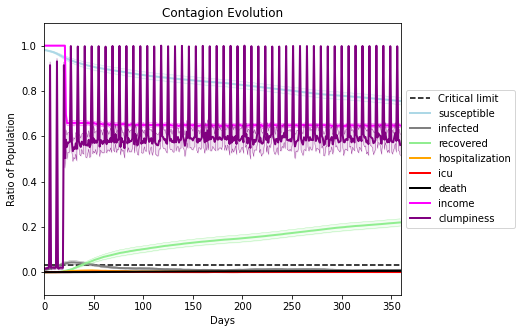

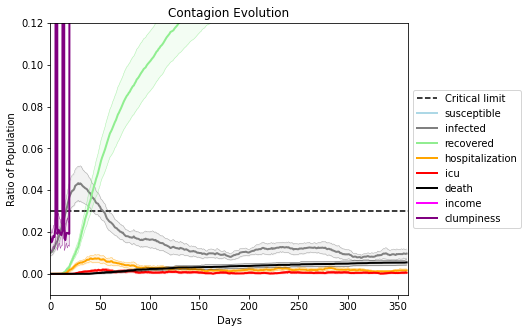

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 0
params.params['num_communities'] = 100
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 20,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 10, home_grid_width = 10, school_home_list = 
              [
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0)],
[(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9)],
[(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5)],
[(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
],work_home_list = 
             
[
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9),
(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5),
(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
], listeners = listeners)

Save these seeds if you want to rerun a scenario
[6433, 6273, 3939, 6944, 1406, 2635, 9652, 1845, 4851, 2027, 5542, 1025, 7471, 8410, 9256, 3480, 9480, 4951, 1526, 292]
Average similarity between family members is 0.4518038196310927 at temperature -0.9
Average similarity between family and home is 0.9998541643085486 at temperature -1
Average similarity between students and their classroom is 0.17091735344174816 at temperature -0.9
Average classroom occupancy is 4.492753623188406 and number classrooms is 69
Average similarity between workers is 0.2982553025592013 at temperature -0.9
Average office occupancy is 3.241206030150754 and number offices is 199
Average friend similarity for adults: 0.5050430968403989 for kids: 0.3717649948477429
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 4 allocated units with a total of 10 people.
Total of 10 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
Ho

avg restaurant similarity 0.07416922246891325
avg restaurant similarity 0.044145403577900116
avg restaurant similarity 0.09820757407225976
avg restaurant similarity 0.08883001718215609
avg restaurant similarity 0.12720604893552298
avg restaurant similarity 0.04178398077516829
avg restaurant similarity 0.02558135926458314
avg restaurant similarity 0.029322502821654828
avg restaurant similarity 0.07532822326583447
avg restaurant similarity 0.07400072854626605
avg restaurant similarity 0.08451826679533017
avg restaurant similarity 0.11295044718868552
avg restaurant similarity 0.07317430122467433
avg restaurant similarity 0.05955290279463915
avg restaurant similarity 0.1189751849433936
avg restaurant similarity 0.08848314814963411
avg restaurant similarity 0.06875535014290594
avg restaurant similarity 0.043907323829967905
avg restaurant similarity 0.12163756881195582
avg restaurant similarity 0.09500123418232892
avg restaurant similarity 0.054399011251050164
avg restaurant similarity 0.076

avg restaurant similarity 0.04518237219089225
avg restaurant similarity 0.04834700597409777
avg restaurant similarity 0.05902555340184665
avg restaurant similarity 0.03624913181406878
avg restaurant similarity 0.028742069645541247
avg restaurant similarity 0.08277506356114321
avg restaurant similarity 0.05152646124940164
avg restaurant similarity 0.012065164231733747
avg restaurant similarity 0.03555024670490064
avg restaurant similarity 0.08477231189423524
avg restaurant similarity 0.10219391126737326
avg restaurant similarity 0.06816649140308445
avg restaurant similarity 0.1252962249074733
avg restaurant similarity 0.07293274880976346
avg restaurant similarity 0.05455220334871057
avg restaurant similarity 0.028211752529171394
avg restaurant similarity 0.0737537451947494
avg restaurant similarity -0.007807125191437404
avg restaurant similarity 0.03207884164595319
avg restaurant similarity 0.06567877046410307
avg restaurant similarity 0.09745607676602047
avg restaurant similarity 0.067

avg restaurant similarity 0.15424823692570586
avg restaurant similarity 0.08598239448515226
avg restaurant similarity 0.1374694509609456
avg restaurant similarity 0.1364401565475043
avg restaurant similarity 0.17354461568946394
avg restaurant similarity 0.17952775177807262
avg restaurant similarity 0.04276620277953437
avg restaurant similarity 0.06119601137997551
avg restaurant similarity 0.059457074359979364
avg restaurant similarity 0.140161411338241
avg restaurant similarity 0.08878390559951967
avg restaurant similarity 0.15965875893904058
avg restaurant similarity 0.0831166853684645
avg restaurant similarity 0.0925825844232859
avg restaurant similarity 0.055194045033087544
avg restaurant similarity 0.11585963056783145
avg restaurant similarity 0.06480841388880564
avg restaurant similarity 0.07820529474587563
avg restaurant similarity 0.1060715924496705
avg restaurant similarity 0.09113982499176124
avg restaurant similarity 0.05532287393890441
avg restaurant similarity 0.08249092430

avg restaurant similarity 0.15852523734709514
avg restaurant similarity 0.055132341941782216
avg restaurant similarity 0.1012630652009222
avg restaurant similarity 0.17644386129704603
avg restaurant similarity 0.08516762217494162
avg restaurant similarity 0.02869678660385196
avg restaurant similarity 0.10532284031975003
avg restaurant similarity 0.11052652025275778
avg restaurant similarity 0.1312131817350607
avg restaurant similarity 0.06306054647761362
avg restaurant similarity 0.06526216744765184
avg restaurant similarity 0.14884774696202666
avg restaurant similarity 0.10567266730621601
avg restaurant similarity 0.07182497071922567
avg restaurant similarity 0.06594436979661145
avg restaurant similarity 0.09202386312295636
avg restaurant similarity 0.11957033523511505
avg restaurant similarity 0.06337254999877374
avg restaurant similarity 0.12215186502566965
avg restaurant similarity 0.0716426098356284
avg restaurant similarity 0.07816196605635697
avg restaurant similarity 0.08139526

avg restaurant similarity 0.08892791447097192
avg restaurant similarity 0.07480895804703845
avg restaurant similarity 0.030248831671085535
avg restaurant similarity 0.06432407172889076
avg restaurant similarity 0.09533731678607141
avg restaurant similarity 0.07375786031155891
avg restaurant similarity 0.061334828152358425
avg restaurant similarity 0.08389539870160366
avg restaurant similarity 0.06193304397467843
avg restaurant similarity 0.09145849558917142
avg restaurant similarity 0.05364837430846678
avg restaurant similarity 0.09662927038997252
avg restaurant similarity 0.05694534965084427
avg restaurant similarity 0.0874149448003149
avg restaurant similarity 0.03487229625265145
avg restaurant similarity 0.09197698619788902
avg restaurant similarity 0.07917061572456205
avg restaurant similarity 0.08613563514153666
avg restaurant similarity 0.09991566758455533
avg restaurant similarity 0.058668156137611
avg restaurant similarity 0.07644829465259993
avg restaurant similarity 0.1299816

avg restaurant similarity 0.09387405746793241
avg restaurant similarity 0.10224204580311999
avg restaurant similarity 0.08257810401046539
avg restaurant similarity 0.06875095037986474
avg restaurant similarity 0.0648657256643308
avg restaurant similarity 0.11484909304131063
avg restaurant similarity 0.08493311240053643
avg restaurant similarity 0.0964190303292177
avg restaurant similarity 0.04602172348042969
avg restaurant similarity 0.047507480180338436
avg restaurant similarity 0.01664227233260122
avg restaurant similarity 0.047526009039452206
avg restaurant similarity 0.09957512381437486
avg restaurant similarity 0.03827512741118952
avg restaurant similarity 0.10151722473553274
avg restaurant similarity 0.07768561662360007
avg restaurant similarity 0.07439701925156855
avg restaurant similarity 0.04868822411941423
avg restaurant similarity 0.08095460557527875
avg restaurant similarity 0.08980298843235149
avg restaurant similarity 0.11589441385952425
avg restaurant similarity 0.043167

avg restaurant similarity 0.11637390118889077
avg restaurant similarity 0.06044752233879735
avg restaurant similarity 0.10985287124821297
avg restaurant similarity 0.10996256684957244
avg restaurant similarity 0.0995071778177331
avg restaurant similarity 0.07214642240069359
avg restaurant similarity 0.0834421063244598
avg restaurant similarity 0.09903817262791041
avg restaurant similarity 0.07327511476480847
avg restaurant similarity 0.10405983371901234
avg restaurant similarity 0.10797912655684341
avg restaurant similarity 0.009455298487097776
avg restaurant similarity 0.09997127926804834
avg restaurant similarity 0.1699312161145045
avg restaurant similarity 0.05500002141581765
avg restaurant similarity 0.10398909803648682
avg restaurant similarity 0.10816573620940424
avg restaurant similarity 0.12546724436980458
avg restaurant similarity 0.07975959589405028
avg restaurant similarity 0.10748021741029523
avg restaurant similarity 0.12132827446475818
avg restaurant similarity 0.05169688

avg restaurant similarity 0.08309544201118244
avg restaurant similarity 0.1521447612702688
avg restaurant similarity 0.1469559369971189
avg restaurant similarity 0.11473660829085447
avg restaurant similarity 0.11610739228934772
avg restaurant similarity 0.12128850259818336
avg restaurant similarity 0.08486762451197237
avg restaurant similarity 0.06587813458857476
avg restaurant similarity 0.05685260919301812
avg restaurant similarity 0.09672021093649338
avg restaurant similarity 0.1568065973380767
avg restaurant similarity 0.10023239799462376
avg restaurant similarity 0.06722992198903364
avg restaurant similarity 0.13982150843933966
avg restaurant similarity 0.10954885303828049
avg restaurant similarity 0.14100967802471318
avg restaurant similarity 0.07439156356658481
avg restaurant similarity 0.11614538986498321
avg restaurant similarity 0.1311845259755897
avg restaurant similarity 0.11381108179323153
avg restaurant similarity 0.12264429099377164
avg restaurant similarity 0.1696785477

avg restaurant similarity 0.1725413757021189
avg restaurant similarity 0.0661410338553209
avg restaurant similarity 0.09111855614165018
avg restaurant similarity 0.062140387545547474
avg restaurant similarity 0.08564620097329399
avg restaurant similarity 0.0797009395579962
avg restaurant similarity 0.05753390687181887
avg restaurant similarity 0.019286299854080074
avg restaurant similarity 0.08052459978866483
avg restaurant similarity 0.09406151029580372
avg restaurant similarity 0.08365499113522713
avg restaurant similarity 0.058543560399839885
avg restaurant similarity 0.06731063628999513
avg restaurant similarity 0.02703178296252401
avg restaurant similarity 0.0920643580131552
avg restaurant similarity 0.012895222182690276
avg restaurant similarity 0.08854171945623338
avg restaurant similarity 0.09163910300810549
avg restaurant similarity 0.09378292605053003
avg restaurant similarity 0.053324178021596
avg restaurant similarity 0.12946330720985122
avg restaurant similarity 0.08153313

avg restaurant similarity 0.06948967369097389
avg restaurant similarity 0.07165059281393106
avg restaurant similarity 0.07575523018143018
avg restaurant similarity 0.05273090271998816
avg restaurant similarity 0.07400213015346166
avg restaurant similarity 0.08003881118489127
avg restaurant similarity 0.09333379712989522
avg restaurant similarity 0.10033074026403256
avg restaurant similarity 0.18050678548666296
avg restaurant similarity 0.07548645952125843
avg restaurant similarity 0.12223242544063984
avg restaurant similarity 0.07070897530274929
avg restaurant similarity 0.10854113209183029
avg restaurant similarity 0.13414363350844763
avg restaurant similarity 0.09903920620421053
avg restaurant similarity 0.11607897807985615
avg restaurant similarity 0.06415788501757264
avg restaurant similarity 0.12441013979084144
avg restaurant similarity 0.0800858862375709
avg restaurant similarity 0.08939667119938814
avg restaurant similarity 0.11210337231710332
avg restaurant similarity 0.0743421

avg restaurant similarity 0.05039877714039189
avg restaurant similarity 0.17195559796705917
avg restaurant similarity 0.14071465937519193
avg restaurant similarity 0.09958932682422236
avg restaurant similarity 0.18575871756354637
avg restaurant similarity 0.17260199794726921
avg restaurant similarity 0.04750438962961392
avg restaurant similarity 0.12379842669567419
avg restaurant similarity 0.06323927774074348
avg restaurant similarity 0.09347367777581159
avg restaurant similarity 0.0724567899376097
avg restaurant similarity 0.05273329858907278
avg restaurant similarity 0.11005041811626572
avg restaurant similarity 0.19461595368583934
avg restaurant similarity 0.0965588484957397
avg restaurant similarity 0.12693119014689533
avg restaurant similarity 0.06676982128570311
avg restaurant similarity 0.16006907217568112
avg restaurant similarity 0.04066510970960541
avg restaurant similarity 0.08401819429769918
avg restaurant similarity 0.10698630113262354
avg restaurant similarity 0.17009458

avg restaurant similarity 0.07377234178897527
avg restaurant similarity 0.061991780096880764
avg restaurant similarity 0.0638326907280698
avg restaurant similarity 0.21445702709496248
avg restaurant similarity 0.07875829397109645
avg restaurant similarity 0.08616090899612118
avg restaurant similarity 0.14545217893241733
avg restaurant similarity 0.08064699269615348
avg restaurant similarity 0.12357080510897217
avg restaurant similarity -0.01646242945881279
avg restaurant similarity 0.0058341121600572025
avg restaurant similarity 0.03483170337030532
avg restaurant similarity 0.12824365753354183
avg restaurant similarity 0.008040978866547682
avg restaurant similarity 0.03727395374186404
avg restaurant similarity 0.05974306447167132
avg restaurant similarity 0.09161072736280278
avg restaurant similarity 0.13880803453027096
avg restaurant similarity 0.09230890102576411
avg restaurant similarity 0.13235664980362913
avg restaurant similarity 0.05662393851957799
avg restaurant similarity 0.02

avg restaurant similarity 0.09389786019660691
avg restaurant similarity 0.10488706006191528
avg restaurant similarity 0.11649520559610768
avg restaurant similarity 0.08246680434099393
avg restaurant similarity 0.07184612203263141
avg restaurant similarity 0.09456370533199186
avg restaurant similarity 0.0895826555013211
avg restaurant similarity 0.06911642690693916
avg restaurant similarity 0.05267881088203093
avg restaurant similarity 0.073722273755052
avg restaurant similarity 0.12355207051535827
avg restaurant similarity 0.10737545588112367
avg restaurant similarity 0.10338117804643958
avg restaurant similarity 0.07541719341090786
avg restaurant similarity 0.18320065096489233
avg restaurant similarity 0.12996206167375715
avg restaurant similarity 0.14216883132826597
avg restaurant similarity 0.12161053412065544
avg restaurant similarity 0.08811262247970682
avg restaurant similarity 0.11322763065269915
avg restaurant similarity 0.08356591471946119
avg restaurant similarity 0.091941812

avg restaurant similarity 0.06823934628151895
avg restaurant similarity 0.0772888601917823
avg restaurant similarity 0.10618366089331753
avg restaurant similarity 0.06053706149923441
avg restaurant similarity 0.03531370555764152
avg restaurant similarity 0.1255030573848801
avg restaurant similarity 0.05800692355363421
avg restaurant similarity 0.06633420658538432
avg restaurant similarity 0.03459523025028113
avg restaurant similarity 0.04030774640997951
avg restaurant similarity 0.043534040329921184
avg restaurant similarity 0.09299166702835254
avg restaurant similarity 0.11663090763868562
avg restaurant similarity 0.12105252714134102
avg restaurant similarity 0.10552552920602393
avg restaurant similarity 0.13684908193494646
avg restaurant similarity 0.12113013381647739
avg restaurant similarity 0.05212185781930152
avg restaurant similarity 0.10481469694655199
avg restaurant similarity 0.09245814199212626
avg restaurant similarity 0.08019486807590938
avg restaurant similarity 0.0676241

avg restaurant similarity 0.061267003654353586
avg restaurant similarity 0.08347983117936582
avg restaurant similarity 0.07232390834902876
avg restaurant similarity 0.09582427774890846
avg restaurant similarity 0.06126016324790092
avg restaurant similarity 0.07765113750431611
avg restaurant similarity 0.1533533884965588
avg restaurant similarity 0.12698661632093503
avg restaurant similarity 0.09640058848201964
avg restaurant similarity 0.08434288774871522
avg restaurant similarity 0.08413716640005138
avg restaurant similarity 0.07742476999903312
avg restaurant similarity 0.06401736510789101
avg restaurant similarity 0.07953473440218511
avg restaurant similarity 0.04830326764819015
avg restaurant similarity 0.07754803554507685
avg restaurant similarity 0.08794363119972053
avg restaurant similarity 0.09997129127585791
avg restaurant similarity 0.07789692588702195
avg restaurant similarity 0.1350718423878207
avg restaurant similarity 0.09422906020031507
avg restaurant similarity 0.1093881

avg restaurant similarity 0.08603943597216192
avg restaurant similarity 0.10004193878262438
avg restaurant similarity 0.07031557218304657
avg restaurant similarity 0.06487566903960844
avg restaurant similarity 0.13928147724804807
avg restaurant similarity 0.0764669924012946
avg restaurant similarity 0.07869814976054891
avg restaurant similarity 0.09964931986842146
avg restaurant similarity 0.09406286716389915
avg restaurant similarity 0.12639284437054657
avg restaurant similarity 0.09736311088975177
avg restaurant similarity 0.08795094496887752
avg restaurant similarity 0.11434762792205905
avg restaurant similarity 0.0979922103506874
avg restaurant similarity 0.11889515659396929
avg restaurant similarity 0.12571313016929575
avg restaurant similarity 0.09429138924836648
avg restaurant similarity 0.10893552448180008
avg restaurant similarity 0.08926894057860954
avg restaurant similarity 0.08938281256708157
avg restaurant similarity 0.08770335283081895
avg restaurant similarity 0.06021239

avg restaurant similarity 0.014835269661393218
avg restaurant similarity 0.050769539393033185
avg restaurant similarity 0.01692468451803297
avg restaurant similarity 0.12797101481039963
avg restaurant similarity 0.10866730963394314
avg restaurant similarity 0.06829168310266234
avg restaurant similarity 0.07904722906852547
avg restaurant similarity 0.027253209865867923
avg restaurant similarity 0.1380710792747547
avg restaurant similarity 0.0855787702005888
avg restaurant similarity 0.08868683418902597
avg restaurant similarity 0.07153898886013316
avg restaurant similarity 0.12485095324306944
avg restaurant similarity 0.03011467505037009
avg restaurant similarity 0.07286583448297793
avg restaurant similarity 0.0670186312535976
avg restaurant similarity 0.08927157684917983
avg restaurant similarity 0.052963245722861256
avg restaurant similarity 0.09342466426886963
avg restaurant similarity 0.0608730932910751
avg restaurant similarity 0.14100550786151078
avg restaurant similarity 0.072756

avg restaurant similarity 0.061275556845048255
avg restaurant similarity 0.07669505911394324
avg restaurant similarity 0.10278050639650223
avg restaurant similarity 0.11256675933327182
avg restaurant similarity 0.09989185067312518
avg restaurant similarity 0.13796763252130376
avg restaurant similarity 0.0701712726861259
avg restaurant similarity 0.1016447403831974
avg restaurant similarity 0.10310456652625807
avg restaurant similarity 0.05308559622285121
avg restaurant similarity 0.11235674077318121
avg restaurant similarity 0.07507085363135228
avg restaurant similarity 0.11599674469711477
avg restaurant similarity 0.06652717530802836
avg restaurant similarity 0.04595506730130258
avg restaurant similarity 0.10057926034852135
avg restaurant similarity 0.09678340976525716
avg restaurant similarity 0.07071653476833492
avg restaurant similarity 0.10033273846525537
avg restaurant similarity 0.025070908627260066
avg restaurant similarity 0.06577037627212674
avg restaurant similarity 0.090278

avg restaurant similarity 0.09375289762960766
avg restaurant similarity 0.07782070396046507
avg restaurant similarity 0.03383455840466865
avg restaurant similarity 0.09764458627183781
avg restaurant similarity 0.03048490142086858
avg restaurant similarity 0.15201644139675022
avg restaurant similarity 0.08939635430222484
avg restaurant similarity 0.07373956012606862
avg restaurant similarity 0.07602939443433843
avg restaurant similarity 0.05513874850619566
avg restaurant similarity 0.055144336960229946
avg restaurant similarity 0.0692799869154409
avg restaurant similarity 0.08631423343843439
avg restaurant similarity 0.05971276598790679
avg restaurant similarity 0.07948887635412216
avg restaurant similarity 0.0591375467292792
avg restaurant similarity 0.058402728800721844
avg restaurant similarity 0.055233954977392044
avg restaurant similarity 0.11637801134364646
avg restaurant similarity 0.06177335151842068
avg restaurant similarity 0.07425480904286363
avg restaurant similarity 0.13917

avg restaurant similarity 0.0782485476627287
avg restaurant similarity 0.08762697359439568
avg restaurant similarity 0.09998971371520525
avg restaurant similarity 0.03992403787100404
avg restaurant similarity 0.04917772170292661
avg restaurant similarity 0.1323924038037638
avg restaurant similarity 0.1022463530053782
avg restaurant similarity 0.13910125399095824
avg restaurant similarity 0.12274381899792484
avg restaurant similarity 0.09472068386581417
avg restaurant similarity 0.10241970796258146
avg restaurant similarity 0.1219534663533313
avg restaurant similarity 0.15907922095923321
avg restaurant similarity 0.08020154799412427
avg restaurant similarity 0.027180077914981216
avg restaurant similarity 0.11330332762275636
avg restaurant similarity 0.07297491823687535
avg restaurant similarity 0.027961551837742824
avg restaurant similarity 0.041930537019559774
avg restaurant similarity 0.08454725033906642
avg restaurant similarity 0.0628967783125627
avg restaurant similarity 0.08217124

avg restaurant similarity 0.06321747870117857
avg restaurant similarity 0.11286460533044236
avg restaurant similarity 0.04191484325336407
avg restaurant similarity 0.09764824192913624
avg restaurant similarity 0.1786199029241079
avg restaurant similarity 0.1329653997758732
avg restaurant similarity 0.11391771752997319
avg restaurant similarity 0.04513816272825153
avg restaurant similarity 0.11241902559871178
avg restaurant similarity 0.04052888888787299
avg restaurant similarity 0.051629905364647594
avg restaurant similarity 0.08639247515301227
avg restaurant similarity 0.1526146000893838
avg restaurant similarity 0.17056433232546162
avg restaurant similarity 0.11124214637877619
avg restaurant similarity 0.11343388323165192
avg restaurant similarity 0.10800826291785742
avg restaurant similarity 0.11914122181479002
avg restaurant similarity 0.14963953241123548
avg restaurant similarity 0.081420922424146
avg restaurant similarity 0.06269914537018696
avg restaurant similarity 0.0874199884

avg restaurant similarity 0.0593828391236595
avg restaurant similarity 0.07711824919502154
avg restaurant similarity 0.13153663699275972
avg restaurant similarity 0.14489186573441462
avg restaurant similarity 0.1144409312431535
avg restaurant similarity 0.05894516543950503
avg restaurant similarity 0.11336385968123303
avg restaurant similarity 0.04553331474929641
avg restaurant similarity 0.08282760413612487
avg restaurant similarity 0.06874364090396272
avg restaurant similarity 0.1080368163353006
avg restaurant similarity 0.08579398251912103
avg restaurant similarity 0.051287164510675685
avg restaurant similarity 0.16779518201933677
avg restaurant similarity 0.19711166438941546
avg restaurant similarity 0.09375702077795109
avg restaurant similarity 0.14348437569477845
avg restaurant similarity 0.018913888372891322
avg restaurant similarity 0.12460145238706151
avg restaurant similarity 0.09359258497040848
avg restaurant similarity 0.0948712006953605
avg restaurant similarity 0.08621428

avg restaurant similarity 0.061934990717230735
avg restaurant similarity 0.07064604816755235
avg restaurant similarity 0.07849270822821305
avg restaurant similarity 0.06732920435959454
avg restaurant similarity 0.06265091454790817
avg restaurant similarity 0.12055505601344865
avg restaurant similarity 0.09577029853687932
avg restaurant similarity 0.07752723506629919
avg restaurant similarity 0.09658136169024495
avg restaurant similarity 0.09842967115247929
avg restaurant similarity 0.15966355587881398
avg restaurant similarity 0.07710102376021781
avg restaurant similarity 0.02350037762958692
avg restaurant similarity 0.10963857880011002
avg restaurant similarity 0.10588202124277267
avg restaurant similarity 0.04238695153971322
avg restaurant similarity 0.14292066713210955
avg restaurant similarity 0.06567020571618698
avg restaurant similarity 0.09513382896313478
avg restaurant similarity 0.1259994673427443
avg restaurant similarity 0.09718376519412761
avg restaurant similarity 0.048515

avg restaurant similarity 0.07335411814529379
avg restaurant similarity 0.05206836215694411
avg restaurant similarity 0.06470913604646107
avg restaurant similarity 0.058139985940829406
avg restaurant similarity 0.09767694332080017
avg restaurant similarity 0.12327485633893703
avg restaurant similarity 0.06268756225841608
avg restaurant similarity 0.11764296813738306
avg restaurant similarity 0.11980755322297018
avg restaurant similarity 0.09983108444497975
avg restaurant similarity 0.07765134623821261
avg restaurant similarity 0.06355238859901552
avg restaurant similarity 0.10244007796447617
avg restaurant similarity 0.1091362878957029
avg restaurant similarity 0.04526902999207012
avg restaurant similarity 0.08927575625832775
avg restaurant similarity 0.04314018913887324
avg restaurant similarity 0.08018801313890535
avg restaurant similarity 0.07018057776248349
avg restaurant similarity 0.09963088980855439
avg restaurant similarity 0.1235085450207049
avg restaurant similarity 0.0749567

avg restaurant similarity 0.08232806877311433
avg restaurant similarity 0.11367207738353216
avg restaurant similarity 0.09064126119824019
avg restaurant similarity 0.048907277529277114
avg restaurant similarity 0.05467513624388921
avg restaurant similarity 0.06397873843868358
avg restaurant similarity 0.1010162766582803
avg restaurant similarity 0.07559130470439426
avg restaurant similarity 0.09349795833409257
avg restaurant similarity 0.13727229771151614
avg restaurant similarity 0.0345176903125383
avg restaurant similarity 0.09545597771204424
avg restaurant similarity 0.0688340297074897
avg restaurant similarity 0.11315634428278494
avg restaurant similarity 0.14658875531131924
avg restaurant similarity 0.12857132660802004
avg restaurant similarity 0.09991937648563896
avg restaurant similarity 0.04152485145076091
avg restaurant similarity 0.0751932152366875
avg restaurant similarity 0.08386898015260862
avg restaurant similarity 0.12227678556562763
avg restaurant similarity 0.089991300

avg restaurant similarity 0.06995738833512026
avg restaurant similarity 0.03165683912800416
avg restaurant similarity 0.10766514891464599
avg restaurant similarity 0.10270677893961783
avg restaurant similarity 0.0881562567798497
avg restaurant similarity 0.10809116882026575
avg restaurant similarity 0.08474770154299403
avg restaurant similarity 0.08461072087890899
avg restaurant similarity 0.06445246993201928
avg restaurant similarity 0.12185355641007556
avg restaurant similarity 0.06421942951992594
avg restaurant similarity 0.12179549916080845
avg restaurant similarity 0.07119341277512113
avg restaurant similarity 0.08482159679520755
avg restaurant similarity 0.11054581524048199
avg restaurant similarity 0.10222809954951272
avg restaurant similarity 0.10963134492499373
avg restaurant similarity 0.03953361662784407
avg restaurant similarity 0.030213657190377167
avg restaurant similarity 0.06524907154611781
avg restaurant similarity 0.10911722304705572
avg restaurant similarity 0.114007

avg restaurant similarity 0.11814136518266147
avg restaurant similarity 0.04290925400407202
avg restaurant similarity -0.02601459749593672
avg restaurant similarity 0.10341241833642746
avg restaurant similarity 0.05333279654179223
avg restaurant similarity 0.11249478136602929
avg restaurant similarity 0.05215243809047839
avg restaurant similarity 0.0863187043199638
avg restaurant similarity 0.10656792853280027
avg restaurant similarity 0.07382450499535224
avg restaurant similarity 0.05184378164476565
avg restaurant similarity 0.02080831555193643
avg restaurant similarity 0.08095637186011517
avg restaurant similarity 0.06661799769182832
avg restaurant similarity 0.08386593096736525
avg restaurant similarity 0.08926379113335593
avg restaurant similarity 0.0989928398997512
avg restaurant similarity 0.06217994442539114
avg restaurant similarity 0.08528890722007969
avg restaurant similarity 0.07291529315781413
avg restaurant similarity 0.0512843072496904
avg restaurant similarity 0.11709273

avg restaurant similarity 0.16230775566347666
avg restaurant similarity 0.05187204162332153
avg restaurant similarity 0.08551831049030459
avg restaurant similarity 0.10781609324230602
avg restaurant similarity 0.01995627456795226
avg restaurant similarity 0.07458931100199297
avg restaurant similarity 0.05633000699505582
avg restaurant similarity 0.060581662534800684
avg restaurant similarity 0.09013217703546401
avg restaurant similarity 0.06892323960043628
avg restaurant similarity 0.09789458899642689
avg restaurant similarity 0.007813852563578643
avg restaurant similarity 0.08565651066114623
avg restaurant similarity 0.04590541199954616
avg restaurant similarity 0.07456367402678168
avg restaurant similarity 0.08958219470225841
avg restaurant similarity 0.034870636706521616
avg restaurant similarity 0.023709547242911057
avg restaurant similarity 0.02882096037588816
avg restaurant similarity 0.08451975369527688
avg restaurant similarity 0.10469924681495935
avg restaurant similarity 0.12

avg restaurant similarity 0.045068904128913685
avg restaurant similarity 0.054861021675296585
avg restaurant similarity 0.08818288027489789
avg restaurant similarity 0.14750725569196071
avg restaurant similarity 0.10240353909058926
avg restaurant similarity 0.10017556256022195
avg restaurant similarity 0.07042989212349174
avg restaurant similarity 0.10384309707552643
avg restaurant similarity 0.09822897297692987
avg restaurant similarity 0.02768405029188167
avg restaurant similarity 0.13120078605064
avg restaurant similarity 0.06445418740812918
avg restaurant similarity 0.10802198250266651
avg restaurant similarity 0.11308443828310465
avg restaurant similarity 0.11606298286201898
avg restaurant similarity 0.12770657570308053
avg restaurant similarity 0.11580122689415598
avg restaurant similarity 0.08161665532352676
avg restaurant similarity 0.10272833454161846
avg restaurant similarity 0.16649377756906386
avg restaurant similarity 0.0982094104057728
avg restaurant similarity 0.09337867

avg restaurant similarity 0.05210787731953307
avg restaurant similarity 0.09798391305372664
avg restaurant similarity 0.06696111926892764
avg restaurant similarity 0.07093354089160532
avg restaurant similarity 0.05187118616859698
avg restaurant similarity 0.0845191464464254
avg restaurant similarity 0.08040676577275788
avg restaurant similarity 0.07775214919886246
avg restaurant similarity 0.06371562641109521
avg restaurant similarity 0.07228225108611386
avg restaurant similarity 0.10314051089742393
avg restaurant similarity 0.09439104014615161
avg restaurant similarity 0.07886202800702288
avg restaurant similarity 0.08231022519414317
avg restaurant similarity 0.04638548727650035
avg restaurant similarity 0.05379964123336082
avg restaurant similarity 0.08467201704179093
avg restaurant similarity 0.14588709248123063
avg restaurant similarity 0.07658976286249974
avg restaurant similarity 0.07984329698847432
avg restaurant similarity 0.06540285688472294
avg restaurant similarity 0.0816293

avg restaurant similarity 0.07087450037278842
avg restaurant similarity 0.13913269857966667
avg restaurant similarity 0.09369362841447905
avg restaurant similarity 0.0860328978014487
avg restaurant similarity 0.09316370739895605
avg restaurant similarity 0.048477313420789724
avg restaurant similarity 0.059613918980095444
avg restaurant similarity 0.09333632729932706
avg restaurant similarity 0.05328983510828903
avg restaurant similarity 0.061648065263535966
avg restaurant similarity 0.08928008740314979
avg restaurant similarity 0.035500382328879004
avg restaurant similarity 0.05020478995901078
avg restaurant similarity 0.08625679760917092
avg restaurant similarity 0.024094338783964834
avg restaurant similarity 0.12131620481955503
avg restaurant similarity 0.11094210287326807
avg restaurant similarity 0.04296215350241005
avg restaurant similarity 0.08475930054517364
avg restaurant similarity 0.13345747392638152
avg restaurant similarity 0.07336319054710742
avg restaurant similarity 0.06

avg restaurant similarity 0.10399834254635199
avg restaurant similarity 0.04628200302917447
avg restaurant similarity 0.09867236992882508
avg restaurant similarity 0.12823058495997522
avg restaurant similarity 0.0987588229604227
avg restaurant similarity 0.06109307556419236
avg restaurant similarity 0.06691939912160086
avg restaurant similarity 0.049724211146694126
avg restaurant similarity 0.03983914392623577
avg restaurant similarity 0.11001851828286051
avg restaurant similarity 0.021777330288964832
avg restaurant similarity 0.019879135239677156
avg restaurant similarity 0.0049137697432494526
avg restaurant similarity 0.04912566609792679
avg restaurant similarity 0.0796499753820358
avg restaurant similarity 0.06309958539900137
avg restaurant similarity 0.08832898002741134
avg restaurant similarity 0.05459533077271239
avg restaurant similarity 0.12551616407496674
avg restaurant similarity 0.08203329137049543
avg restaurant similarity 0.09820246495126875
avg restaurant similarity 0.077

avg restaurant similarity 0.09261598696378752
avg restaurant similarity 0.030431515429782303
avg restaurant similarity 0.08090227928980508
avg restaurant similarity 0.06233764520075721
avg restaurant similarity 0.06304453574142091
avg restaurant similarity 0.12748839841234325
avg restaurant similarity 0.05595604036204353
avg restaurant similarity 0.06083846933031446
avg restaurant similarity 0.0820453734841209
avg restaurant similarity 0.06499735453635247
avg restaurant similarity 0.045814096467079936
avg restaurant similarity 0.07550251198299769
avg restaurant similarity 0.1506563462804458
avg restaurant similarity 0.09853527263918685
avg restaurant similarity 0.13106504609179792
avg restaurant similarity 0.08377219724446312
avg restaurant similarity 0.091317300554833
avg restaurant similarity 0.08041482665187302
avg restaurant similarity 0.07674588359348274
avg restaurant similarity 0.0674486812791174
avg restaurant similarity 0.06500747098731735
avg restaurant similarity 0.064239194

avg restaurant similarity 0.13440290870670332
avg restaurant similarity 0.09026635522005261
avg restaurant similarity 0.07579227617014433
avg restaurant similarity 0.09029269690987217
avg restaurant similarity 0.027217616021579065
avg restaurant similarity 0.12158113624847806
avg restaurant similarity 0.07372314437998154
avg restaurant similarity 0.06749740346034142
avg restaurant similarity 0.1294765750831986
avg restaurant similarity 0.0813639280471472
avg restaurant similarity 0.08578785025564993
avg restaurant similarity 0.13065648486718182
avg restaurant similarity 0.0732163248442336
avg restaurant similarity 0.08263889351854829
avg restaurant similarity 0.04730050138017591
avg restaurant similarity 0.055008237099847423
avg restaurant similarity 0.04020573507909528
avg restaurant similarity 0.00928800216455631
avg restaurant similarity 0.09821283760178652
avg restaurant similarity 0.08046959576294861
avg restaurant similarity 0.07847452503787175
avg restaurant similarity 0.0854443

avg restaurant similarity 0.053223599216551086
avg restaurant similarity 0.08133012792908136
avg restaurant similarity -0.0058290195438919674
avg restaurant similarity 0.07233153662066018
avg restaurant similarity 0.033264202072521544
avg restaurant similarity 0.09446281175638256
avg restaurant similarity 0.06099357255166261
avg restaurant similarity -0.0028008977248386905
avg restaurant similarity 0.0782627009339388
avg restaurant similarity 0.04375071286480793
avg restaurant similarity 0.08521929142182377
avg restaurant similarity 0.06787294178308499
avg restaurant similarity 0.0593287605767858
avg restaurant similarity 0.04740657810368039
avg restaurant similarity 0.03195549831001279
avg restaurant similarity 0.06916677981349816
avg restaurant similarity 0.05035981019968022
avg restaurant similarity 0.09933697592852622
avg restaurant similarity 0.048165973180702856
avg restaurant similarity 0.03568541733128618
avg restaurant similarity 0.10193737238542674
avg restaurant similarity 0

avg restaurant similarity 0.08751507020300578
avg restaurant similarity 0.07622069167669868
avg restaurant similarity 0.030944386961626085
avg restaurant similarity 0.023001051994515846
avg restaurant similarity 0.0810638743676138
avg restaurant similarity 0.10054681250847711
avg restaurant similarity 0.05593281595977426
avg restaurant similarity 0.08331382734243567
avg restaurant similarity 0.08475435728550283
avg restaurant similarity 0.09823056285583623
avg restaurant similarity 0.07457286430505752
avg restaurant similarity 0.03800413977817611
avg restaurant similarity 0.08503591852823071
avg restaurant similarity 0.06474013044611579
avg restaurant similarity 0.12271872054746241
avg restaurant similarity 0.1052188192170627
avg restaurant similarity 0.06639980987253118
avg restaurant similarity 0.017273640415043607
avg restaurant similarity 0.07113176284707494
avg restaurant similarity 0.04677104516363011
avg restaurant similarity 0.06451953406155776
avg restaurant similarity 0.05218

avg restaurant similarity 0.113278876530048
avg restaurant similarity 0.07387292610606677
avg restaurant similarity 0.0764180499443869
avg restaurant similarity 0.07596705917621874
avg restaurant similarity 0.13391925959583886
avg restaurant similarity 0.08301709442623548
avg restaurant similarity 0.10413235996678066
avg restaurant similarity 0.10631140473778196
avg restaurant similarity 0.0636133833314342
avg restaurant similarity 0.09771836977426902
avg restaurant similarity 0.045731794744290455
avg restaurant similarity 0.11856949021458592
avg restaurant similarity 0.01635771934973217
avg restaurant similarity 0.1488176629078213
avg restaurant similarity 0.0706418401161825
avg restaurant similarity 0.08947488382100188
avg restaurant similarity 0.08282419664447524
avg restaurant similarity 0.07572430838074055
avg restaurant similarity 0.08566455547440964
avg restaurant similarity 0.08606962915658055
avg restaurant similarity 0.04829212312300528
avg restaurant similarity 0.11402247775

avg restaurant similarity 0.12795126619629762
avg restaurant similarity 0.0747242797049222
avg restaurant similarity 0.027599915089750994
avg restaurant similarity 0.09073604394910986
avg restaurant similarity 0.09213750336687411
avg restaurant similarity 0.10839859268311088
avg restaurant similarity 0.08283150995420066
avg restaurant similarity 0.10399422812729886
avg restaurant similarity 0.07206161433958995
avg restaurant similarity 0.101094938199112
avg restaurant similarity 0.07785766319010527
avg restaurant similarity 0.0670169358423283
avg restaurant similarity 0.06672361721506292
avg restaurant similarity 0.09248535068133575
avg restaurant similarity 0.057897622669158016
avg restaurant similarity 0.10677669218698985
avg restaurant similarity -0.006790372778713402
avg restaurant similarity 0.11984217275957938
avg restaurant similarity 0.1305107793325911
avg restaurant similarity 0.10348757845767413
avg restaurant similarity 0.11846571077217882
avg restaurant similarity 0.1013733

avg restaurant similarity 0.05953814010367357
avg restaurant similarity 0.06441646907414454
avg restaurant similarity 0.08045527748903807
avg restaurant similarity 0.14045588811290224
avg restaurant similarity 0.0819381529813288
avg restaurant similarity 0.09996679742404449
avg restaurant similarity 0.062478534501194984
avg restaurant similarity 0.06501528968960728
avg restaurant similarity 0.06601176374753912
avg restaurant similarity 0.051327345888650934
avg restaurant similarity 0.08025346506747973
avg restaurant similarity 0.09265928412165761
avg restaurant similarity 0.09176573099383012
avg restaurant similarity 0.04623670153465995
avg restaurant similarity 0.060145125834215704
avg restaurant similarity 0.08347107137866645
avg restaurant similarity 0.08354356037268976
avg restaurant similarity 0.05581428938745858
avg restaurant similarity 0.08136537600481386
avg restaurant similarity 0.04932949696468017
avg restaurant similarity 0.05921893951022028
avg restaurant similarity 0.1541

avg restaurant similarity 0.07185141320630542
avg restaurant similarity 0.08475046490576013
avg restaurant similarity 0.04951983176305054
avg restaurant similarity 0.06722946021147555
avg restaurant similarity 0.087875305208469
avg restaurant similarity 0.05723508318198373
avg restaurant similarity 0.07420021741975133
avg restaurant similarity 0.0765881719756578
avg restaurant similarity 0.04357109117821201
avg restaurant similarity 0.06594191182029639
avg restaurant similarity 0.07295138429220326
avg restaurant similarity 0.041525106332641594
avg restaurant similarity 0.03973869019509955
avg restaurant similarity 0.12052322783136679
avg restaurant similarity 0.130993724649557
avg restaurant similarity 0.05270493480884242
avg restaurant similarity 0.1125494001794872
avg restaurant similarity 0.0738493539142838
avg restaurant similarity 0.042863500004992554
avg restaurant similarity 0.06720979175795871
avg restaurant similarity 0.10198435777391472
avg restaurant similarity 0.11227485181

(<function dict.items>, <function dict.items>, <function dict.items>)

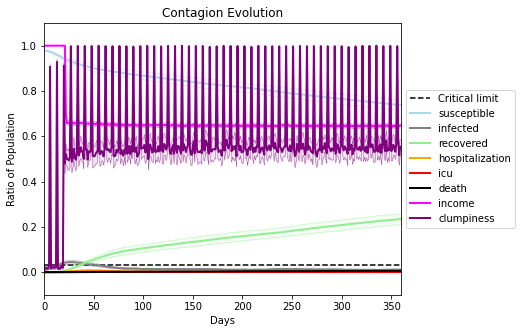

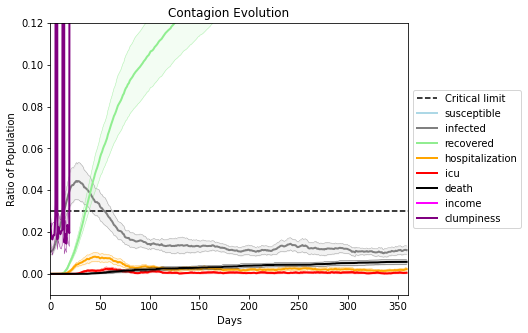

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9
params.params['num_communities'] = 100
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 20,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 10, home_grid_width = 10, school_home_list = 
             [
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0)],
[(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9)],
[(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5)],
[(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
],work_home_list = 
             
[
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9),
(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5),
(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
],listeners = listeners)